# Insurance Premium Renewal Propensity
**Level of Significance for Statistical Testing:** 0.95

## Business Objective

Insurance premiums paid by customers are one of the main, if not only, sources of revenue for insurance companies.  Losing this revenue source **could risk damaging, at best, the company’s bottom line, possibly resulting in layoffs** and various cost-cutting approaches, and, **at worst, negatively affect the entire insurance industry** – both providers and reinsurers through **insufficient cash flows to offset claim payout requests**.

The goal of this analysis is therefore to **predict the probability that a customer will not renew their premium payment**, helping insurance agents proactively reach out to the policy holders to **follow up on premium payments** and mitigate potential future losses while maintaining a **healthy cash-flow threshold**.


## Need for Analysis
Many companies rely on recurring premium payments in order to remain profitable and continue to grow their businesses.  

This becomes especially important when factoring in that most policies are substantially discounted from a margin standpoint, due to **high commissions paid to representatives in order to effectively sell the initial business**.  Additional costs go into ensuring that those customers assigned a policy are deemed to be extremely reliable in making future payments while also being relatively low risk from a claims standpoint.  

Obviously, a lot of costs and planning have gone into attaining each new customer, with **an expected timeframe required in order to generate a profit from the initial acquisition costs**.  

If enough customers were incorrectly identified as reliable, only to later default, the overall ramifications to the business and industry could be drastic.  Since these customers sampled are already actively assignged policies, the **next best option for the business is to create early warning identification of possible non-renewals and act promptly to reduce future losses and possibly save those accounts**.

## Benefit to Business
There is also the need to **secure ongoing cash flows in order to offset paying claims as needed**, or at least netting more than the amounts paid on reinsurance payments to other providers.  The entire Insurance industry is united in their reliance on consistent cash flows from reliable customers so as to keep the system of payments in/out ongoing.  

Any potential loss of revenue through early identification of at-risk customers stands to save the company money, **potentially saving jobs, whilst also contributing to the overall safety structure of the insurance/reinsurance partnership** that keeps everything afloat (premiums in/claims out).  Any steps that can be made to maintain this crucial balance are essential and serve to offer immediate returns to the business.

### Dataset Details

The dataset is a sample taken from the overall, currently active, customer database (population), was selected at random, and includes the following (cleaned names) columns/variables:

- **ID**: Unique customer ID
- **Percent paid by Cash/Credit**: What % of the premium was paid by cash payments?
- **Age in Days**: Age of the customer (days)
- **Income**: Annual income of the customer
- **Premium**: Annual premium paid by customer
- **Marital Status**: Married (1)/Unmarried (0)
- **Vehicles Owned**: Number of vehicles owned (1-3)
- **Count (3-6 Months Late)**: Number of times premium was paid 3-6 months late 
- **Count (6-12 Months Late)**: Number of times premium was paid 6-12 months late 
- **Count (More than 12 Months Late)**: Number of times premium was paid more than 12 months late 
- **Risk Score**: Risk score of customer (as it relates to likelihood of a future insurance claim)
- **Number of Dependents**: Number of dependents in the family on the customer (1-4) 
- **Accommodation**: Property Rented (0)/Owned (1)
- **Number of Premiums Paid**: Number of premiums paid thus far 
- **Sourcing Channel**: Channel through which customer was sourced 
- **Residence Area Type**: Residence type of the customer (Rural/Urban)
- **Premium Renewal**: Variable indicating if Customer has Renewed (1) or not Renewed (0) their Policy


### Note on Target Variable
- **One could argue that Late Month counts are indicative of actual defaulting customers**, however, we wish to predict which customers with upcoming premiums are likely to default (not renew) their policy, regardless of whether/not they were previously late.
    - **The Renewal column is therefore the target variable** upon which we will focus all predictive modeling goals
        - For the purposes of this analysis and predictive modeling, the attributes: Renewed/1 and Not Renewed/0 will be reanmed and inverted so that **the target to prevent (Non-Renewal) is set to 1 instead of 0**

### Library Imports

In [1]:
# Import neccessary Python libraries

import pandas as pd # Import/Export & DataFrame
import numpy as np # Math, Array, & Vector/Matrix
import matplotlib.pyplot as plt # Basic graphical library for various charts
# Set all plots/graphs to automatically show when code is run
%matplotlib inline 

import seaborn as sns # Visualization library for graphs - compliments pyplot options
import warnings # Options for addressing warnings that arrise when running code
warnings.filterwarnings('ignore') # All warnings (version upgrades, etc.) will not show

import math # Simple math functions - e.g. rounding down/up as needed

from pandas_profiling import ProfileReport # Summary EDA report that can be downloaded and viewed for initial EDA insights

from sklearn.model_selection import train_test_split # Library for splitting dataset into various Train/Val/Test sets

# Import Cross Validation, and Grid/Random Search Cross Validation functions for model testing/improvement
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score  # Import model scoring metrics
from sklearn.metrics import confusion_matrix, classification_report # Import Confusion Matrix Summary (TP, FP, TN, FN)

from sklearn.linear_model import LogisticRegression # Import Logistic Regression model for Classification purposes
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree classification model

# Import various ensemble techniques for advance classification modeling
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

from xgboost import XGBClassifier # Import XG Boost Classifier

from sklearn.neighbors import KNeighborsClassifier # Import Support Vector Classifier

from sklearn.naive_bayes import GaussianNB # Import Gaussian NB model for continous numeric variables, for Classification

from sklearn.preprocessing import StandardScaler, MinMaxScaler # Import Scaler to scale data (z-Score, Min/Max 0-1, etc.)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder # Import Encoders to be used within Pipelines

from imblearn.over_sampling import SMOTE, RandomOverSampler # Upsample the Minority class - SMOTE limits overfitting
from imblearn.under_sampling import RandomUnderSampler # Undersample the Majority class, but substantially reduces dataset size

# Libraries for Pipeline (Imblearn for upsampling + scaling combination)
from imblearn.pipeline import Pipeline as pipe1
from sklearn.pipeline import Pipeline as pipe2

# Plot Roc/AUC Curve to find best model thresholds
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve, precision_recall_curve, make_scorer
from sklearn import metrics


In [2]:
# Import dataset and create a copy

data = pd.read_excel('premium.xlsx') # Uncomment for testing - until final submission

df = data.copy()

 ## Data Inspection

In [3]:
df.head(20) # Inspect the top 20 rows of data

id  perc_premium_paid_by_cash_credit  age_in_days  Income  \
0    1                             0.317        11330   90050   
1    2                             0.000        30309  156080   
2    3                             0.015        16069  145020   
3    4                             0.000        23733  187560   
4    5                             0.888        19360  103050   
5    6                             0.512        16795  113500   
6    7                             0.000        16430  276240   
7    8                             0.994        14248   84090   
8    9                             0.019        27754  138330   
9   10                             0.018        29940  180100   
10  11                             0.500        10231  198030   
11  12                             0.772        21540  232340   
12  13                             0.015        21176  198090   
13  14                             0.635        20080  109080   
14  15                             0.443        15341   99080   
15  16                             0.130        15706  145270   
16  17                             0.030        21915  150060   
17  18                             0.020        19722  221450   
18  19                             0.652        18630  378040   
19  20                             0.008        17163   52610   

    Count_3-6_months_late  Count_6-12_months_late  \
0                       0                       0   
1                       0                       0   
2                       1                       0   
3                       0                       0   
4                       7                       3   
5                       0                       0   
6                       0                       0   
7                       0                       0   
8                       0                       0   
9                       0                       0   
10                      0                       0   
11                      0                       0   
12                      0                       0   
13                      0                       0   
14                      0                       0   
15                      0                       0   
16                      0                       0   
17                      0                       0   
18                      0                       1   
19                      0                       0   

    Count_more_than_12_months_late  Marital Status  Veh_Owned  No_of_dep  \
0                                0               0          3          3   
1                                0               1          3          1   
2                                0               0          1          1   
3                                0               1          1          1   
4                                4               0          2          1   
5                                0               0          1          4   
6                                0               0          3          4   
7                                0               0          3          2   
8                                0               1          2          4   
9                                0               1          3          3   
10                               0               1          3          1   
11                               0               1          3          1   
12                               0               1          3          1   
13                               0               1          3          4   
14                               0               1          2          2   
15                               0               0          3          3   
16                               0               0          3          3   
17                               0               0          3          2   
18                               0               0          3          2   
19  

In [4]:
df.tail(20) # Inspect the bottom 20 rows of data

id  perc_premium_paid_by_cash_credit  age_in_days  Income  \
79833  79834                             0.146        10596   66050   
79834  79835                             0.000        32856  215490   
79835  79836                             0.169        25923  186060   
79836  79837                             1.000        21540  149280   
79837  79838                             0.654        33226   42820   
79838  79839                             0.115        18990  185120   
79839  79840                             0.091        21540  108140   
79840  79841                             0.014        12787   96150   
79841  79842                             0.196        18990  150140   
79842  79843                             0.258        25929  101400   
79843  79844                             0.044        21908  126050   
79844  79845                             0.218        24835   87550   
79845  79846                             0.073        20813  363580   
79846  79847                             0.972        23372  156530   
79847  79848                             0.009        21545  133140   
79848  79849                             0.249        25555   64420   
79849  79850                             0.003        16797  660040   
79850  79851                             0.012        24835  227760   
79851  79852                             0.190        10959  153060   
79852  79853                             0.000        19720  324030   

       Count_3-6_months_late  Count_6-12_months_late  \
79833                      0                       0   
79834                      0                       0   
79835                      1                       0   
79836                      1                       5   
79837                      0                       0   
79838                      0                       0   
79839                      0                       0   
79840                      0                       0   
79841                      0                       0   
79842                      0                       0   
79843                      0                       0   
79844                      0                       0   
79845                      0                       0   
79846                      0                       0   
79847                      0                       0   
79848                      0                       0   
79849                      1                       0   
79850                      0                       0   
79851                      1                       0   
79852                      0                       0   

       Count_more_than_12_months_late  Marital Status  Veh_Owned  No_of_dep  \
79833                               0               0          2          3   
79834                               0               0          1          4   
79835                               0               1          1          1   
79836                               0               0          3          1   
79837                               0               1          1          2   
79838                               0               0          3          4   
79839                               0               0          2          1   
79840                               0               1          3          2   
79841                               0               1          2          1   
79842                               0               1          2          4   
79843                               0               0          2          2   
79844                               0               1          1          3   
79845                               0               1          3          2   
79846                               0               0          2          2   
79847                               0               1          3          2   
79848                               0               1          2          4  

### Observations (Months Late Counts)

One point to note initially is that the **Months Late counts (3-6, 6-12, and 12+) are rather misleading** in order of determining how many consecutive/infrequent months a customer was late:
- An example could is where the customer shows 5 times being late 6-12 months, but only 1 time late 3-6 months, which could indicate the shift to the the next tier of lateness, but also doesn't align when showing a separate example with a count of 1 for 6-12 months late but 0 for 3-6 months
    - **An easier, more intuitive, option is to replace these columns with a Previously Late (Y/N) binary column**, which will hopefully make predictive modeling easier to compute

In [5]:
df.shape # Inspect the overall shape (rows/columns) of the sample dataset

(79853, 17)

There are **79,853 rows** of data spread across **17 columns**.

In [6]:
df.info() # Inspect the dataset datatypes and check for Null (non-Null) values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                79853 non-null  int64  
 1   perc_premium_paid_by_cash_credit  79853 non-null  float64
 2   age_in_days                       79853 non-null  int64  
 3   Income                            79853 non-null  int64  
 4   Count_3-6_months_late             79853 non-null  int64  
 5   Count_6-12_months_late            79853 non-null  int64  
 6   Count_more_than_12_months_late    79853 non-null  int64  
 7   Marital Status                    79853 non-null  int64  
 8   Veh_Owned                         79853 non-null  int64  
 9   No_of_dep                         79853 non-null  int64  
 10  Accomodation                      79853 non-null  int64  
 11  risk_score                        79853 non-null  float64
 12  no_o

- There are no missing/null values based on initial summary analysis
- Most of the variables shown are numeric (Int64/Float64), with 2 showing as Object
    - Sourcing_Channel
    - Residence_Area_Type
        - Both variables can be **converted to Categorical to save space**
        - Later on, for modeling purposes, these can be encoded back to numerical equivalents

In [7]:
# Confirm that no null or missing values exist in sample dataset

print(df.isnull().sum())

print('.' * 80)

print(df.isna().sum())

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
Marital Status                      0
Veh_Owned                           0
No_of_dep                           0
Accomodation                        0
risk_score                          0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
premium                             0
renewal                             0
dtype: int64
................................................................................
id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late  

A second test confirms that there are **no Null or N/A values within the dataset**.
Further statistical summaries may help determine if any other data anomalies are present.

In [8]:
# Check for duplicate values:

df.duplicated().sum()

0

In [9]:
# Inspect overall count of unique values within the sample dataset

df.nunique()

id                                  79853
perc_premium_paid_by_cash_credit     1001
age_in_days                           833
Income                              24165
Count_3-6_months_late                  14
Count_6-12_months_late                 17
Count_more_than_12_months_late         10
Marital Status                          2
Veh_Owned                               3
No_of_dep                               4
Accomodation                            2
risk_score                            673
no_of_premiums_paid                    57
sourcing_channel                        5
residence_area_type                     2
premium                                30
renewal                                 2
dtype: int64

#### Observations
- The id column is acting as an index with unique values for each row count - it **offers no value and can be indexed for late use**
- Numerous columns have a large count of unique values, offering no benefit in further analyzing each split
    - However, there are multiple columns with anywhere from 2 to 5 unique features:
        - Marital_Status (2)
        - Accommodation (2)
        - Residence_Area_Type (2)
        - Renewal (2)
        - Veh_Owned (3)
        - No_of_Dep (4)
        - Sourcing_Channel (5)
- The **Age in Days field can be converted to years** as a specific day counter doesn't appear to offer any benefit to this analysis or the business objective
    - This should substantially lower the number of unique values (under 100)

In [10]:
# Summarize in further detail all columns with a unique count of 5 or less

cols_to_count = [] # Creat a blank list to add all

# Loop through and add columns to list 5 or less unique values
for col in df:
    if df[col].nunique() <= 5:
        cols_to_count.append(col)

# Print a small summary for the unique values of each column from above        
for x in cols_to_count:
    print('Unique Values in Column - {}: \n'.format(x), sorted(df[x].unique())) # Shortened list, sorted in ascending order
    print('.'* 80)

Unique Values in Column - Marital Status: 
 [0, 1]
................................................................................
Unique Values in Column - Veh_Owned: 
 [1, 2, 3]
................................................................................
Unique Values in Column - No_of_dep: 
 [1, 2, 3, 4]
................................................................................
Unique Values in Column - Accomodation: 
 [0, 1]
................................................................................
Unique Values in Column - sourcing_channel: 
 ['A', 'B', 'C', 'D', 'E']
................................................................................
Unique Values in Column - residence_area_type: 
 ['Rural', 'Urban']
................................................................................
Unique Values in Column - renewal: 
 [0, 1]
................................................................................


#### Observations
- As provided above, Marital_Status, and Renewal are **binary based on outcome (Yes/No)**
    - Accommodation is **binary based on housing situation/lifestyle (Rent/Own)**
- Each is specifically broken out into:
    - Marital_Status: Unmarried (0) or Married (1)
    - Renewal: Not yet Renewed (0) or Renewed (1)
    - Accommodation: Rent (0) or Owned (1) 

In [11]:
# Analyze overall Statistical Summary (transposed) of all numerical values in dataset

df.describe().T

count           mean            std  \
id                                79853.0   39927.000000   23051.719860   
perc_premium_paid_by_cash_credit  79853.0       0.314288       0.334915   
age_in_days                       79853.0   18846.696906    5208.719136   
Income                            79853.0  208847.171177  496582.597257   
Count_3-6_months_late             79853.0       0.248369       0.691102   
Count_6-12_months_late            79853.0       0.078093       0.436251   
Count_more_than_12_months_late    79853.0       0.059935       0.311840   
Marital Status                    79853.0       0.498679       0.500001   
Veh_Owned                         79853.0       1.998009       0.817248   
No_of_dep                         79853.0       2.503012       1.115901   
Accomodation                      79853.0       0.501296       0.500001   
risk_score                        79853.0      99.067243       0.725892   
no_of_premiums_paid               79853.0      10.863887       5.170687   
premium                           79853.0   10924.507533    9401.676542   
renewal                           79853.0       0.937410       0.242226   

                                      min         25%         50%         75%  \
id                                    1.0   19964.000   39927.000   59890.000   
perc_premium_paid_by_cash_credit      0.0       0.034       0.167       0.538   
age_in_days                        7670.0   14974.000   18625.000   22636.000   
Income                            24030.0  108010.000  166560.000  252090.000   
Count_3-6_months_late                 0.0       0.000       0.000       0.000   
Count_6-12_months_late                0.0       0.000       0.000       0.000   
Count_more_than_12_months_late        0.0       0.000       0.000       0.000   
Marital Status                        0.0       0.000       0.000       1.000   
Veh_Owned                             1.0       1.000       2.000       3.000   
No_of_dep                             1.0       2.000       3.000       3.000   
Accomodation                          0.0       0.000       1.000       1.000   
risk_score                           91.9      98.830      99.180      99.520   
no_of_premiums_paid                   2.0       7.000      10.000      14.000   
premium                            1200.0    5400.000    7500.000   13800.000   
renewal                               0.0       1.000       1.000       1.000   

                                          max  
id                                   79853.00  
perc_premium_paid_by_cash_credit         1.00  
age_in_days                          37602.00  
Income                            90262600.00  
Count_3-6_months_late                   13.00  
Count_6-12_months_late                  17.00  
Count_more_than_12_months_late          11.00  
Marital Status                           1.00  
Veh_Owned                                3.00  
No_of_dep                                4.00  
Accomodation                             1.00  
risk_score                              99.89  
no_of_premiums_paid                     60.00  
premium                              60000.00  
renewal                                  1.00

- Income has a disproportionately higher maximum value that is likely an outlier or anomaly and is skewing the data to the right (Mean larger than Median)
    - It is worth noting however, that the **income range varies greatly between a minimum value of \\$24k and the 1st, 2nd, and 3rd quantiles of \\$108k, \\$167k, and \\$252k respectively**
- It is assumed that the **higher Risk Score** (closer to 100%) indicates an **increase in liklihood of late payment/non-renewal**
- It is worth quickly visualizing this assumption against one of the Count of months Late columns.  By selecting the middle option, **Count of 6-12 Months Late**, we should see a generalized indication of **positive correlation between Risk Score and Lateness**
- No customers sampled own less than 1 vehicle, i.e. no vehicle for their transportation needs

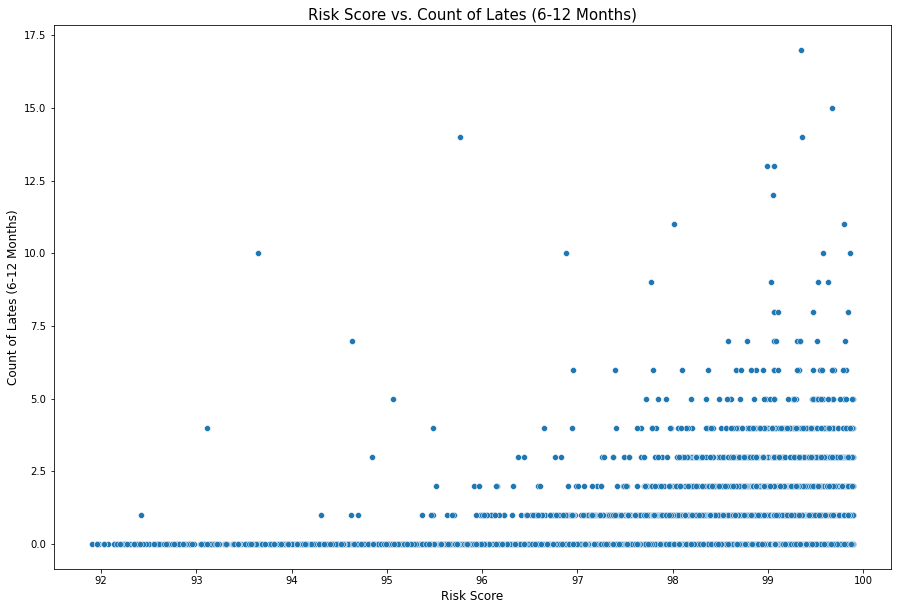

In [12]:
# Create ScatterPlot between Risk Score (x) and Count of 6-12 Months Late (y)

plt.figure(figsize = (15,10)) # Set graph size proportions
sns.scatterplot(x = 'risk_score', y = 'Count_6-12_months_late', data = df)

# Add in chart title and renamed x/y labels with custom sizes applied
plt.title('Risk Score vs. Count of Lates (6-12 Months)', fontdict = {'fontsize' : 15})
plt.ylabel('Count of Lates (6-12 Months)', fontdict = {'fontsize' : 12})
plt.xlabel('Risk Score', fontdict = {'fontsize' : 12});

#### Insight
As assumed, an increase in **Risk Score is positively correlated** to higher counts of late payments in the 6-12 month timeframe - Count of Lates increase as Risk Score rises.

In [13]:
# Examine the (rounded) Mean, Median, Min, and Max average Premiums paid based on respective Number of Premiums paid 

print('Avg Premium Cost (Min): {}'.format(round(df['premium'].min() / df['no_of_premiums_paid'].min(),2)))
print('.' * 80)
print('Avg Premium Cost (Mean): {}'.format(round(df['premium'].mean() / df['no_of_premiums_paid'].mean(),2)))
print('.' * 80)
print('Avg Premium Cost (Median): {}'.format(round(df['premium'].median() / df['no_of_premiums_paid'].median(),2)))
print('.' * 80)
print('Avg Premium Cost (Max): {}'.format(round(df['premium'].max() / df['no_of_premiums_paid'].max(),2)))
print('.' * 80)

Avg Premium Cost (Min): 600.0
................................................................................
Avg Premium Cost (Mean): 1005.58
................................................................................
Avg Premium Cost (Median): 750.0
................................................................................
Avg Premium Cost (Max): 1000.0
................................................................................


#### Insight
- The average calculated premiums above appear **too high to be monthly amounts**
    - It is relatively **safe to assume that Premium and Number of Premiums paid are based on annual timeframes**
    - It may be benefit to **engineer an additional feature for monthly average premiums** paid by each customer sampled, which could benefit modeling performance accuracy

#### Insights
- ID Column is purely an index and offers no value, **however it assigns a simple unique customer identifier (since no other unique features provided)** and can be kept in the dataset
- Percentage Premium Paid by Cash is a ratio spanning from 0 to 1.0, as expected
    - The distribution is Right/Positive skewed (Mean larger than Median)
    - **Of 75% of the customers sampled, only just over 50% of the premiums are paid in cash**, with credit appearing a far more popular method of payment
- Age in Days will be converted to Years, which will largely reduce the range and quantile results - maximum within 100 years or less
- Income is Right/Positive skewed (Mean larger than Median), with an **extremely large maximum income value of \$90.3M**
    - This is likely a mistake and should be further examined
- All three **Count of lates (3-6 months, 6-12 months, and more than 12 months) appear largely Right/Positive skewed (Mean greater than Median)** due to the fact that most customers, usually, don't default on payment (0 count), with those few that do appearing like outliers
    - This field may offer more benefit as a single count of late payments after a certain threshold as the probability of repayment most likely deteriorates rapidly after a set amount of time
    - Further statistical analysis/testing should be performed to confirm taking this preprocessing step
- Marital Status shows a mean of roughly 50\% between Unmarried (0) and Married (1)
    - Further exploratory analysis will be needed to determine whether this variable has any effect on likelihood of late payment/non-renewal
- **Vehicle Owned is normally distributed** with a equivalent Mean/Median of around 2 cars per customer (family) sampled
- Number of Dependents range from a **min of 1 (individual customer) to 4 (customer, spouse, 2 children for example)**, with customers having on average between 2 and 3 total dependents
- Accommodation shows a relatively **even split between Rented (0) and Owned (1) properties**, with a Mean of roughly 50%
- Customer Risk Scores, based on an aggregation of all aspects of a given customer's profile, indicates the (positively correlated) riskiness or likelihood of missed payments/non-renewal
    - There is a very small range between the lowest and highest calculated risks (Min: 91.9\%, Max: 99.9\%, and Median: 99.2\%), **indicating that even the lower risk customers sampled carry risk scores well above 90\%**
- Number of Premiums Paid is **relatively normally distributed**, with Mean slightly higher than Median, and a **range of 2 to 60 (annual) payments**
    - The above analysis confirmed that **both Number of Premiums and Premiums paid are annual figures**
    - An additional variable Avg. Monthly Premium will be created in the hopes of improved modelling insights and accuracy
- **Premiums Paid are largely right/positive skewed (Mean larger than Median)**, primarily due to the fact that Premium calculations are subjective and based on various Customer Profile factors
    - These profiles include variables such as: Risk Score, Income, Accommodations, Dependents, etc., all of which are **run through complicated risk/reward algorithms to minimize risks while maximizing returns**
- Renewals are **slightly left/negative skewed (Median larger than Mean)** due to the fact that the **majority of the customers sampled have renewed their premiums (1)** vs. a small percentage which have yet to do so (0)
    - **The 1st, 2nd, 3rd, and 4th quantiles all indicate premium renewals (1)** throughout the entire sample distribution

## Data PreProcessing

In [14]:
# Convert variable datatypes from Object to Category

for i in df:
    if df[i].dtypes == 'object':
        df[i] = df[i].astype('category')

In [15]:
# # Drop entire id column as it offers no benefit for further analysis

# df.drop('id', axis = 1, inplace = True)

In [16]:
# Dividing Age in Days by 365 for Age in Years (excluding Leap years) - Rename to Customer Age

df['age_in_days'] = df['age_in_days']/365
df.rename(columns={'age_in_days': 'Customer Age'}, inplace = True) # rename field to Customer Age

# Round new variable to 0 decimals and convert to Integer
df['Customer Age'] = pd.to_numeric(round(df['Customer Age'],0))

In [17]:
# Rerun unique value count to ensure desired column dropped from main DataFrame and Customer Age feature created/downsized

df.nunique() 

id                                  79853
perc_premium_paid_by_cash_credit     1001
Customer Age                           82
Income                              24165
Count_3-6_months_late                  14
Count_6-12_months_late                 17
Count_more_than_12_months_late         10
Marital Status                          2
Veh_Owned                               3
No_of_dep                               4
Accomodation                            2
risk_score                            673
no_of_premiums_paid                    57
sourcing_channel                        5
residence_area_type                     2
premium                                30
renewal                                 2
dtype: int64

#### Create new Previously Late Column - Remove Month Counts
As mentioned above, it is far more intuitive to identify a Previously Late (Y/N) binary variable and remove the confusing/conflicting Months Late counts.

In [18]:
# Create a new binary DataFrame column (0/1) for Never Late/Late Accounts based on current dataset

df['Previously_Late'] = 0

# Loop through each row in DataFrame and add sum of Late Columns
for i in df:
    df['Previously_Late'] = df['Count_3-6_months_late'] + df['Count_6-12_months_late'] + df['Count_more_than_12_months_late']
    
# Force all row sums greater to 1 to a value of 1 - now having a binary (0/1) split for Lates
df['Previously_Late'][df['Previously_Late'] >= 1] = 1

# Inspect the split between On-Time(0) and Late(1) as %
round(df['Previously_Late'].value_counts()/df['Previously_Late'].count(),2)

0    0.8
1    0.2
Name: Previously_Late, dtype: float64

The new column created indicates that **20% of customers sampled have previously been late on their accounts**.

#### Create new Avg. Monthly Premium Column

In [19]:
# Create a new DataFrame column based on each customer's premium paid divided by 12 Months

df['Avg. Monthly Premium'] = round(df['premium'] / 12,2) # Round the Avg Monthly Premium to 2 decimals

#### Inspect Income Column for Outliers

In [20]:
# Group the DataFrame, in descending order, by maximum Income values - identify relative fields to prove/deny outliers

df.groupby(['Income']).max().sort_values(by = 'Income', ascending = False)

id  perc_premium_paid_by_cash_credit  Customer Age  \
Income                                                            
90262600  75339                             0.007          52.0   
53821900  27647                             0.000          68.0   
46803140  71799                             0.164          44.0   
32175090    802                             0.469          44.0   
25051240   4645                             0.042          55.0   
...         ...                               ...           ...   
24070     71248                             1.000          49.0   
24060     63022                             0.934          50.0   
24050     77761                             0.743          72.0   
24040     78691                             1.000          66.0   
24030     74507                             1.000          74.0   

          Count_3-6_months_late  Count_6-12_months_late  \
Income                                                    
90262600                      0                       0   
53821900                      0                       0   
46803140                      0                       0   
32175090                      1                       0   
25051240                      0                       0   
...                         ...                     ...   
24070                         1                       1   
24060                         2                       0   
24050                         0                       1   
24040                         1                       1   
24030                         0                       0   

          Count_more_than_12_months_late  Marital Status  Veh_Owned  \
Income                                                                
90262600                               0               0          2   
53821900                               0               0          3   
46803140                               0               1          3   
32175090                               0               0          3   
25051240                               0               1          3   
...                                  ...             ...        ...   
24070                                  0               1          3   
24060                                  1               0          3   
24050                                  0               1          3   
24040                                  0               1          3   
24030                                  1               1          3   

          No_of_dep  Accomodation  risk_score  no_of_premiums_paid  premium  \
Income                                                                        
90262600          2             0      99.066                   12    60000   
53821900          1             1      99.890                   17    60000   
46803140          1             0      99.890                   14    60000   
32175090          4             0      99.890                   11    60000   
25051240          3             0      99.066                   10    60000   
...             ...           ...         ...                  ...      ...   
24070             3             1      99.066                   15     5700   
24060             3             1      98.450                   16     5700   
24050             4             1      99.890                   16     5700   
24040             4             1      99.470                   30     5700   
24030             4             1      99.890                   21     5700   

          renewal  Previously_Late  Avg. Monthly Premium  
Income                                                    
90262600        1                0                5000.0  
53821900        1                0                5000.0  
46803140        1                0                5000.0  
32175090        1                1                5000.0  
25051240        1                0                5000.0  
...     

Since insurance companies deal all sorts of clients, especially from an Income standpoint, **it is possible that very high earning individuals are as likely to have a policy (likely a much larger one) as customers with very low income**.


It is worth firstly **examining the annual and monthly premiums paid by these high income customers**, then derive a new field based on **Income/Premium** to determine if the resulting ratios are more accurately aligned and possibly not outliers.

In [21]:
# Inspect the top 5 incomes sampled above to determine whether accurate in relation to Monthly Premium

df['Avg. Monthly Premium'][df['Income'] >= 25051240]

801      5000.0
4644     5000.0
27646    5000.0
71798    5000.0
75338    5000.0
Name: Avg. Monthly Premium, dtype: float64

Paying upwards of \\$5k a month for an insurance policy is incredibly expensive, unless of course it was for **a very large policy attributed to a very large income earner**.  

This could be possible and is hard to truly determine based on 'regular person' logic since high net worth clients may operate outside of the norms a predictive model would try to align with.

#### Creating Monthly Income & Income/Premium Variables

Creating a monthly Income equivalent as well as a **new feature to better normalize the Income per Premium relationship** may better serve future analysis.

In [22]:
# Create a new DataFrame column based on each customer's annual income divided by 12 months

df['Avg. Monthly Income'] = round(df['Income'] / 12,2) # Round the Avg Income to 2 decimals

In [23]:
# Divide customer Income (assumed to be annual) against respective Annual Premiums

df['Income/Premium'] = round(df['Income'] / df['premium'],2) # Round the Income/Premium to 2 decimals

# Group the DataFrame, in descending order, by maximum Income values - identify relative fields to prove/deny outliers

df.groupby(['Income']).max().sort_values(by = 'Income', ascending = False)

id  perc_premium_paid_by_cash_credit  Customer Age  \
Income                                                            
90262600  75339                             0.007          52.0   
53821900  27647                             0.000          68.0   
46803140  71799                             0.164          44.0   
32175090    802                             0.469          44.0   
25051240   4645                             0.042          55.0   
...         ...                               ...           ...   
24070     71248                             1.000          49.0   
24060     63022                             0.934          50.0   
24050     77761                             0.743          72.0   
24040     78691                             1.000          66.0   
24030     74507                             1.000          74.0   

          Count_3-6_months_late  Count_6-12_months_late  \
Income                                                    
90262600                      0                       0   
53821900                      0                       0   
46803140                      0                       0   
32175090                      1                       0   
25051240                      0                       0   
...                         ...                     ...   
24070                         1                       1   
24060                         2                       0   
24050                         0                       1   
24040                         1                       1   
24030                         0                       0   

          Count_more_than_12_months_late  Marital Status  Veh_Owned  \
Income                                                                
90262600                               0               0          2   
53821900                               0               0          3   
46803140                               0               1          3   
32175090                               0               0          3   
25051240                               0               1          3   
...                                  ...             ...        ...   
24070                                  0               1          3   
24060                                  1               0          3   
24050                                  0               1          3   
24040                                  0               1          3   
24030                                  1               1          3   

          No_of_dep  Accomodation  risk_score  no_of_premiums_paid  premium  \
Income                                                                        
90262600          2             0      99.066                   12    60000   
53821900          1             1      99.890                   17    60000   
46803140          1             0      99.890                   14    60000   
32175090          4             0      99.890                   11    60000   
25051240          3             0      99.066                   10    60000   
...             ...           ...         ...                  ...      ...   
24070             3             1      99.066                   15     5700   
24060             3             1      98.450                   16     5700   
24050             4             1      99.890                   16     5700   
24040             4             1      99.470                   30     5700   
24030             4             1      99.890                   21     5700   

          renewal  Previously_Late  Avg. Monthly Premium  Avg. Monthly Income  \
Income                                                                          
90262600        1                0                5000.0           7521883.33   
53821900        1                0                5000.0           4485158.33   
46803140        1                0                5000.0           3900261.67   
32175090        

Using the newly created **ratio of Income to Annual Premium**, the difference between the top and bottom customers are 75 times higher (1,500 / 20).  This could be plausible as it is sometimes heard that the **very wealthy and high income earners can earn upwards of 100x or higher than their counterparts**.

For the purposes of this analysis, we will assume all income earners are accurately sampled and will not remove any from the sample.  It may also be worthwhile to remove the Income column and instead utilize the new feature: Income/Premium for easier analysis and understanding of data correlations.

#### Dropping Months Late Variables - Replaced by Previously Late

In [24]:
# Drop all Months Late columns (3-6, 6-12, 12+), now replaced with Previously Late (Y/N) column

df.drop(columns = ['Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late'],
        axis = 1, inplace = True)

#### Dropping Premium Variable - Replaced by Avg. Monthly Premium

In [25]:
# Drop entire Premium column as it is perfectly correlated to Avg. Monthly Premium

df.drop('premium', axis = 1, inplace = True)

#### Dropping Income Variable - Replaced by Avg. Monthly Income (& Income/Premium ratio)

In [26]:
# Drop entire Income column as it offers less benefit (more confusion) than Income/Premium column

df.drop('Income', axis = 1, inplace = True)

#### Rename Variables - Cleaner/Consistent Naming

In [27]:
# Rename the following columns within the DataFrame (df), permanently updating the DataFrame

df.rename(columns = 
          {'perc_premium_paid_by_cash_credit': 'Percent_Premium_Paid_Cash',
          'Customer Age': 'Customer_Age',
          'Marital Status': 'Marital_Status',
          'Veh_Owned': 'Vehicle_Owned',
          'No_of_dep': 'Number_of_Dependents',
          'Accomodation': 'Accommodation',
          'risk_score': 'Risk_Score',
          'no_of_premiums_paid': 'Number_of_Premiums_Paid',
          'sourcing_channel': 'Sourcing_Channel',
          'residence_area_type': 'Residence_Area_Type',
          'Avg. Monthly Premium': 'Avg._Monthly_Premium',
           'Avg. Monthly Income': 'Avg._Monthly_Income',
           'renewal': 'Renewal'
          }, inplace = True)

#### Rename Target (Renewals) & Convert to Categorical

In [28]:
# Create a blank list to add strings (Yes/No) for respective 1/0 from Renewal column

Renewed_Policy = []

# Loop through each item in renewal column and append the above list with either No for 0 or Yes for 1 - will be reversed later
for i in df['Renewal']:
    if i == 0:
        Renewed_Policy.append('No')
    elif i == 1:
        Renewed_Policy.append('Yes')

df['Renewed_Policy'] = pd.DataFrame(Renewed_Policy) # Convert the list to a new column with DataFrame (df)
 
df['Renewed_Policy'].value_counts() # Check the unique value count - should have same weighting for Non-Renewals to Renewals

df['Renewed_Policy'] = df['Renewed_Policy'].astype('category') # Convert from object to category

df.drop('Renewal', axis = 1, inplace = True) # Drop the old Renewal column which is no longer needed 

We now have a renamed column, Non-Renewal with a **target attribute of 1 indicating those customers who have yet to renew their premiums**.  The target is split 6% Non-Renewal to 94% Renewal.

In [29]:
# Rerun unique value count one final time to ensure all desired changes are in place ahead of EDA review
df.nunique() 

id                           79853
Percent_Premium_Paid_Cash     1001
Customer_Age                    82
Marital_Status                   2
Vehicle_Owned                    3
Number_of_Dependents             4
Accommodation                    2
Risk_Score                     673
Number_of_Premiums_Paid         57
Sourcing_Channel                 5
Residence_Area_Type              2
Previously_Late                  2
Avg._Monthly_Premium            30
Avg._Monthly_Income          24165
Income/Premium                8633
Renewed_Policy                   2
dtype: int64

In [30]:
# Reinspect the overall DataFrame shape
df.shape

(79853, 16)

All desired changes to the data, **including the recent dropping of the Income and Premium columns**, appear to have been correctly applied and saved to the DataFrame (df) - the data is now ready for Outlier Treament (if applicable) and EDA.  The overall shape, including new features added, has been **reduced by 2 columns**.

#### Dealing with Outliers - Lower/Upper Caps + 1.5x IQR

Run initial Box Plot for numerical columns - **examining untreated outliers**.

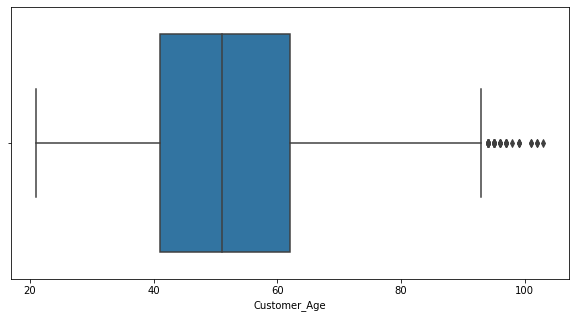

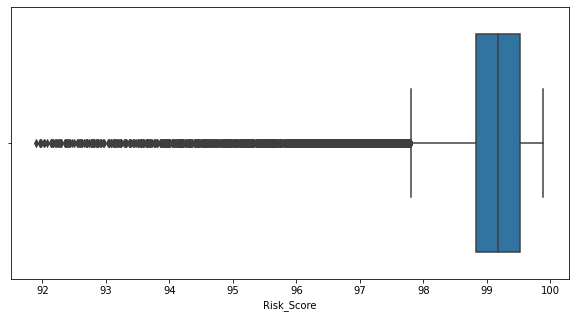

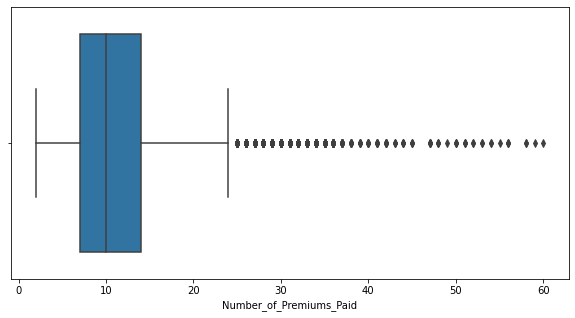

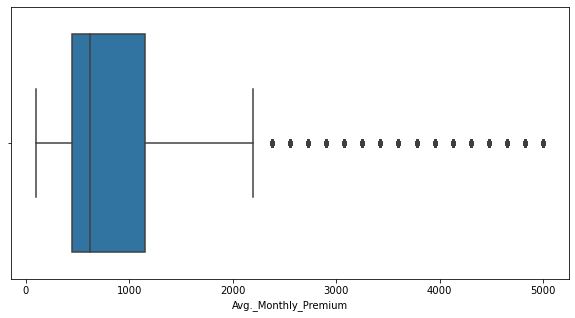

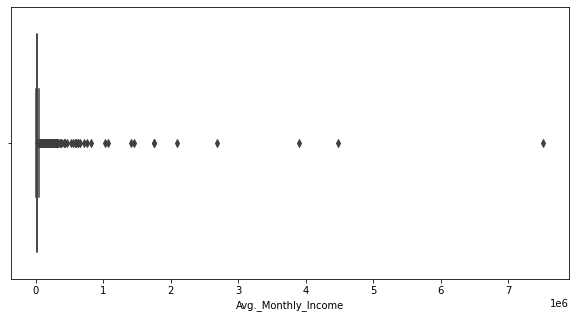

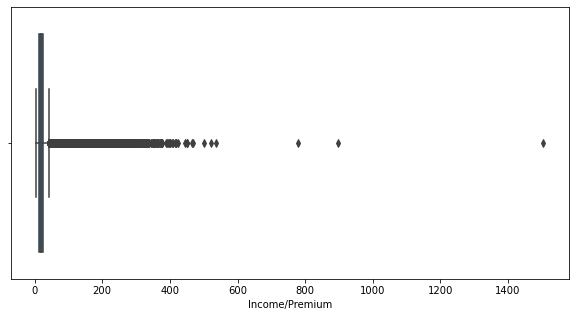

In [31]:
# Run initial Box Plot for numerical columns - detailing untreated outliers

# Create list of numerical (continuous) columns
numerical_cols = [
    'Customer_Age', 
    'Risk_Score',
    'Number_of_Premiums_Paid',
    'Avg._Monthly_Premium',
    'Avg._Monthly_Income',
    'Income/Premium'
]

# Loop through each column in list above and produce boxplot - identify outliers
count=1
for i in numerical_cols:

    plt.figure(figsize = (10,5)).subplots(nrows = 1);
    sns.boxplot(x = df[i]);
    count+=1

**Outliers:**
- **Customer Age:** Customers aged between 98 and 103 are higher than the majority, however very plausible nowadays and not assumed to be invalid data
- **Risk Score:** Scores on the lower/left side between 92% and around 97.6%, which appear valid within such a limited distribution range
- **Number of Premiums Paid:** Premiums, paid annually, on the higher/right side between 26 and 60 years, which appears valid when accounting for Customer Ages sampled, when assuming some customers paying into a given Life Insurance policy could be paying for decades (until death) to keep the policy active
- **Avg. Monthly Premium:** Similar to Annual Premiums previously reviewed, those falling within the monthly equivalent of around \\$2.3k to \\$5k do initially appear as outliers with data issues, however as shown above are likely associated with higher net-worth clients willing to pay more for substantially higher coverage
- **Avg. Monthly Income:** Just as Avg. Monthly Premiums include numerous outliers to the right of the distribution, the Average Monthly Income includes the same, making for very hard to comprehend analysis of datapoints
- **Income/Premium:** Although the distribution has largely improved vs. the prior Income column due to the proportionate allocation against respective Premiums, there are numerous outliers in the range of around 25 to 1.5k times Income to Premium

In [32]:
# Create a function to return the lower and Upper ranges for all variables with outliers
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    if round(Q1 - (1.5 * IQR),2) <= 0:
        lower_range = 0 # Use 0 if lower bound outliers is negative
    else: 
        lower_range = round(Q1 - (1.5 * IQR),2)
    upper_range = round(Q3 + (1.5 * IQR),2)
    return [lower_range, upper_range] # Returns a list of the lower and upper ranges for each feature selected

In [33]:
# Map the above function to the variables listed below that have outliers
outlier_cols = [
    'Customer_Age', 
    'Risk_Score',
    'Number_of_Premiums_Paid',
    'Avg._Monthly_Premium',
    'Avg._Monthly_Income',
    'Income/Premium'
]

outlier_ranges = [] # Create a blank range to add the lower/upper ranges to

# Print each of the lower/upper ranges for each variable above
for outlier in outlier_cols:
    outlier_ranges.append(outlier_treatment(df[outlier]))

outliers = {} # Create a blank dictionary range where the outlier columns and respective lower/upper ranges will be combined

for i in range(len(outlier_cols)):
    outliers[outlier_cols[i]] = outlier_ranges[i]
print(outliers)

{'Customer_Age': [9.5, 93.5], 'Risk_Score': [97.8, 100.56], 'Number_of_Premiums_Paid': [0, 24.5], 'Avg._Monthly_Premium': [0, 2200.0], 'Avg._Monthly_Income': [0, 39017.51], 'Income/Premium': [0, 41.89]}


In [34]:
# Changing variables with Lower range outliers
df['Risk_Score'][df['Risk_Score'] <= outliers['Risk_Score'][0]] = outliers['Risk_Score'][0]

# Changing variables with Upper range outliers - use '\' to split code lines - Math.floor to rounddown, slightly under max caps

df['Customer_Age'][df['Customer_Age'] >= outliers['Customer_Age'][1]] = math.floor(outliers['Customer_Age'][1])

df['Number_of_Premiums_Paid'][df['Number_of_Premiums_Paid'] >= outliers['Number_of_Premiums_Paid'][1]] \
= math.floor(outliers['Number_of_Premiums_Paid'][1])

df['Avg._Monthly_Premium'][df['Avg._Monthly_Premium'] >= outliers['Avg._Monthly_Premium'][1]] \
= math.floor(outliers['Avg._Monthly_Premium'][1])

df['Avg._Monthly_Income'][df['Avg._Monthly_Income'] >= outliers['Avg._Monthly_Income'][1]] \
= math.floor(outliers['Avg._Monthly_Income'][1])

df['Income/Premium'][df['Income/Premium'] > outliers['Income/Premium'][1]] = round(math.ceil(outliers['Income/Premium'][1]),0)

Run initial Box Plot for numerical columns - **examining now treated outliers**.

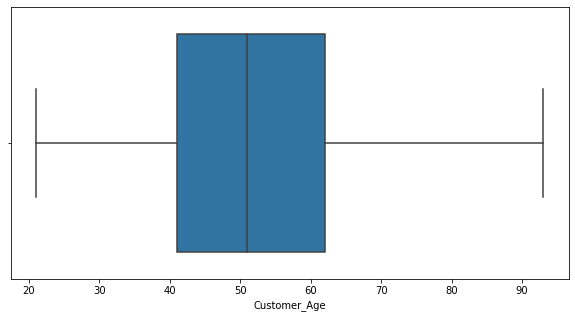

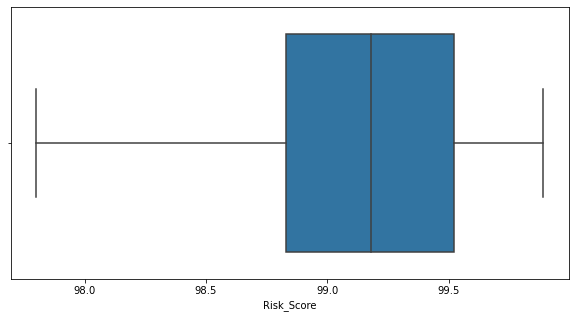

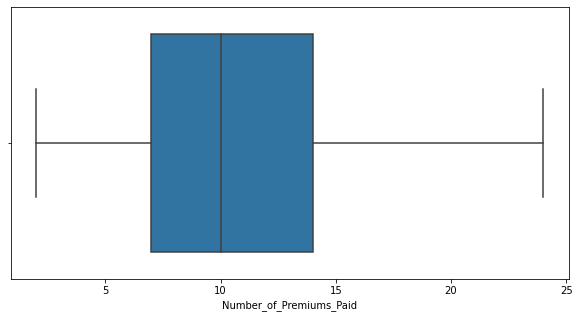

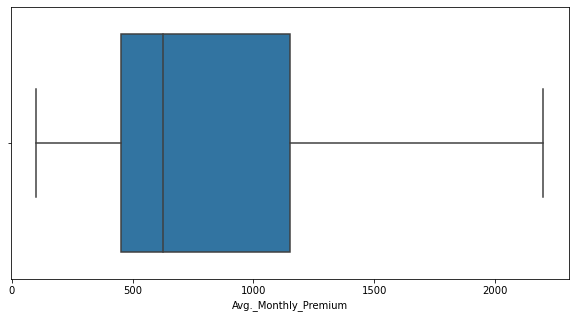

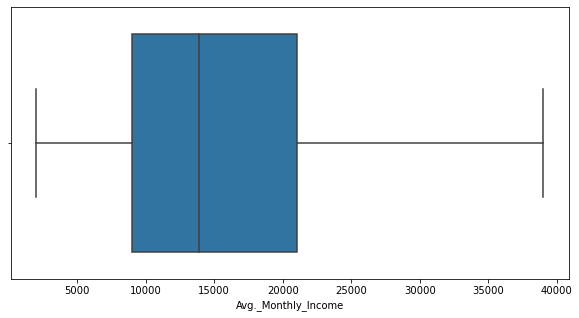

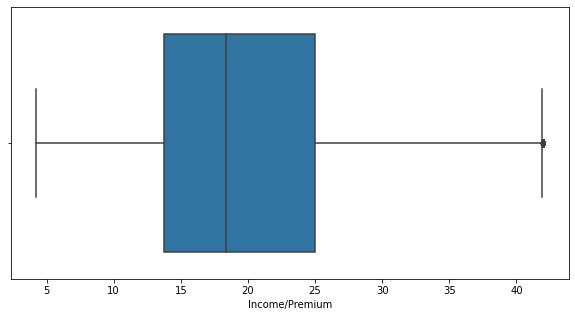

In [35]:
# Create list of numerical (continuous) columns
numerical_cols = [
    'Customer_Age', 
    'Risk_Score',
    'Number_of_Premiums_Paid',
    'Avg._Monthly_Premium',
    'Avg._Monthly_Income',
    'Income/Premium'
]

# Loop through each column in list above and produce boxplot - identify outliers
count=0

for i in numerical_cols:

    plt.figure(figsize = (10,5)).subplots(nrows = 1)
    sns.boxplot(x = df[i]);
    count+=1

All outliers have been **capped at Lower/Upper bound + 1.5x IQR respectively**, specifcally:

**Lower Outlier:**
- Risk Score - 97.8%

**Upper Outlier (Rounded):**
- Customer Age - 93
- Number of Premiums Paid - 24
- Avg. Monthly Premium - \\$2200
- Avg. Monthly Income - \\$39017 (although a high number, it is substantially lower than prior results)
- Income/Premium - 42x

In [36]:
df.describe().T

count          mean           std      min  \
id                         79853.0  39927.000000  23051.719860     1.00   
Percent_Premium_Paid_Cash  79853.0      0.314288      0.334915     0.00   
Customer_Age               79853.0     51.605638     14.265045    21.00   
Marital_Status             79853.0      0.498679      0.500001     0.00   
Vehicle_Owned              79853.0      1.998009      0.817248     1.00   
Number_of_Dependents       79853.0      2.503012      1.115901     1.00   
Accommodation              79853.0      0.501296      0.500001     0.00   
Risk_Score                 79853.0     99.114823      0.544469    97.80   
Number_of_Premiums_Paid    79853.0     10.776013      4.852167     2.00   
Previously_Late            79853.0      0.202973      0.402215     0.00   
Avg._Monthly_Premium       79853.0    850.582007    592.461226   100.00   
Avg._Monthly_Income        79853.0  15974.271734   9200.360744  2002.50   
Income/Premium             79853.0     21.137974     10.101610     4.22   

                                 25%        50%        75%       max  
id                         19964.000  39927.000  59890.000  79853.00  
Percent_Premium_Paid_Cash      0.034      0.167      0.538      1.00  
Customer_Age                  41.000     51.000     62.000     93.00  
Marital_Status                 0.000      0.000      1.000      1.00  
Vehicle_Owned                  1.000      2.000      3.000      3.00  
Number_of_Dependents           2.000      3.000      3.000      4.00  
Accommodation                  0.000      1.000      1.000      1.00  
Risk_Score                    98.830     99.180     99.520     99.89  
Number_of_Premiums_Paid        7.000     10.000     14.000     24.00  
Previously_Late                0.000      0.000      0.000      1.00  
Avg._Monthly_Premium         450.000    625.000   1150.000   2200.00  
Avg._Monthly_Income         9000.830  13880.000  21007.500  39017.00  
Income/Premium                13.760     18.340     25.010     42.00

## Exploratory Data Analysis

### Pandas Profiling Report

In [37]:
# It is worth quickly compiling a Pandas Profile summary report for EDA insights

# Comment out initial Profile Report code so as to prevent subsequent report creations and reduce load time

summaryreport = ProfileReport(df)

# Export report to html format for easy reading parallel to Python run
ProfileReport.to_file(summaryreport, 'dfsummary.html')

#### Report Insights
There are **numerous categorical/discrete numerical variables with a nearly perfect split by attribute**, which is curious why the distribution is exact - this wouldn't usually be the case for a randomly sampled distribution.

Example Columns are:
- **Marital Status:** 50/50 split
- **Vehicle Owned:** 33/33/33 split
- **Number of Dependents:** 25/25/25/25 split
- **Accommodation Rent/Owned:** 50/50 split

The odds of equal data splits, esepcially across numerous columns, are slight and **call into question the process behind the data extraction procedure**.  Further EDA will be needed to derive additional insights into the data.

### Univariate Analysis - Categorical

In [38]:
# Create a function to add the % splits for unique values in select categorical/numeric features

def percentplot (data, feature):
    """
    Boxplot and Histogram Combined into 1 View

    data: DataFrame (df)
    feature: Specific Column in DataFrame (df)
    
    """
    
    total = len(feature) # Identify the total count for given feature to calculate % split against
    
    for p in ax.patches: # ax will be called in each countplot used
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Height of feature / Total Height
        
        x = p.get_x() + p.get_width() / 2 - .05 # Locate the x Axis and width of each feature
        y = p.get_y() + p.get_height() * 1.01 # Locate the y Axis and height of each feature
        ax.annotate(percentage, (x, y), size = 20) 

#### Sourcing Channel

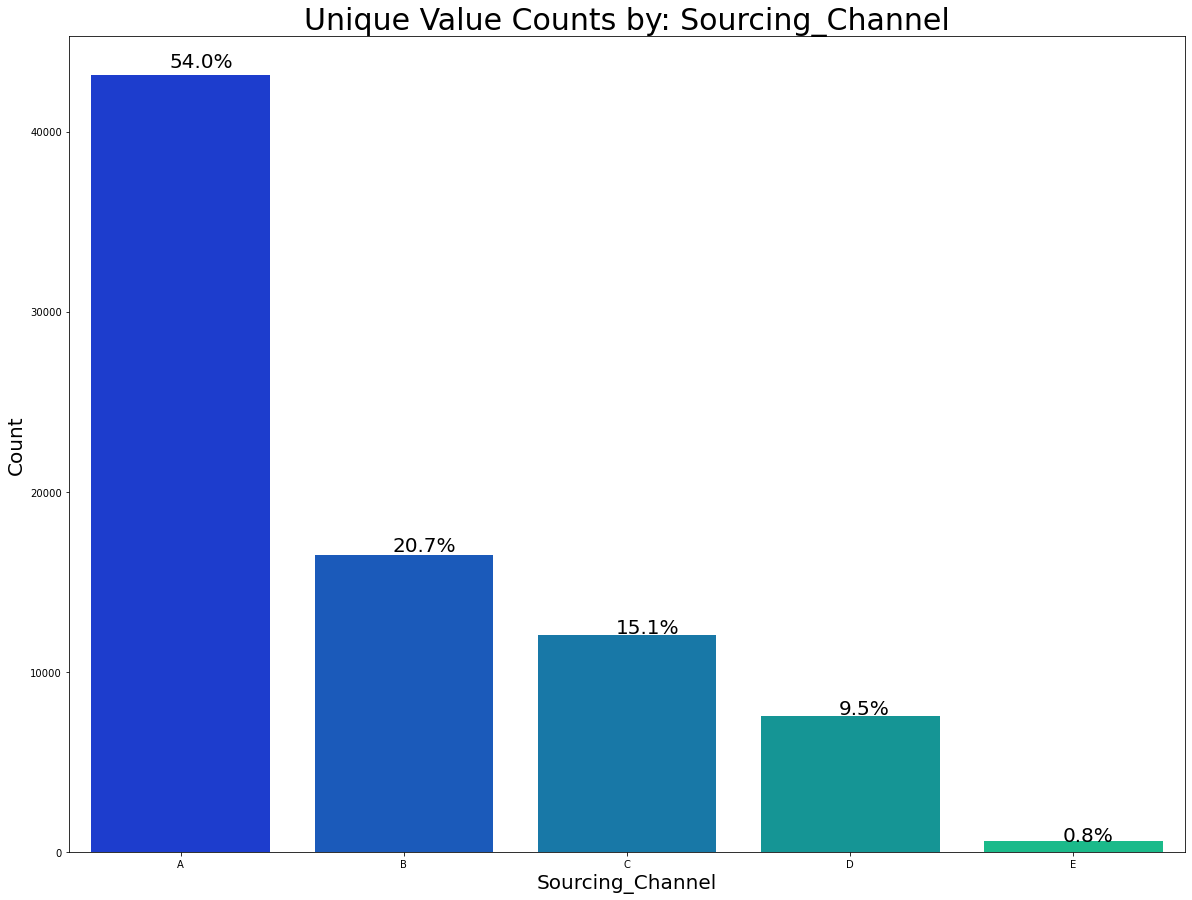

In [39]:
# Set chart function details for summary table - data, feature

data = df
feature = 'Sourcing_Channel'

# Set plot size, titles, and axis labels - run above function for given feature

plt.figure(figsize = (20,15))

ax = sns.countplot(x = data[feature], palette = 'winter')

percentplot(data, data[feature])
plt.title('Unique Value Counts by: ' + feature, fontdict = {'fontsize': 30})
plt.ylabel('Count', fontdict = {'fontsize' : 20})
plt.xlabel(feature, fontdict = {'fontsize' : 20});

- **Sourcing Channel A is the most frequently used** for all accounts, Current and Late (44% and 9.7% respectively
    - Channels B through E **continue this trend in an ordinal fashion**

#### Residence Area Type

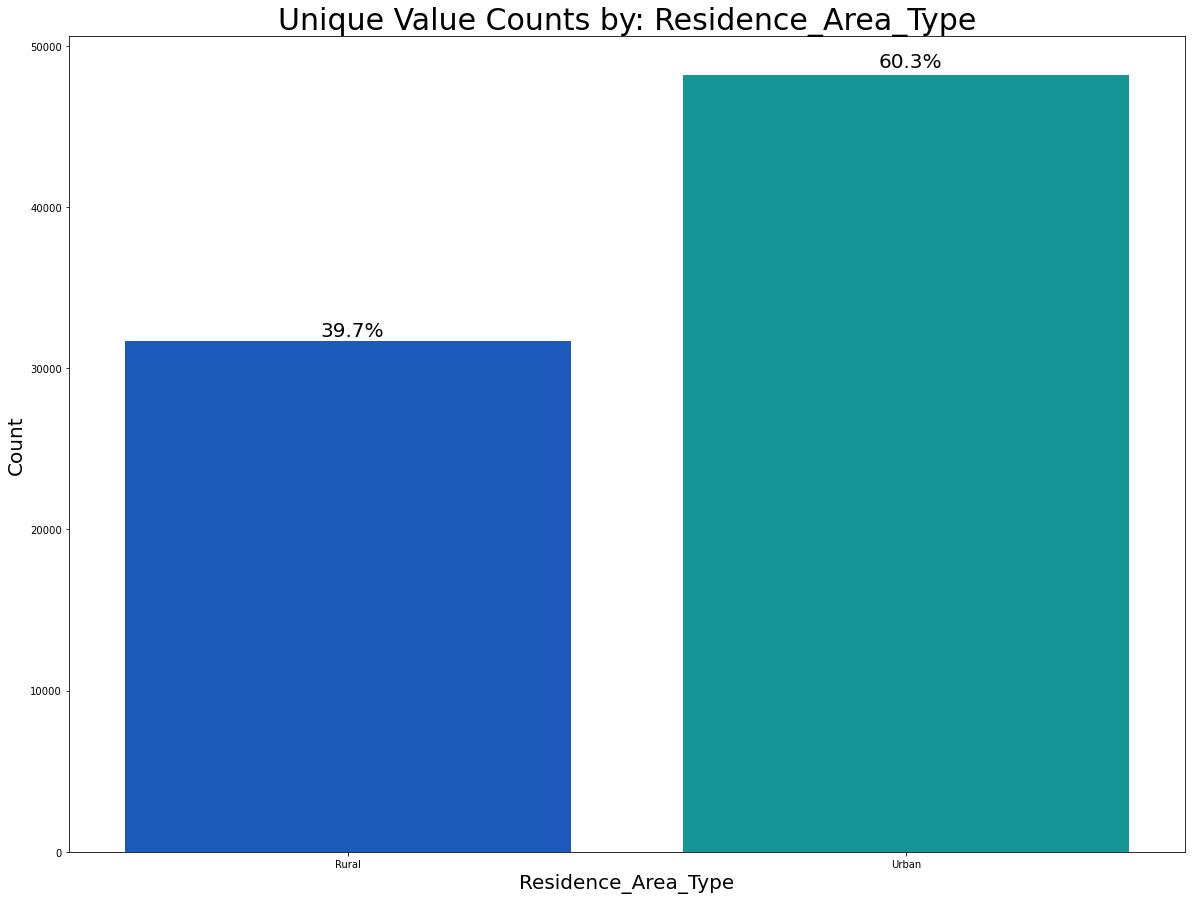

In [40]:
# Set chart function details for summary table - data, feature

data = df
feature = 'Residence_Area_Type'

# Set plot size, titles, and axis labels - run above function for given feature

plt.figure(figsize = (20,15))

ax = sns.countplot(x = data[feature], palette = 'winter')

percentplot(data, data[feature])
plt.title('Unique Value Counts by: ' + feature, fontdict = {'fontsize': 30})
plt.ylabel('Count', fontdict = {'fontsize' : 20})
plt.xlabel(feature, fontdict = {'fontsize' : 20});

- **More customers live in Urban areas over Rural areas**, at a roughly 60/40 split

### Univariate Analysis - Discrete Numerical (<= 20 Unique Values)

#### Marital Status

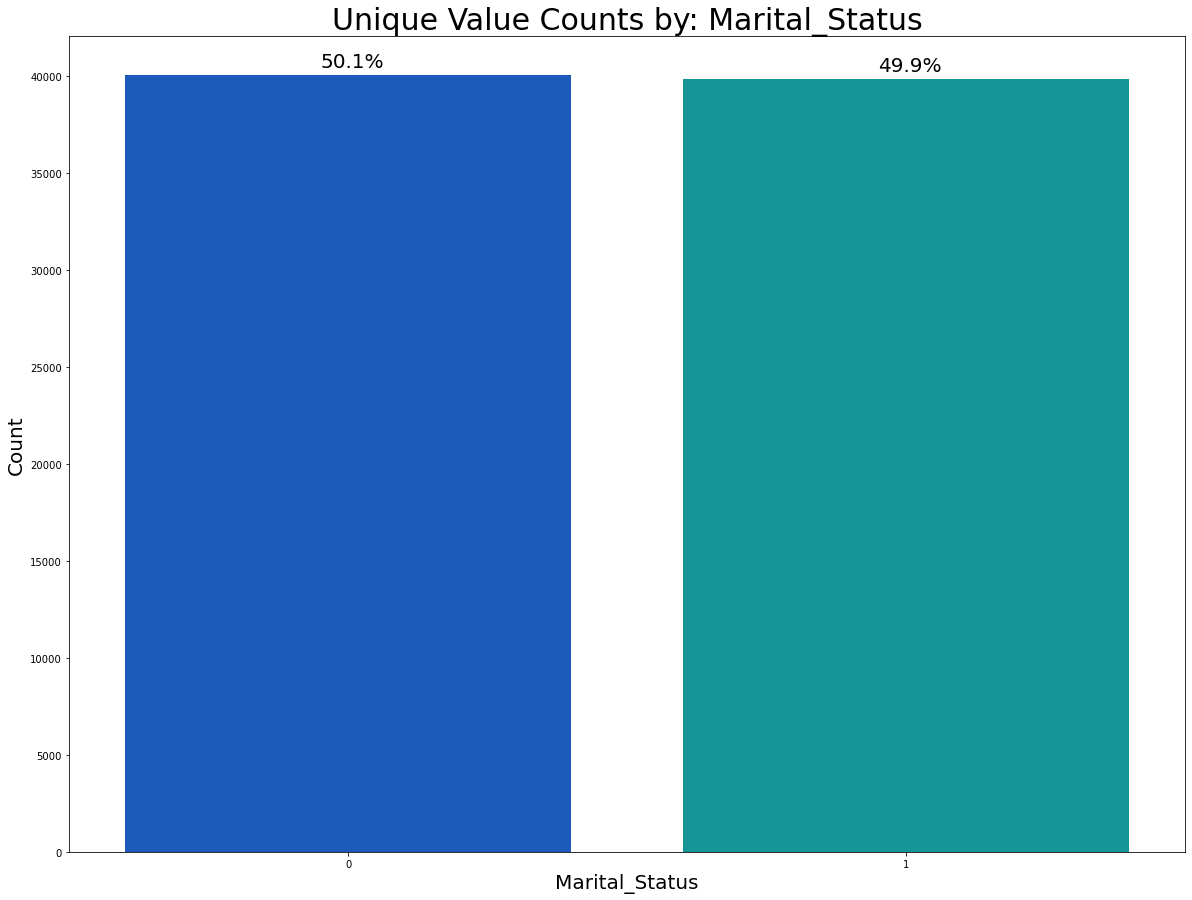

In [41]:
# Set chart function details for summary table - data, feature

data = df
feature = 'Marital_Status'

# Set plot size, titles, and axis labels - run above function for given feature

plt.figure(figsize = (20,15))

ax = sns.countplot(x = data[feature], palette = 'winter')

percentplot(data, data[feature])
plt.title('Unique Value Counts by: ' + feature, fontdict = {'fontsize': 30})
plt.ylabel('Count', fontdict = {'fontsize' : 20})
plt.xlabel(feature, fontdict = {'fontsize' : 20});

Like various other categories sampled, **the data is relatively evenly split between all variables**, namely Unmarried/Married split roughly 50/50.

#### Vehicle Owned

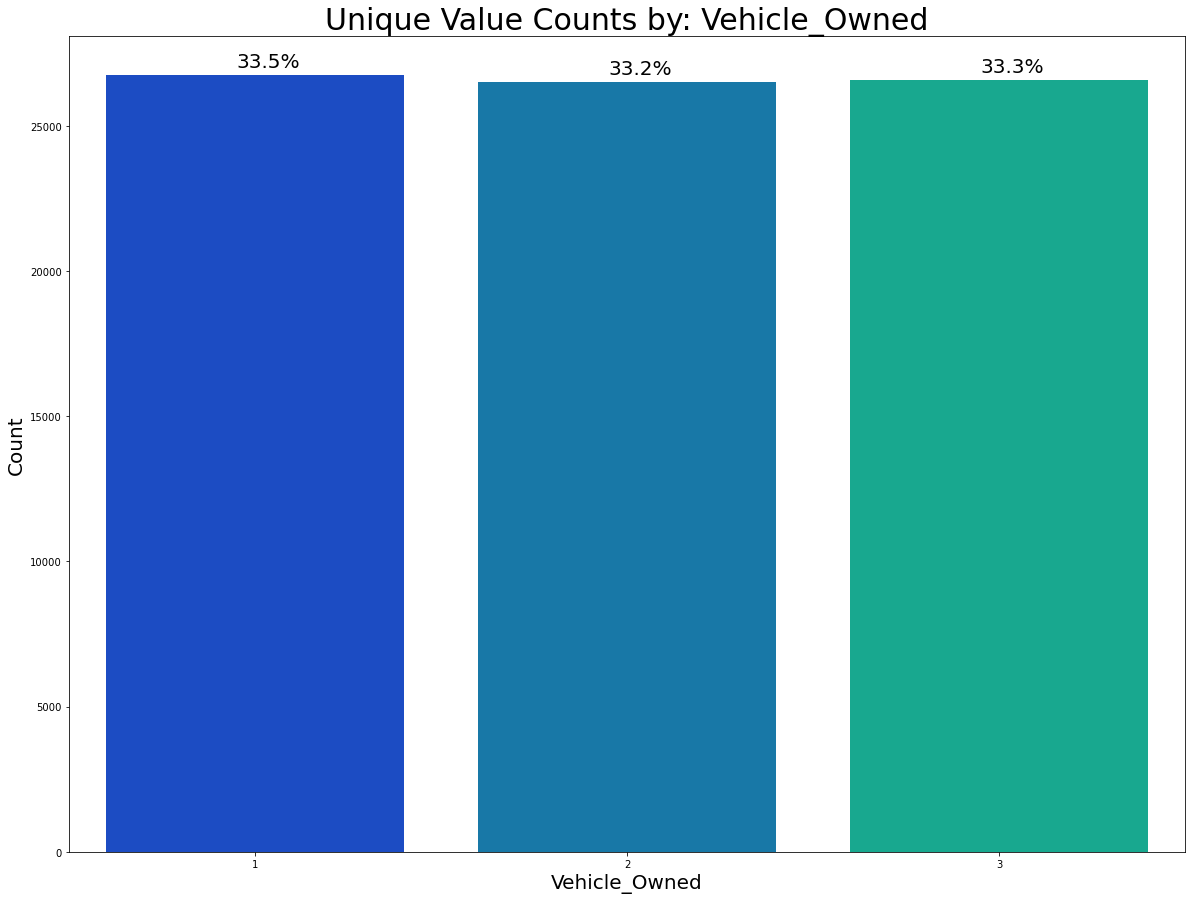

In [42]:
# Set chart function details for summary table - data, feature

data = df
feature = 'Vehicle_Owned'

# Set plot size, titles, and axis labels - run above function for given feature

plt.figure(figsize = (20,15))

ax = sns.countplot(x = data[feature], palette = 'winter')

percentplot(data, data[feature])
plt.title('Unique Value Counts by: ' + feature, fontdict = {'fontsize': 30})
plt.ylabel('Count', fontdict = {'fontsize' : 20})
plt.xlabel(feature, fontdict = {'fontsize' : 20});

Like various other categories sampled, **the data is relatively evenly split between all variables**, namely number of Vehicles Owned between 1 and 3.  **Interesting, none of the customers sampled do not own a car (0)**.

#### Number of Dependents

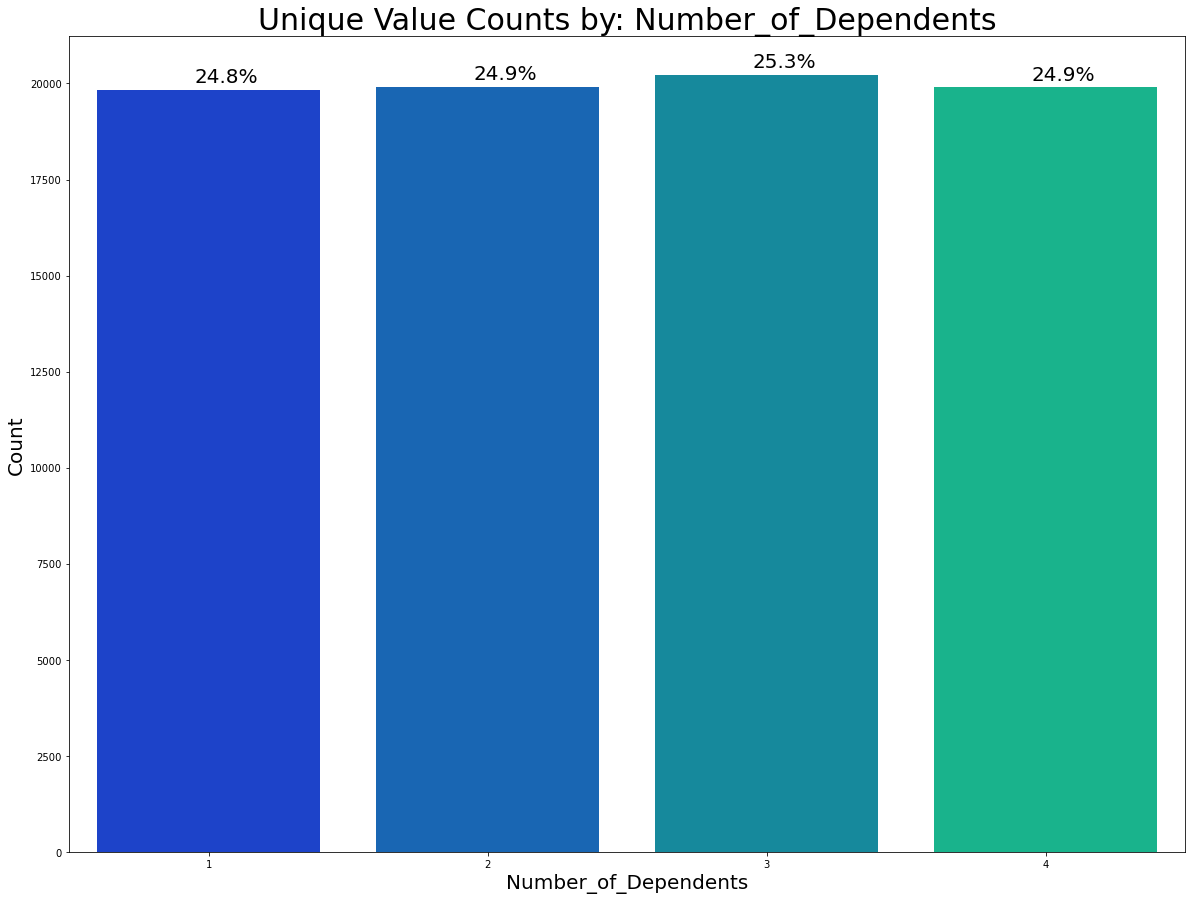

In [43]:
# Set chart function details for summary table - data, feature

data = df
feature = 'Number_of_Dependents'

# Set plot size, titles, and axis labels - run above function for given feature

plt.figure(figsize = (20,15))

ax = sns.countplot(x = data[feature], palette = 'winter')

percentplot(data, data[feature])
plt.title('Unique Value Counts by: ' + feature, fontdict = {'fontsize': 30})
plt.ylabel('Count', fontdict = {'fontsize' : 20})
plt.xlabel(feature, fontdict = {'fontsize' : 20});

Like various other categories sampled, **the data is relatively evenly split between all variables**, roughly 25% count for each dependent class (1-4).

#### Accommodation

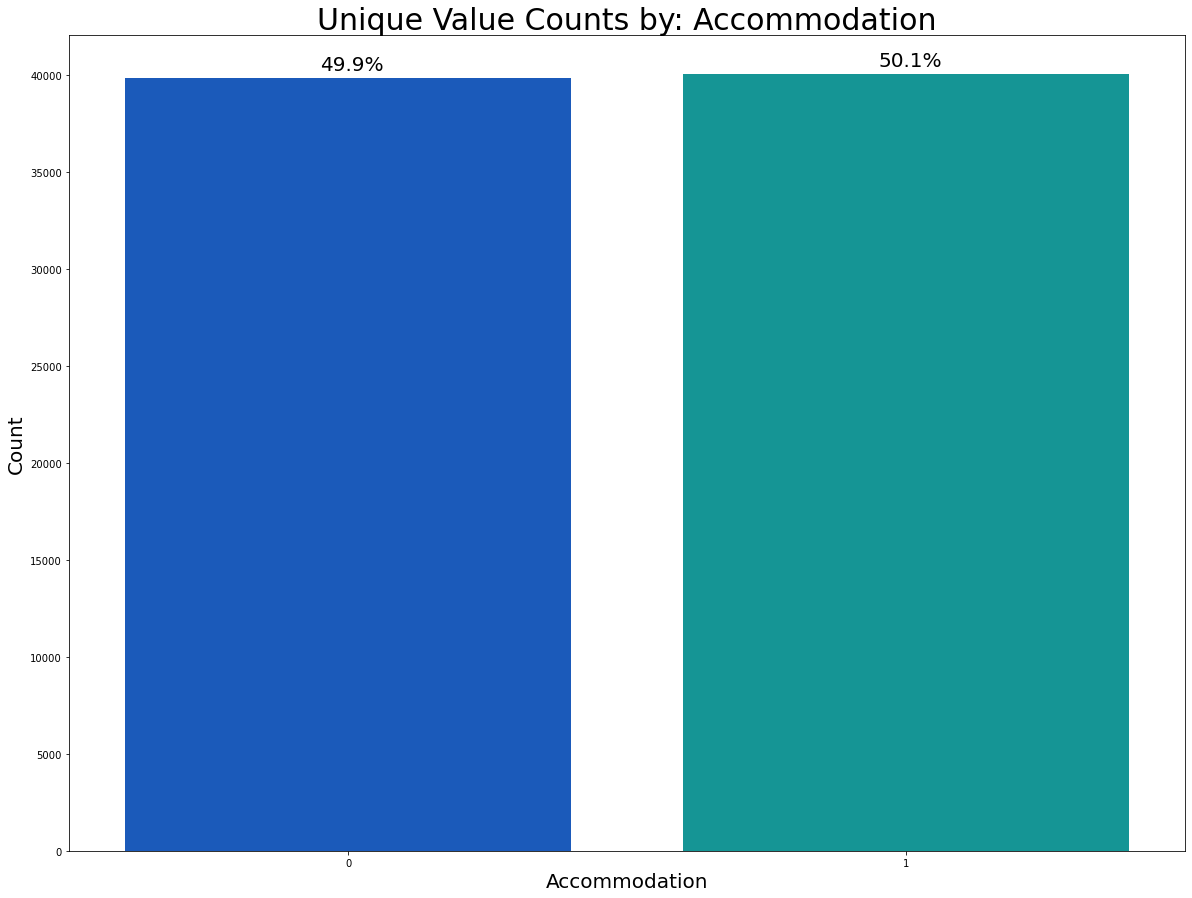

In [44]:
# Set chart function details for summary table - data, feature

data = df
feature = 'Accommodation'

# Set plot size, titles, and axis labels - run above function for given feature

plt.figure(figsize = (20,15))

ax = sns.countplot(x = data[feature], palette = 'winter')

percentplot(data, data[feature])
plt.title('Unique Value Counts by: ' + feature, fontdict = {'fontsize': 30})
plt.ylabel('Count', fontdict = {'fontsize' : 20})
plt.xlabel(feature, fontdict = {'fontsize' : 20});

Like various other categories sampled, **the data is relatively evenly split between all variables**, namely Rent (0) or Owned (1).

#### Previously Late

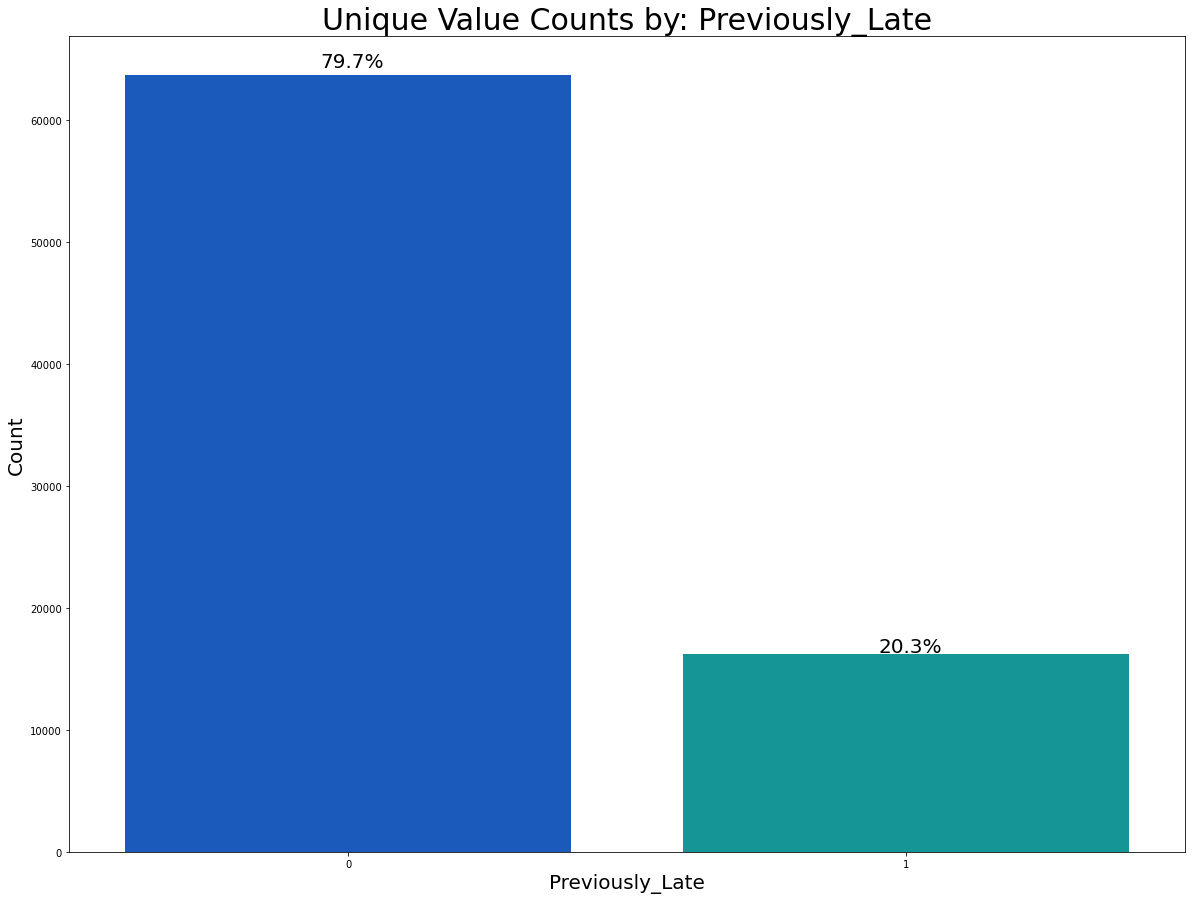

In [45]:
# Set chart function details for summary table - data, feature

data = df
feature = 'Previously_Late'

# Set plot size, titles, and axis labels - run above function for given feature

plt.figure(figsize = (20,15))

ax = sns.countplot(x = data[feature], palette = 'winter')

percentplot(data, data[feature])
plt.title('Unique Value Counts by: ' + feature, fontdict = {'fontsize': 30})
plt.ylabel('Count', fontdict = {'fontsize' : 20})
plt.xlabel(feature, fontdict = {'fontsize' : 20});

80% of customers sampled have never been late on their premiums in the past, whereas over 20% have.  **Of the 20% that were previously late on their accounts, only 6% finally end up late on renewals**, which indicates a decent proportion of these customers were **able to repay past due debts and become current/renew**.

#### Renewed Policy (Target)

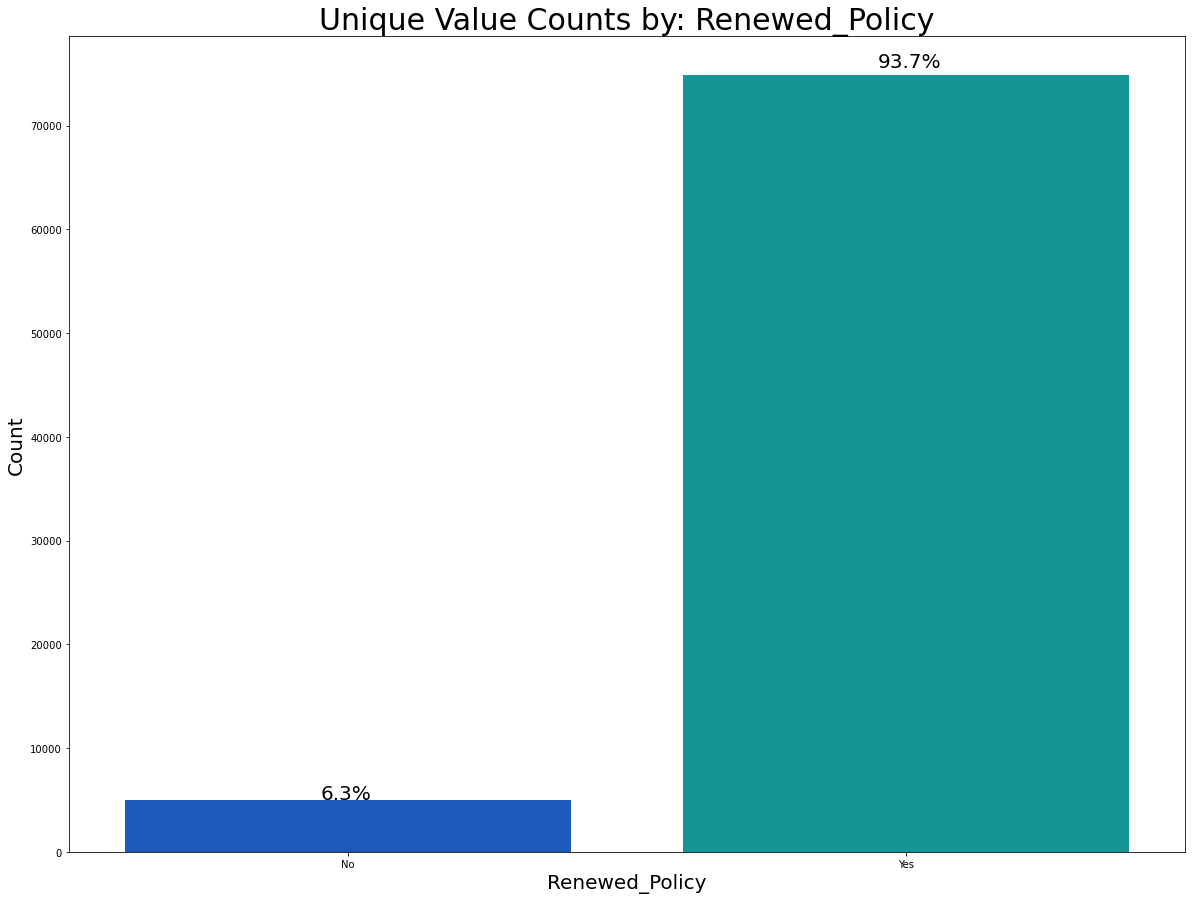

In [46]:
# Set chart function details for summary table - data, feature

data = df
feature = 'Renewed_Policy'

# Set plot size, titles, and axis labels - run above function for given feature

plt.figure(figsize = (20,15))

ax = sns.countplot(x = data[feature], palette = 'winter')

percentplot(data, data[feature])
plt.title('Unique Value Counts by: ' + feature, fontdict = {'fontsize': 30})
plt.ylabel('Count', fontdict = {'fontsize' : 20})
plt.xlabel(feature, fontdict = {'fontsize' : 20});

The large majority of customers sampled **(94%) have renewed their policies**.  Although this is a good result overall, we wish to optimize our prediction models to **accurately identify these at risk customers ahead of time to mitigate future losses in revenue**.

### Univariate Analysis - Numerical

In [47]:
# Create a function to create a Histogram/Boxplot subplot on a shared x Axis

def dist_box(feature, figsize = (20,15), bins = None): # Setting plot size, bins set to 0 to not force data into set columns range
    
    """
    Boxplot and Distplot Combined into 1 View
    
    feature: Specific Column in DataFrame
        
    """
        
    f, (ax_box1, ax_hist1) = plt.subplots(nrows = 2, 
                                          sharex = True,
                                          figsize = figsize) # Subplot created with 2 rows and a shared x axis, figsize set above
    sns.distplot(feature, kde=True, ax=ax_hist1, bins=bins) # KDE included for estimated distributed on Histogram
    
    # Mean (red) and Median (green) lines added to graph
    ax_hist1.axvline(np.mean(feature), color = 'red') 
    ax_hist1.axvline(np.median(feature), color = 'green') 
    
    sns.boxplot(feature,ax=ax_box1, showmeans=True, color='purple') # Mean shown on Box Plot - full box is orange
    plt.grid() # Included a grid on Histogram

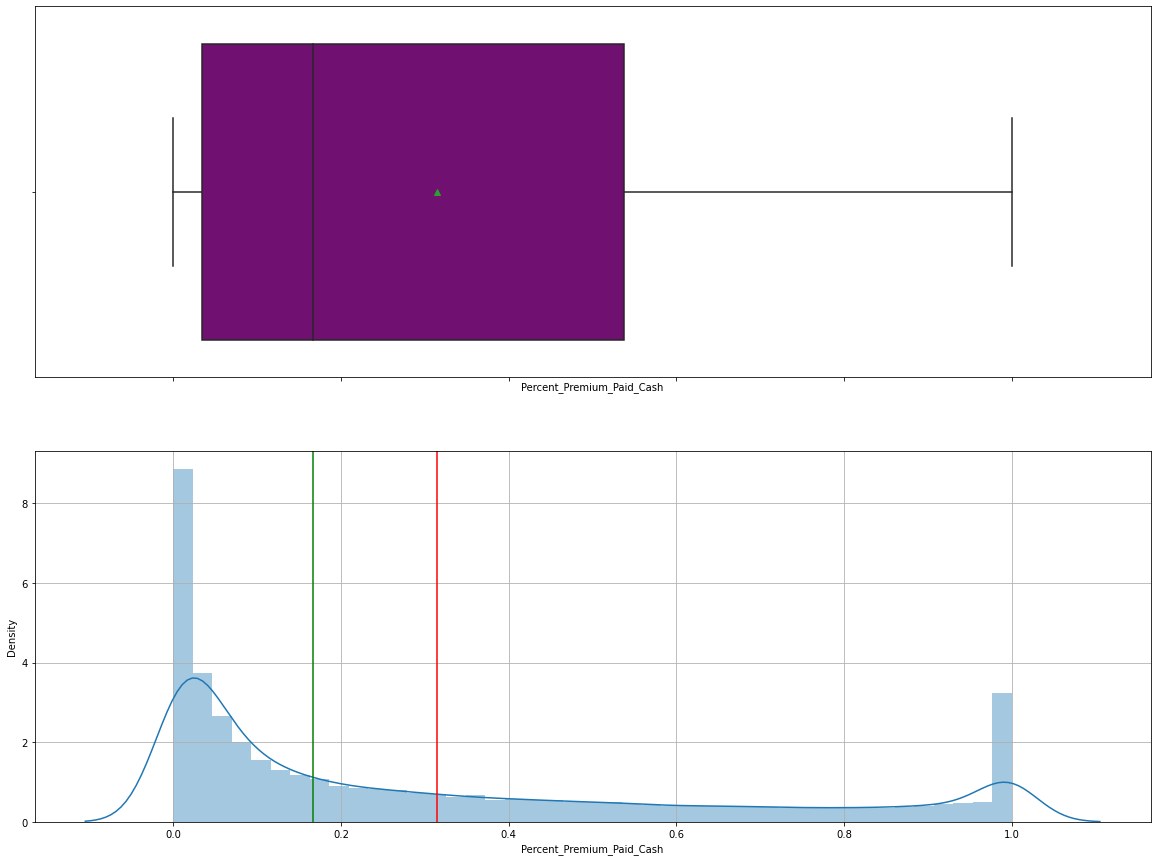

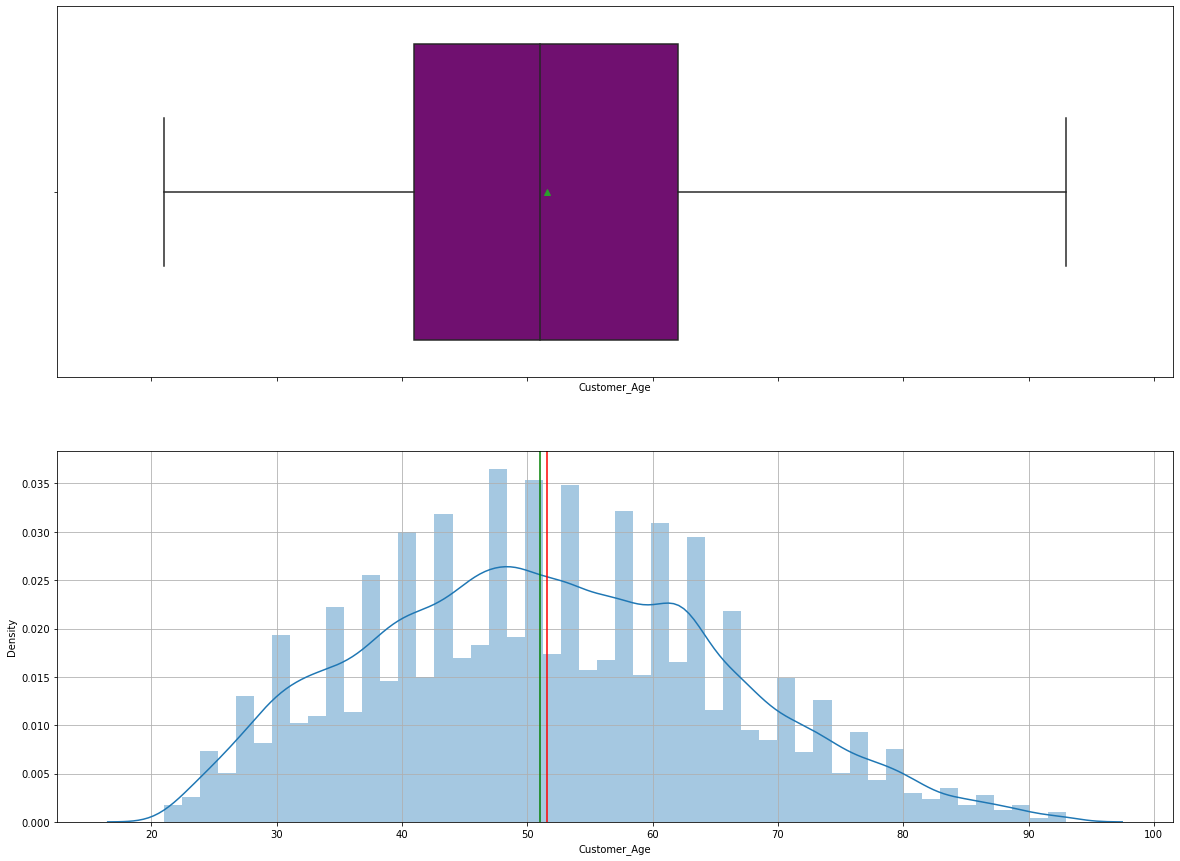

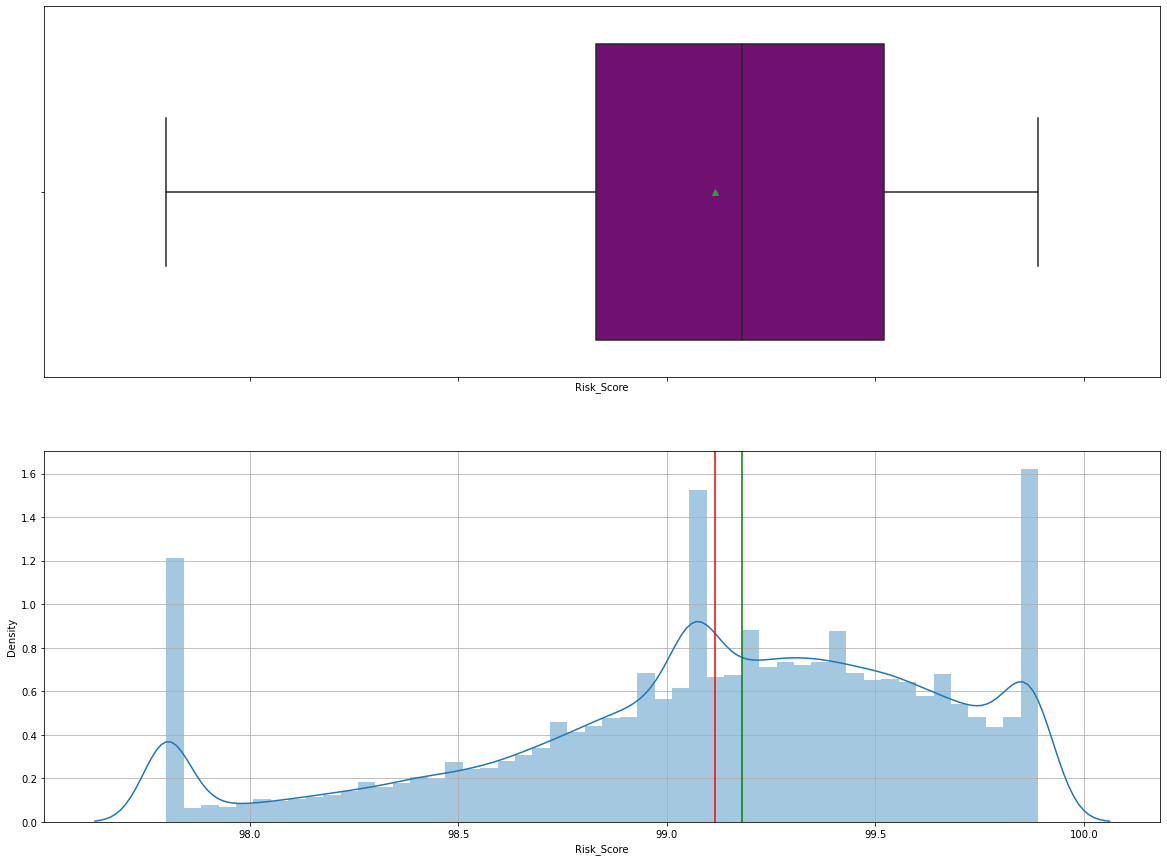

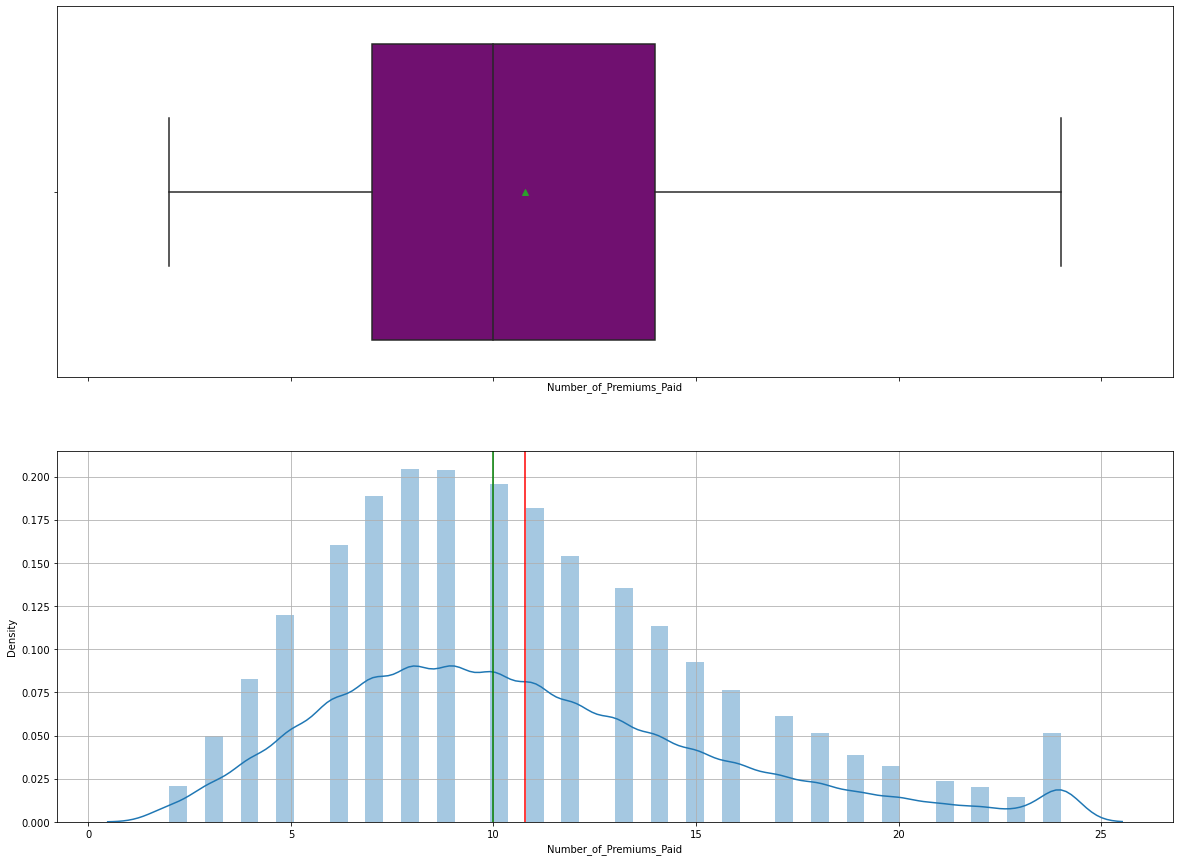

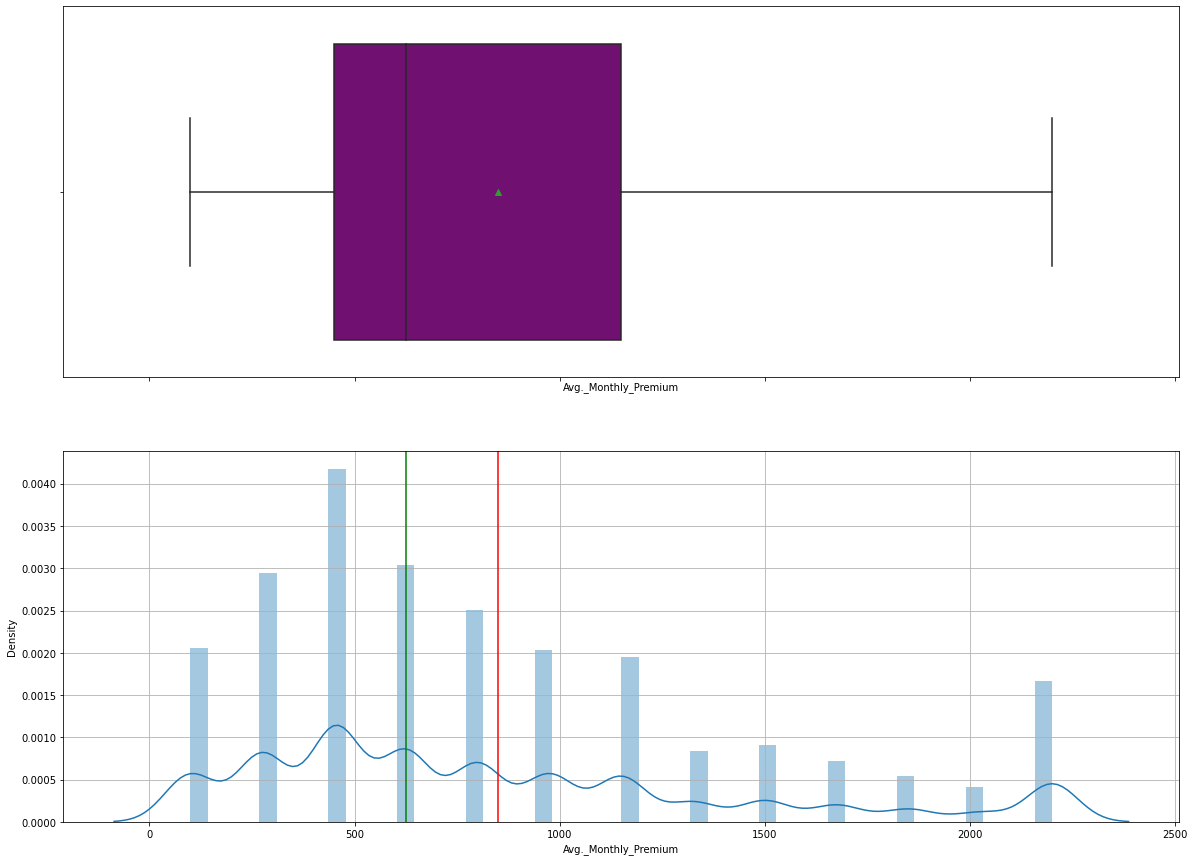

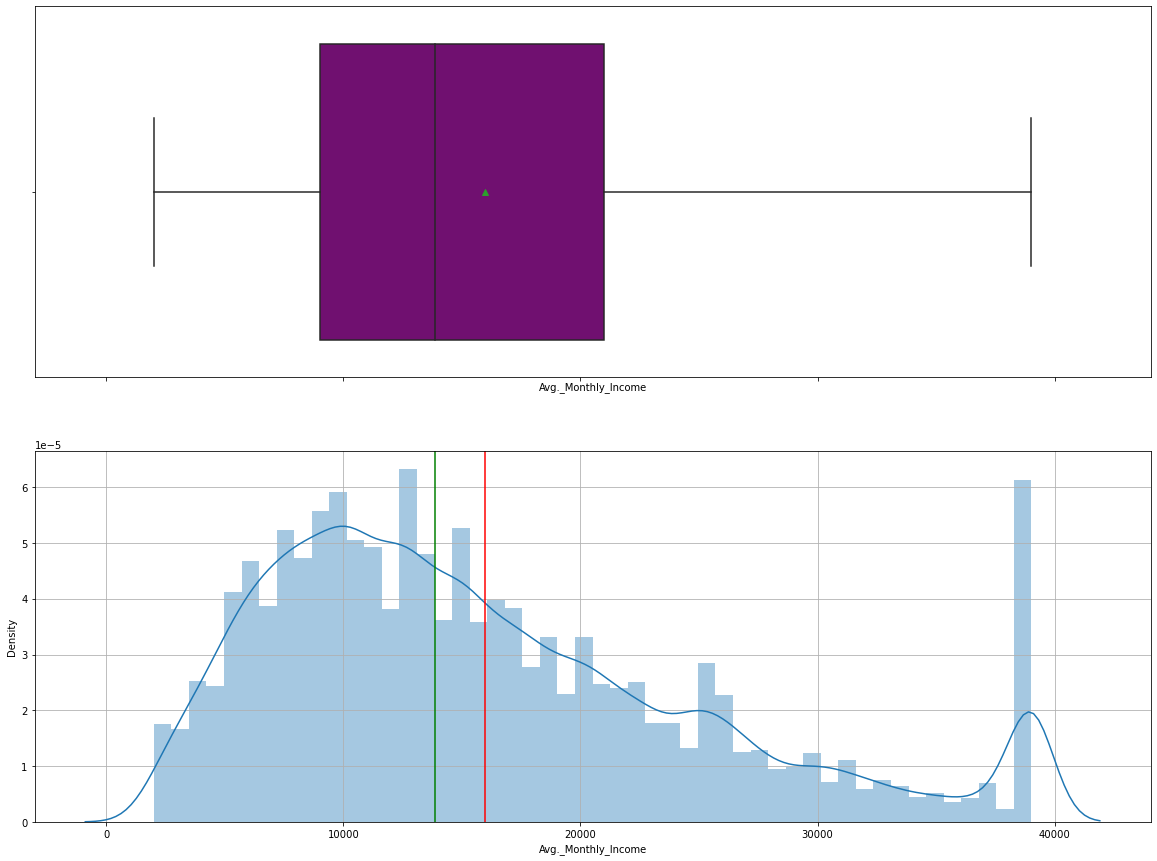

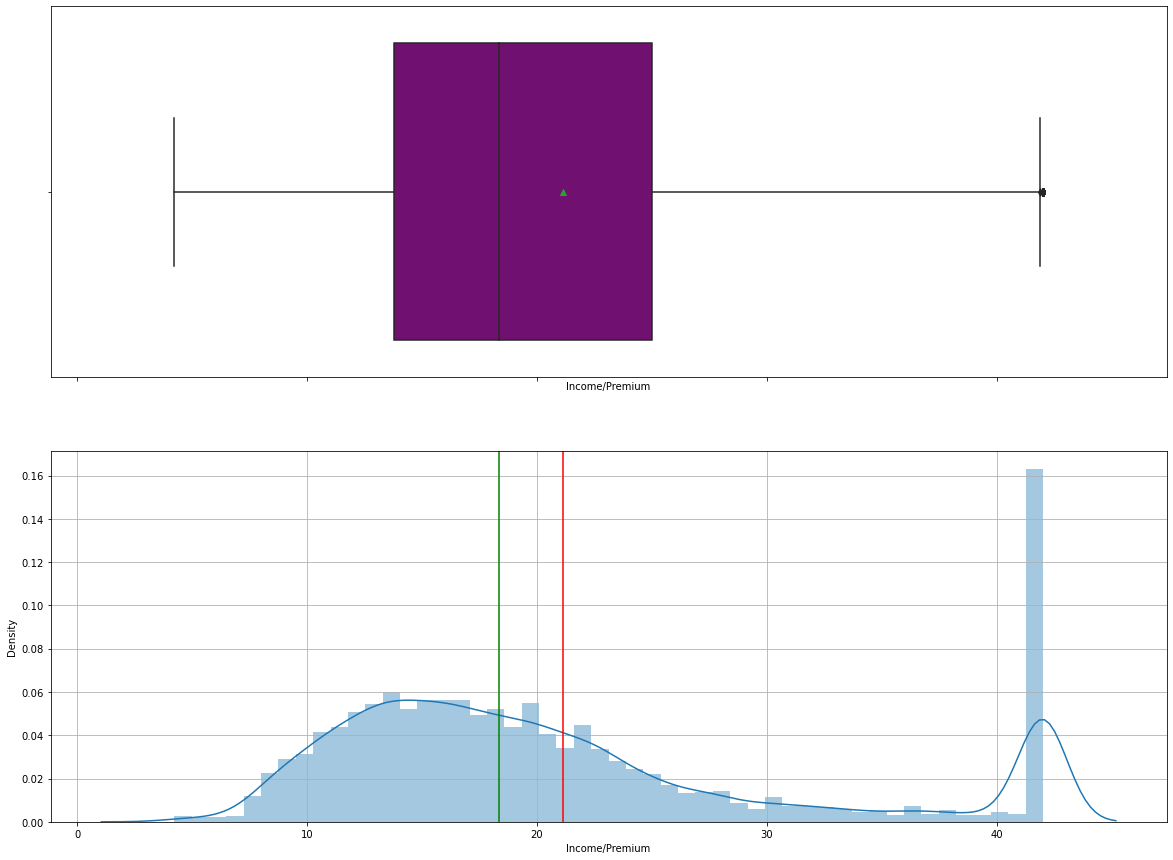

In [48]:
# Create a list of numerical columns for Histogram/Boxplot subplot then loop through each using above function

# Create list of numerical (continuous) columns
numerical_cols = [
    'Percent_Premium_Paid_Cash', 
    'Customer_Age', 
    'Risk_Score',
    'Number_of_Premiums_Paid',
    'Avg._Monthly_Premium',
    'Avg._Monthly_Income',
    'Income/Premium'
    ]

# Loop through each of the name variables above and create the respective dual graphs
for i in numerical_cols:
    dist_box(df[i])

#### Observations

**Distribution:**
**Normal (Mean Similar to Median):**
- Customer Age
    - Unimodal distribution
- Risk Score
    - Multimodal (3) distribution
- Number of Premiums Paid
    - Unimodal distribution

**Right/Positive Skewed (Mean Larger than Median)**:
- Percent Premium Paid Cash
    - Bimodal distribution
- Avg. Monthly Premium
- Avg. Monthly Income
    - Bimodal distribution
- Income/Premium
    - Bimodal distribution

**Outliers:**
- As already addressed during Preprocessing review, the outliers (particularly on the high/ight side of most variables) have been capped at Lower/Upper bound + 1.5x IQR respectively
- All data appears more normalized, while **still keep respective Normal/Left/Right skewedness, just less severly overstated**

### Bivariate Analysis

The previously categorical feature, Renewed Policy, can be converted to 

It is easier to create a new feature as a copy of the old Renewed Policy variable then reverse the ordering while simultaneously converting to numerical datatypes.  **The old column, Renewed Policy (categorical) can be dropped during the Train/Validation/Test process**.

In [49]:
# Create temporary (inverted) Target column for Non-Renewal (1) and Renewal (0) - ML Models will use similar inverted logic

# Replace the strings (Yes/No) with inverted intergers for target (0/1)
df['Renewed_Policy'].replace(to_replace = 'Yes', value = 1, inplace = True)
df['Renewed_Policy'].replace(to_replace = 'No', value = 0, inplace = True)


df['Renewed_Policy'] = pd.to_numeric(df['Renewed_Policy']) # Convert to Numeric datatype

# Inspect the unique value counts - target 1 being the minority now
df['Renewed_Policy'].value_counts()

1    74855
0     4998
Name: Renewed_Policy, dtype: int64

#### Renewed Policy Trend by Sourcing Channel

In [50]:
df['Renewed_Policy'][df['Renewed_Policy'] == 0]

4        0
89       0
101      0
132      0
138      0
        ..
79749    0
79768    0
79770    0
79798    0
79846    0
Name: Renewed_Policy, Length: 4998, dtype: int64

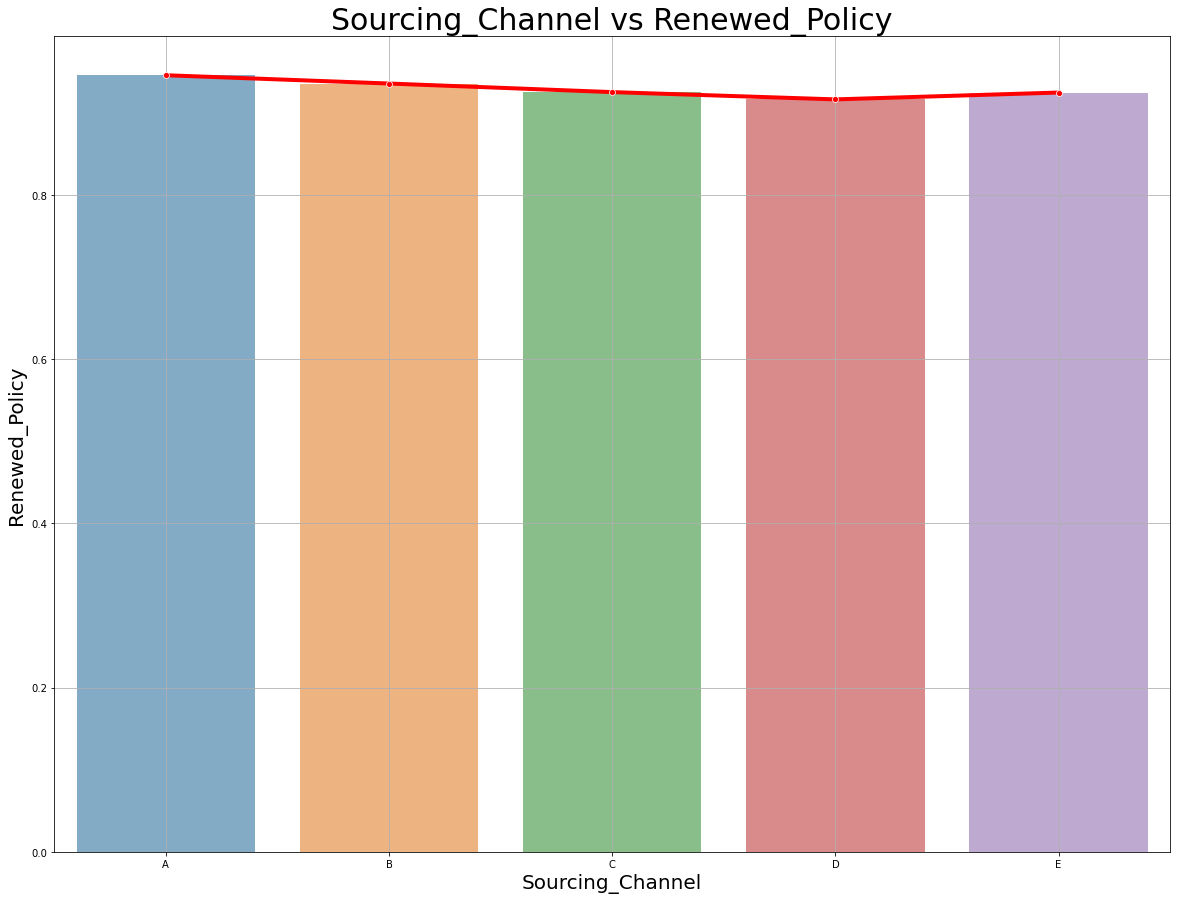

In [51]:
# Plot a subplot (Barplot with/or Lineplot) for target feature (Non-Renewal) plus one other feature

# Set chart function details for summary table - data, feature

data = df
feature = 'Sourcing_Channel'
target = 'Renewed_Policy'

fig, ax1 = plt.subplots(figsize=(20,15))
plt.title(feature + ' vs ' + target, fontdict = {'fontsize': 30})

sns.lineplot(x = data[feature], y = data[target], marker='o', linewidth = 4,
             ci = None, color = 'red', ax = ax1)


# ax2 = ax1.twiny() # Share same Y-Axis

sns.barplot(x = data[feature], y = data[target], alpha=0.6, ci = None, ax = ax1);

plt.ylabel(target, fontdict = {'fontsize' : 20})
plt.xlabel(feature, fontdict = {'fontsize' : 20});
plt.grid()

In [52]:
# Calculate and print out summary of % Non-Renewed Policy accounts by Sourcing Channel - for Line Chart above
print('Percentage splits of Non-Renewed Policies by Sourcing Channel:')

# Calculate each % split of Renewed_Policys by Sourcing Channel - code split on 2 lines

print('Channel A: ',round(1 - (df['Renewed_Policy'][(df['Sourcing_Channel'] == 'A') & (df['Renewed_Policy'] == 1)].count() \
/ df['Sourcing_Channel'][df['Sourcing_Channel'] == 'A'].count()),3))

print('Channel B: ',round(1 - (df['Renewed_Policy'][(df['Sourcing_Channel'] == 'B') & (df['Renewed_Policy'] == 1)].count() \
/ df['Sourcing_Channel'][df['Sourcing_Channel'] == 'B'].count()),3))

print('Channel C: ',round(1 - (df['Renewed_Policy'][(df['Sourcing_Channel'] == 'C') & (df['Renewed_Policy'] == 1)].count() \
/ df['Sourcing_Channel'][df['Sourcing_Channel'] == 'C'].count()),3))

print('Channel D: ',round(1 - (df['Renewed_Policy'][(df['Sourcing_Channel'] == 'D') & (df['Renewed_Policy'] == 1)].count() \
/ df['Sourcing_Channel'][df['Sourcing_Channel'] == 'D'].count()),3))

print('Channel E: ',round(1 - (df['Renewed_Policy'][(df['Sourcing_Channel'] == 'E') & (df['Renewed_Policy'] == 1)].count() \
/ df['Sourcing_Channel'][df['Sourcing_Channel'] == 'E'].count()),3))

Percentage splits of Non-Renewed Policies by Sourcing Channel:
Channel A:  0.054
Channel B:  0.065
Channel C:  0.075
Channel D:  0.084
Channel E:  0.076


- We can see that **Channel D has the lowest renewals (highest split of customer non-renewals (8.4%))**, closely followed by Channels C and E with similar splits (7.5% and 7.6% non-renewals respectively)
- **Channel A has the highest renewals (lowest non-renewals (5.4%))**

#### Renewed Policy Trend by Previously Late

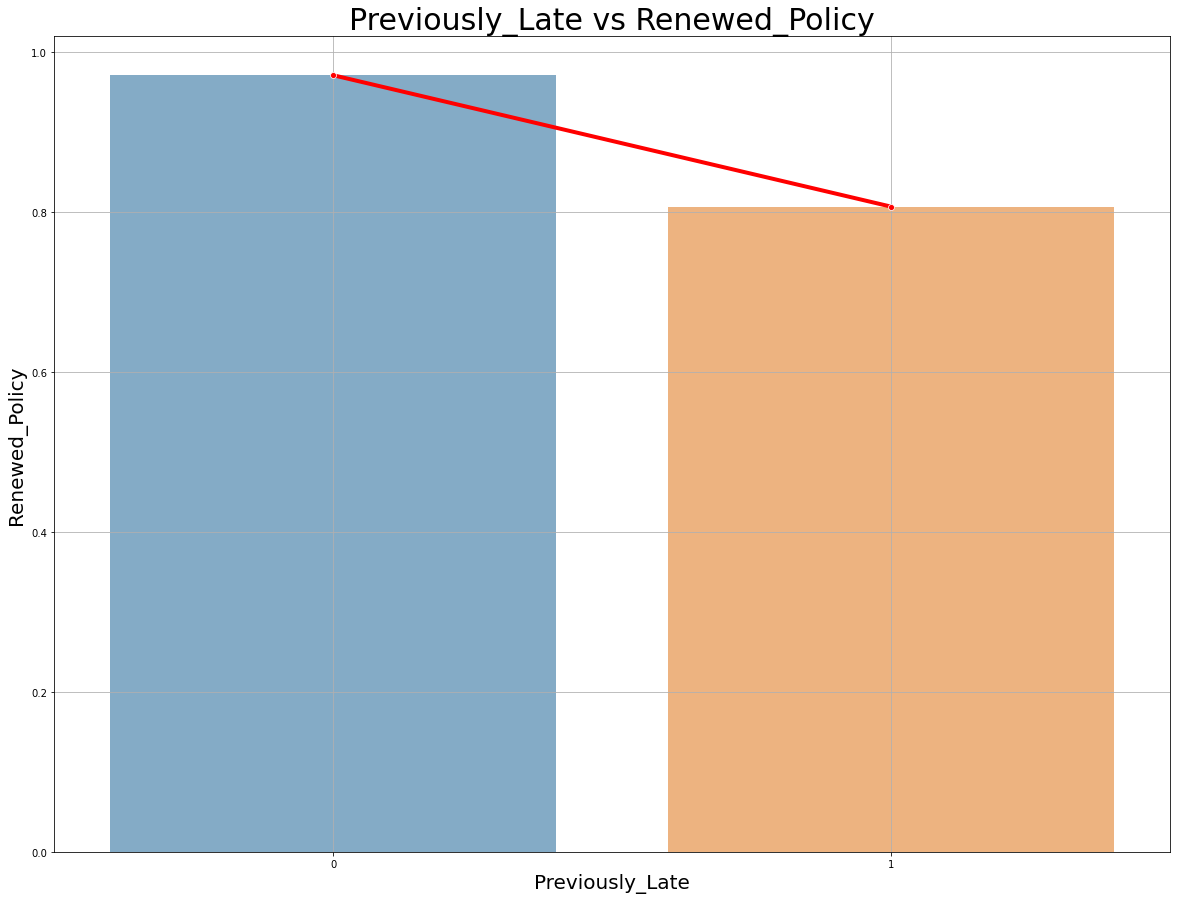

In [53]:
# Plot a subplot (Barplot with/or Lineplot) for target feature (Non-Renewal) plus one other feature

# Set chart function details for summary table - data, feature

data = df
feature = 'Previously_Late'
target = 'Renewed_Policy'

fig, ax1 = plt.subplots(figsize=(20,15))
plt.title(feature + ' vs ' + target, fontdict = {'fontsize': 30})

sns.lineplot(x = data[feature], y = data[target], marker='o', linewidth = 4,
             ci = None, color = 'red', ax = ax1)

# ax2 = ax1.twiny() # Share same Y-Axis

sns.barplot(x = data[feature], y = data[target], alpha=0.6, ci = None, ax = ax1);

plt.ylabel(target, fontdict = {'fontsize' : 20})
plt.xlabel(feature, fontdict = {'fontsize' : 20});
plt.grid()

- Customers who have been previously late over the course of their relationship with the business, account for upwards of 18% of the Non-Renewals (only 82% renew), **whereas those customers never late on premium only comprise around 3% of Non-Renewals**

#### Renewed Policy Trend by Customer Age

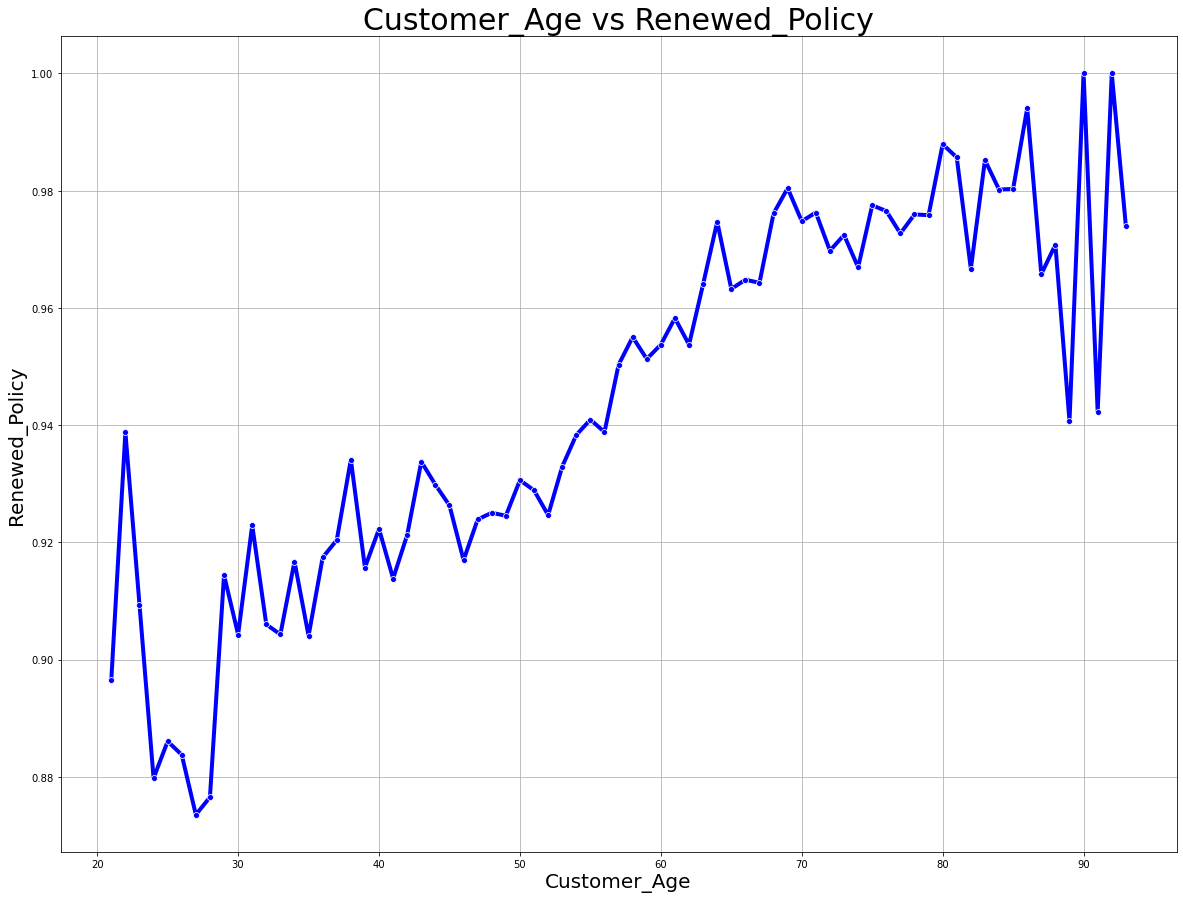

In [54]:
# Plot a subplot (Barplot with/or Lineplot) for target feature (Non-Renewal) plus one other feature

# Set chart function details for summary table - data, feature

# Using a customer feature for X to remove outliers

data = df
feature = 'Customer_Age'
target = 'Renewed_Policy'

fig, ax1 = plt.subplots(figsize=(20,15))
plt.title(feature + ' vs ' + target, fontdict = {'fontsize': 30})

sns.lineplot(x = data[feature], y = data[target], marker='o', linewidth = 4,
             ci = None, color = 'blue', ax = ax1)

plt.ylabel(target, fontdict = {'fontsize' : 20})
plt.xlabel(feature, fontdict = {'fontsize' : 20});
plt.grid()

The overall trend indicates that likelihood of Renewals substantially **increases, proportionately, as the age of customers increase** - i.e. negatively correlated to non-renewals (inverted).
- In general, **customers in the 30s to 40s range from 7% to 9% likelihood of Non-Renewal vs. customers nearing 70, with closer to 2% likelihood of Non-Renewal**
    - Customers in their late 80s to early 90s are less consistent in renewing their policies due to various factors, part of which could be the death of older customers no longer requiring continued insurance coverage and premium payments

#### Renewed Policy Trend by Avg. Monthly Premium

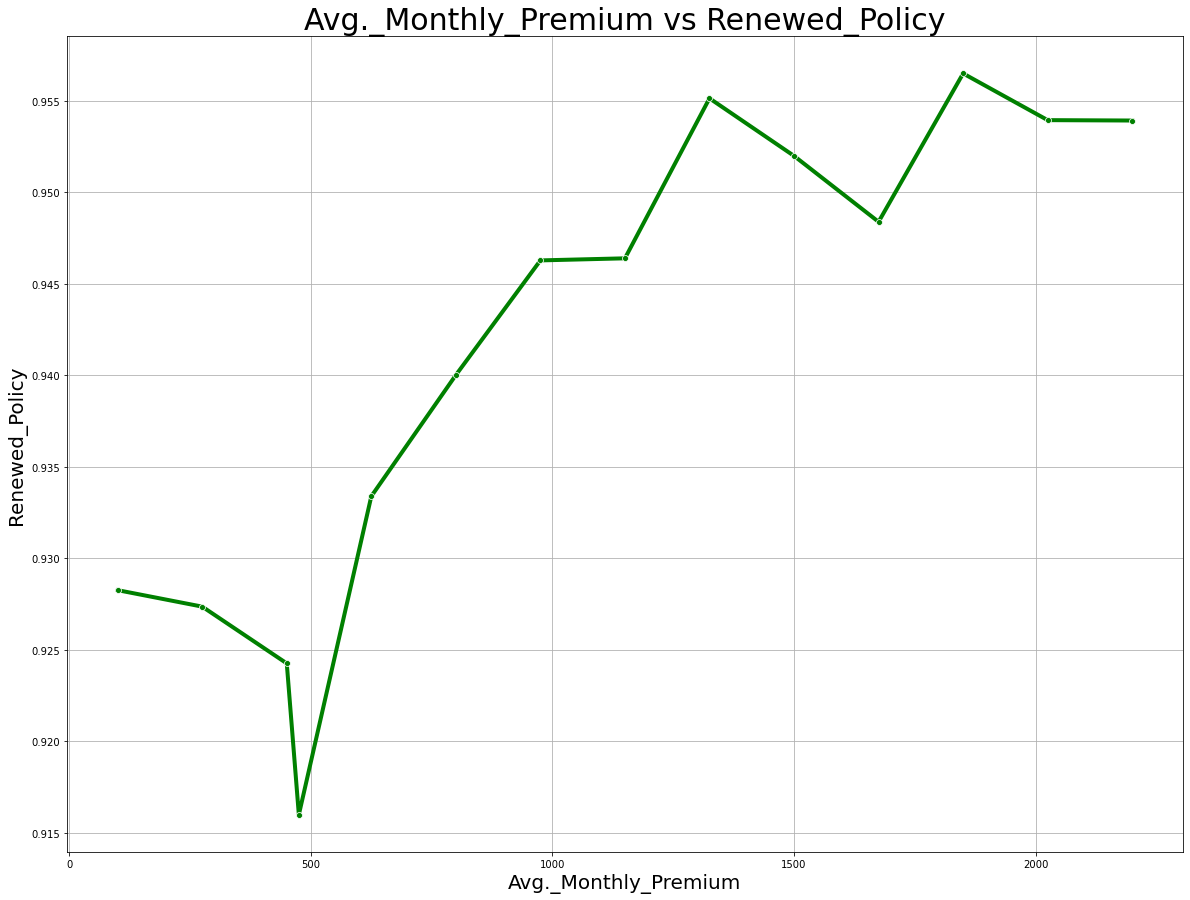

In [55]:
# Plot a subplot (Barplot with/or Lineplot) for target feature (Non-Renewal) plus one other feature

# Set chart function details for summary table - data, feature

data = df
feature = 'Avg._Monthly_Premium'
target = 'Renewed_Policy'

fig, ax1 = plt.subplots(figsize=(20,15))
plt.title(feature + ' vs ' + target, fontdict = {'fontsize': 30})

sns.lineplot(x = data[feature], y = data[target], marker='o', linewidth = 4,
             ci = None, color = 'green', ax = ax1)

plt.ylabel(target, fontdict = {'fontsize' : 20})
plt.xlabel(feature, fontdict = {'fontsize' : 20});
plt.grid()

The overall trend indicates that, after a minimum payment of \\$500 a month, the **likelihood of Renewals improves as the Average Monthly Premium increases** - i.e. negatively correlated to non-renewals (inverted).

#### Renewals by Risk Score

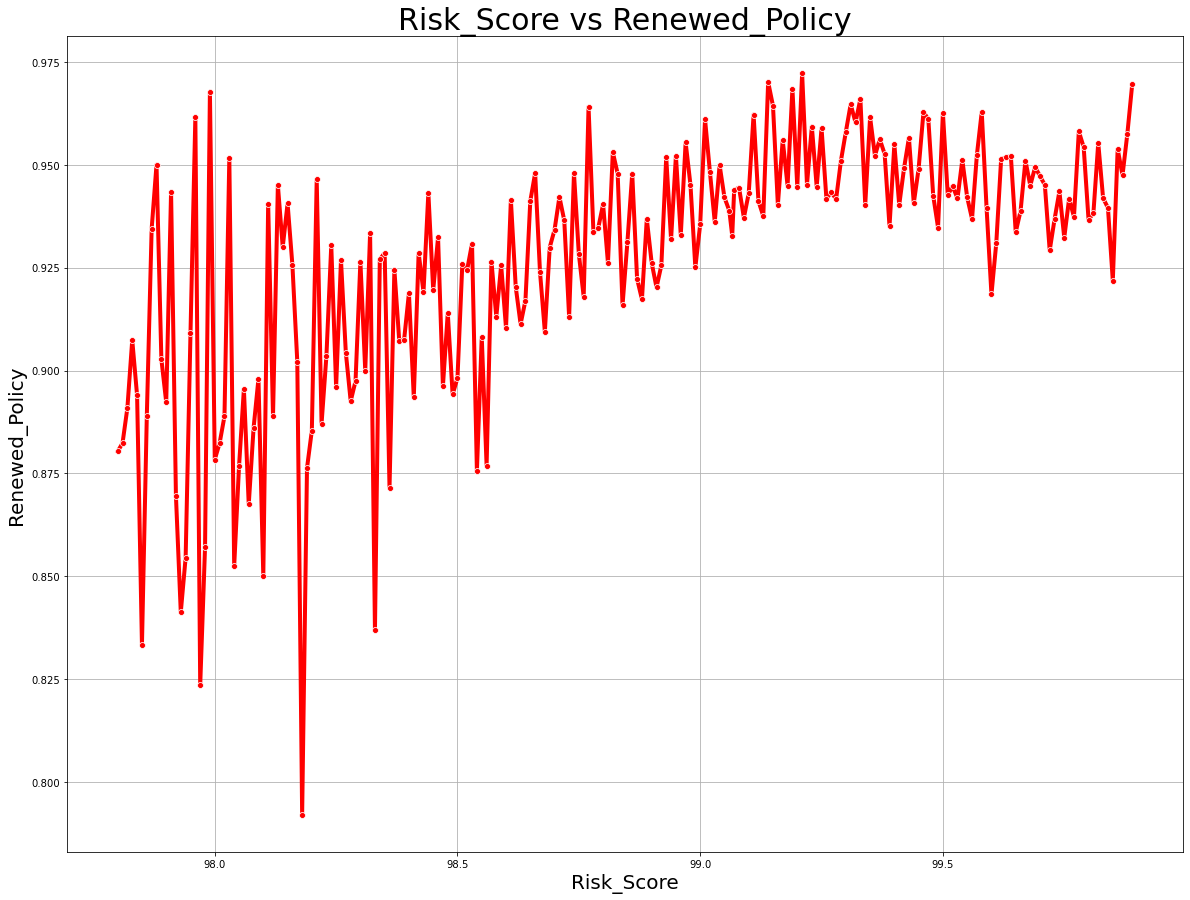

In [56]:
# Plot a subplot (Barplot with Lineplot) for target feature (Non-Renewal) plus one other feature

# Set chart function details for summary table - data, feature

data = df
feature = 'Risk_Score'
target = 'Renewed_Policy'

fig, ax1 = plt.subplots(figsize=(20,15))
plt.title(feature + ' vs ' + target, fontdict = {'fontsize': 30})

sns.lineplot(x = data[feature], y = data[target], marker='o', linewidth = 4,
             ci = None, color = 'red', ax = ax1)

plt.ylabel(target, fontdict = {'fontsize' : 20})
plt.xlabel(feature, fontdict = {'fontsize' : 20});
plt.grid()

Less consistent in terms of correlation patterns, the general pattern indicates that **the likelihood of Renewal increases as customer Risk Scores improve** - i.e. negatively correlated to non-renewals (inverted).
    - A large reason for this is that higher risk customers are more likely to file a claim, hence the risk, and are **more incentivized to continue renewing their insurance policies**

### Covariance & Correlation

#### Covariance

In [57]:
# Inspect the Covariance (non-standardized) between all numeric variables in sample dataset

cov = round(df.cov(),4) # Rounded to 4 decimals for easier viewing

# Inspect the DataFrame Covariance
cov

id  Percent_Premium_Paid_Cash  \
id                         5.313818e+08                    37.3659   
Percent_Premium_Paid_Cash  3.736590e+01                     0.1122   
Customer_Age              -1.698835e+03                    -1.2382   
Marital_Status             4.041220e+01                    -0.0006   
Vehicle_Owned              3.001770e+01                    -0.0007   
Number_of_Dependents      -3.847120e+01                    -0.0017   
Accommodation              3.858300e+01                     0.0005   
Risk_Score                 1.276050e+01                    -0.0298   
Number_of_Premiums_Paid    3.329820e+02                    -0.2586   
Previously_Late            5.085790e+01                     0.0366   
Avg._Monthly_Premium      -2.797470e+04                   -15.5892   
Avg._Monthly_Income       -6.657953e+05                  -328.6875   
Income/Premium             3.368671e+02                    -0.0344   
Renewed_Policy             2.820940e+01                    -0.0195   

                           Customer_Age  Marital_Status  Vehicle_Owned  \
id                           -1698.8350         40.4122        30.0177   
Percent_Premium_Paid_Cash       -1.2382         -0.0006        -0.0007   
Customer_Age                   203.4915          0.0192         0.0027   
Marital_Status                   0.0192          0.2500         0.0026   
Vehicle_Owned                    0.0027          0.0026         0.6679   
Number_of_Dependents            -0.0050          0.0013         0.0058   
Accommodation                   -0.0244         -0.0007         0.0005   
Risk_Score                       0.4879          0.0008         0.0019   
Number_of_Premiums_Paid         12.4713         -0.0075        -0.0007   
Previously_Late                 -0.5780         -0.0007         0.0012   
Avg._Monthly_Premium           683.7152         -1.0332        -3.5382   
Avg._Monthly_Income          14198.2891         15.0892        -8.3529   
Income/Premium                   1.5493          0.0425         0.0735   
Renewed_Policy                   0.3288          0.0008         0.0001   

                           Number_of_Dependents  Accommodation  Risk_Score  \
id                                     -38.4712        38.5830     12.7605   
Percent_Premium_Paid_Cash               -0.0017         0.0005     -0.0298   
Customer_Age                            -0.0050        -0.0244      0.4879   
Marital_Status                           0.0013        -0.0007      0.0008   
Vehicle_Owned                            0.0058         0.0005      0.0019   
Number_of_Dependents                     1.2452        -0.0032     -0.0001   
Accommodation                           -0.0032         0.2500     -0.0005   
Risk_Score                              -0.0001        -0.0005      0.2964   
Number_of_Premiums_Paid                  0.0193         0.0014     -0.8265   
Previously_Late                          0.0018         0.0009     -0.0140   
Avg._Monthly_Premium                     6.7872         0.4681     40.1949   
Avg._Monthly_Income                    100.4662        15.3075    825.9722   
Income/Premium                          -0.0419         0.0157      0.0896   
Renewed_Policy                          -0.0014        -0.0005      0.0094   

                           Number_of_Premiums_Paid  Previously_Late  \
id                                        332.9820          50.8579   
Percent_Premium_Paid_Cash                  -0.2586           0.0366   
Customer_Age                               12.4713          -0.5780   
Marital_Status                             -0.0075          -0.0007   
Vehicle_Owned                              -0.0007           0.0012   
Number_of_Dependents                        0.0193           0.0018   
Accommodation                               0.0014           0.0009   
Risk_Score                                 -0.8265          -0.0140   
Number_of_Premiums_Paid                    23.5435           0.03

Covariance is harder to easily quantify directly relationships as it is not standardized, like Correlation, however there some notable columns that appear to **vary vastly from the rest of the dataset, even after outlier treatment (due to scaling)**:
- **Avg. Monthly Premium/Income** - due to still being larger, now monthly, figures operating on separate scales to the majority of the, mostly discrete, variables
- The Standard Scaler (based on z-Score) or Min/Max Scaler (0-1 range) could be utilized during the modeling process, **however for EDA we can rely on Correlation for simple examination**

#### Correlation

In [58]:
# Inspect the Correlation (standardized) between all numeric variables in sample dataset

corr = round(df.corr(),4) # Rounded to 4 decimals for easier viewing

# Inspect the DataFrame Correlation
corr

id  Percent_Premium_Paid_Cash  Customer_Age  \
id                         1.0000                     0.0048       -0.0052   
Percent_Premium_Paid_Cash  0.0048                     1.0000       -0.2592   
Customer_Age              -0.0052                    -0.2592        1.0000   
Marital_Status             0.0035                    -0.0034        0.0027   
Vehicle_Owned              0.0016                    -0.0024        0.0002   
Number_of_Dependents      -0.0015                    -0.0046       -0.0003   
Accommodation              0.0033                     0.0033       -0.0034   
Risk_Score                 0.0010                    -0.1634        0.0628   
Number_of_Premiums_Paid    0.0030                    -0.1591        0.1802   
Previously_Late            0.0055                     0.2721       -0.1007   
Avg._Monthly_Premium      -0.0020                    -0.0786        0.0809   
Avg._Monthly_Income       -0.0031                    -0.1067        0.1082   
Income/Premium             0.0014                    -0.0102        0.0108   
Renewed_Policy             0.0051                    -0.2410        0.0952   

                           Marital_Status  Vehicle_Owned  \
id                                 0.0035         0.0016   
Percent_Premium_Paid_Cash         -0.0034        -0.0024   
Customer_Age                       0.0027         0.0002   
Marital_Status                     1.0000         0.0063   
Vehicle_Owned                      0.0063         1.0000   
Number_of_Dependents               0.0023         0.0064   
Accommodation                     -0.0028         0.0012   
Risk_Score                         0.0029         0.0042   
Number_of_Premiums_Paid           -0.0031        -0.0002   
Previously_Late                   -0.0033         0.0037   
Avg._Monthly_Premium              -0.0035        -0.0073   
Avg._Monthly_Income                0.0033        -0.0011   
Income/Premium                     0.0084         0.0089   
Renewed_Policy                     0.0068         0.0004   

                           Number_of_Dependents  Accommodation  Risk_Score  \
id                                      -0.0015         0.0033      0.0010   
Percent_Premium_Paid_Cash               -0.0046         0.0033     -0.1634   
Customer_Age                            -0.0003        -0.0034      0.0628   
Marital_Status                           0.0023        -0.0028      0.0029   
Vehicle_Owned                            0.0064         0.0012      0.0042   
Number_of_Dependents                     1.0000        -0.0056     -0.0001   
Accommodation                           -0.0056         1.0000     -0.0020   
Risk_Score                              -0.0001        -0.0020      1.0000   
Number_of_Premiums_Paid                  0.0036         0.0006     -0.3128   
Previously_Late                          0.0041         0.0046     -0.0640   
Avg._Monthly_Premium                     0.0103         0.0016      0.1246   
Avg._Monthly_Income                      0.0098         0.0033      0.1649   
Income/Premium                          -0.0037         0.0031      0.0163   
Renewed_Policy                          -0.0052        -0.0041      0.0713   

                           Number_of_Premiums_Paid  Previously_Late  \
id                                          0.0030           0.0055   
Percent_Premium_Paid_Cash                  -0.1591           0.2721   
Customer_Age                                0.1802          -0.1007   
Marital_Status                             -0.0031          -0.0033   
Vehicle_Owned                              -0.0002           0.0037   
Number_of_Dependents                        0.0036           0.0041   
Accommodation                               0.0006           0.0046   
Risk_Score                                 -0.3128          -0.0640   
Number_of_Premiums_Paid                     1.0000           0.0202   
Previously_Late                             0.0202           1.0000   
Avg._Mo

Additional insights from the above Correlations will easier to interpret, visually, through the use of a Heat Map which will be created below.

#### Heat Map (Correlation)

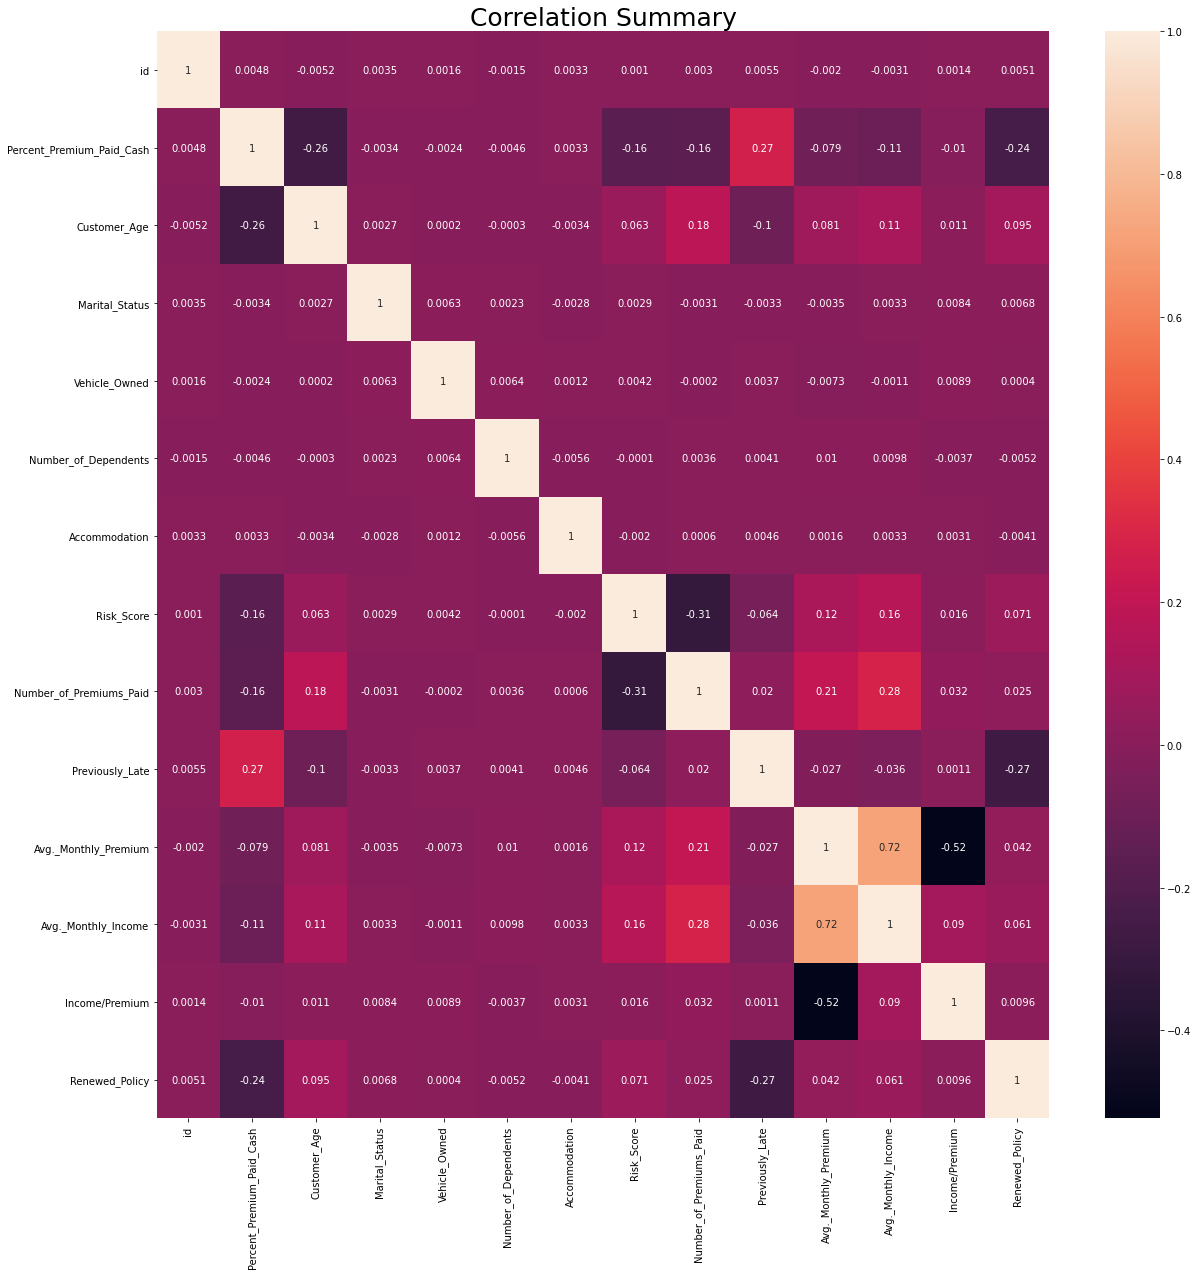

In [59]:
# Create a summary heatmap for the above correlation, with values annotated/included

plt.figure(figsize = (20,20)) # Set graph size proportions
sns.heatmap(corr, annot = True); # Annotations (rounded to 4 decimals) included
plt.title('Correlation Summary', fontdict = {'fontsize': 25});

#### Observations
- The strongest positive correlations, excluding Target variable, exist between:
    - **Positive Correlation**
        - Avg. Monthly Premium and Avg. Monthly Income (+72%)
        - Percent Premium Paid Cash and Previously Late (+28%)
        - Percent Premium Paid Cash and Avg. Monthly Income (+27%)
    - **Negative Correlation**
        - Avg. Monthly Premium and Income/Premium (-52%)    
        - Number of Premiums Paid and Risk Score (-31%)
        - Percent Premium Paid Cash and Customer Age (-26%)
- Focusing on purely the Renewed Policy (Numerical Target) column:
    - **Positive Correlation**
        - Previously Late (-27%)    
        - Percent Premium Paid Cash (-24%)

#### Scatterplot (with Target)

<Figure size 2160x1440 with 0 Axes>

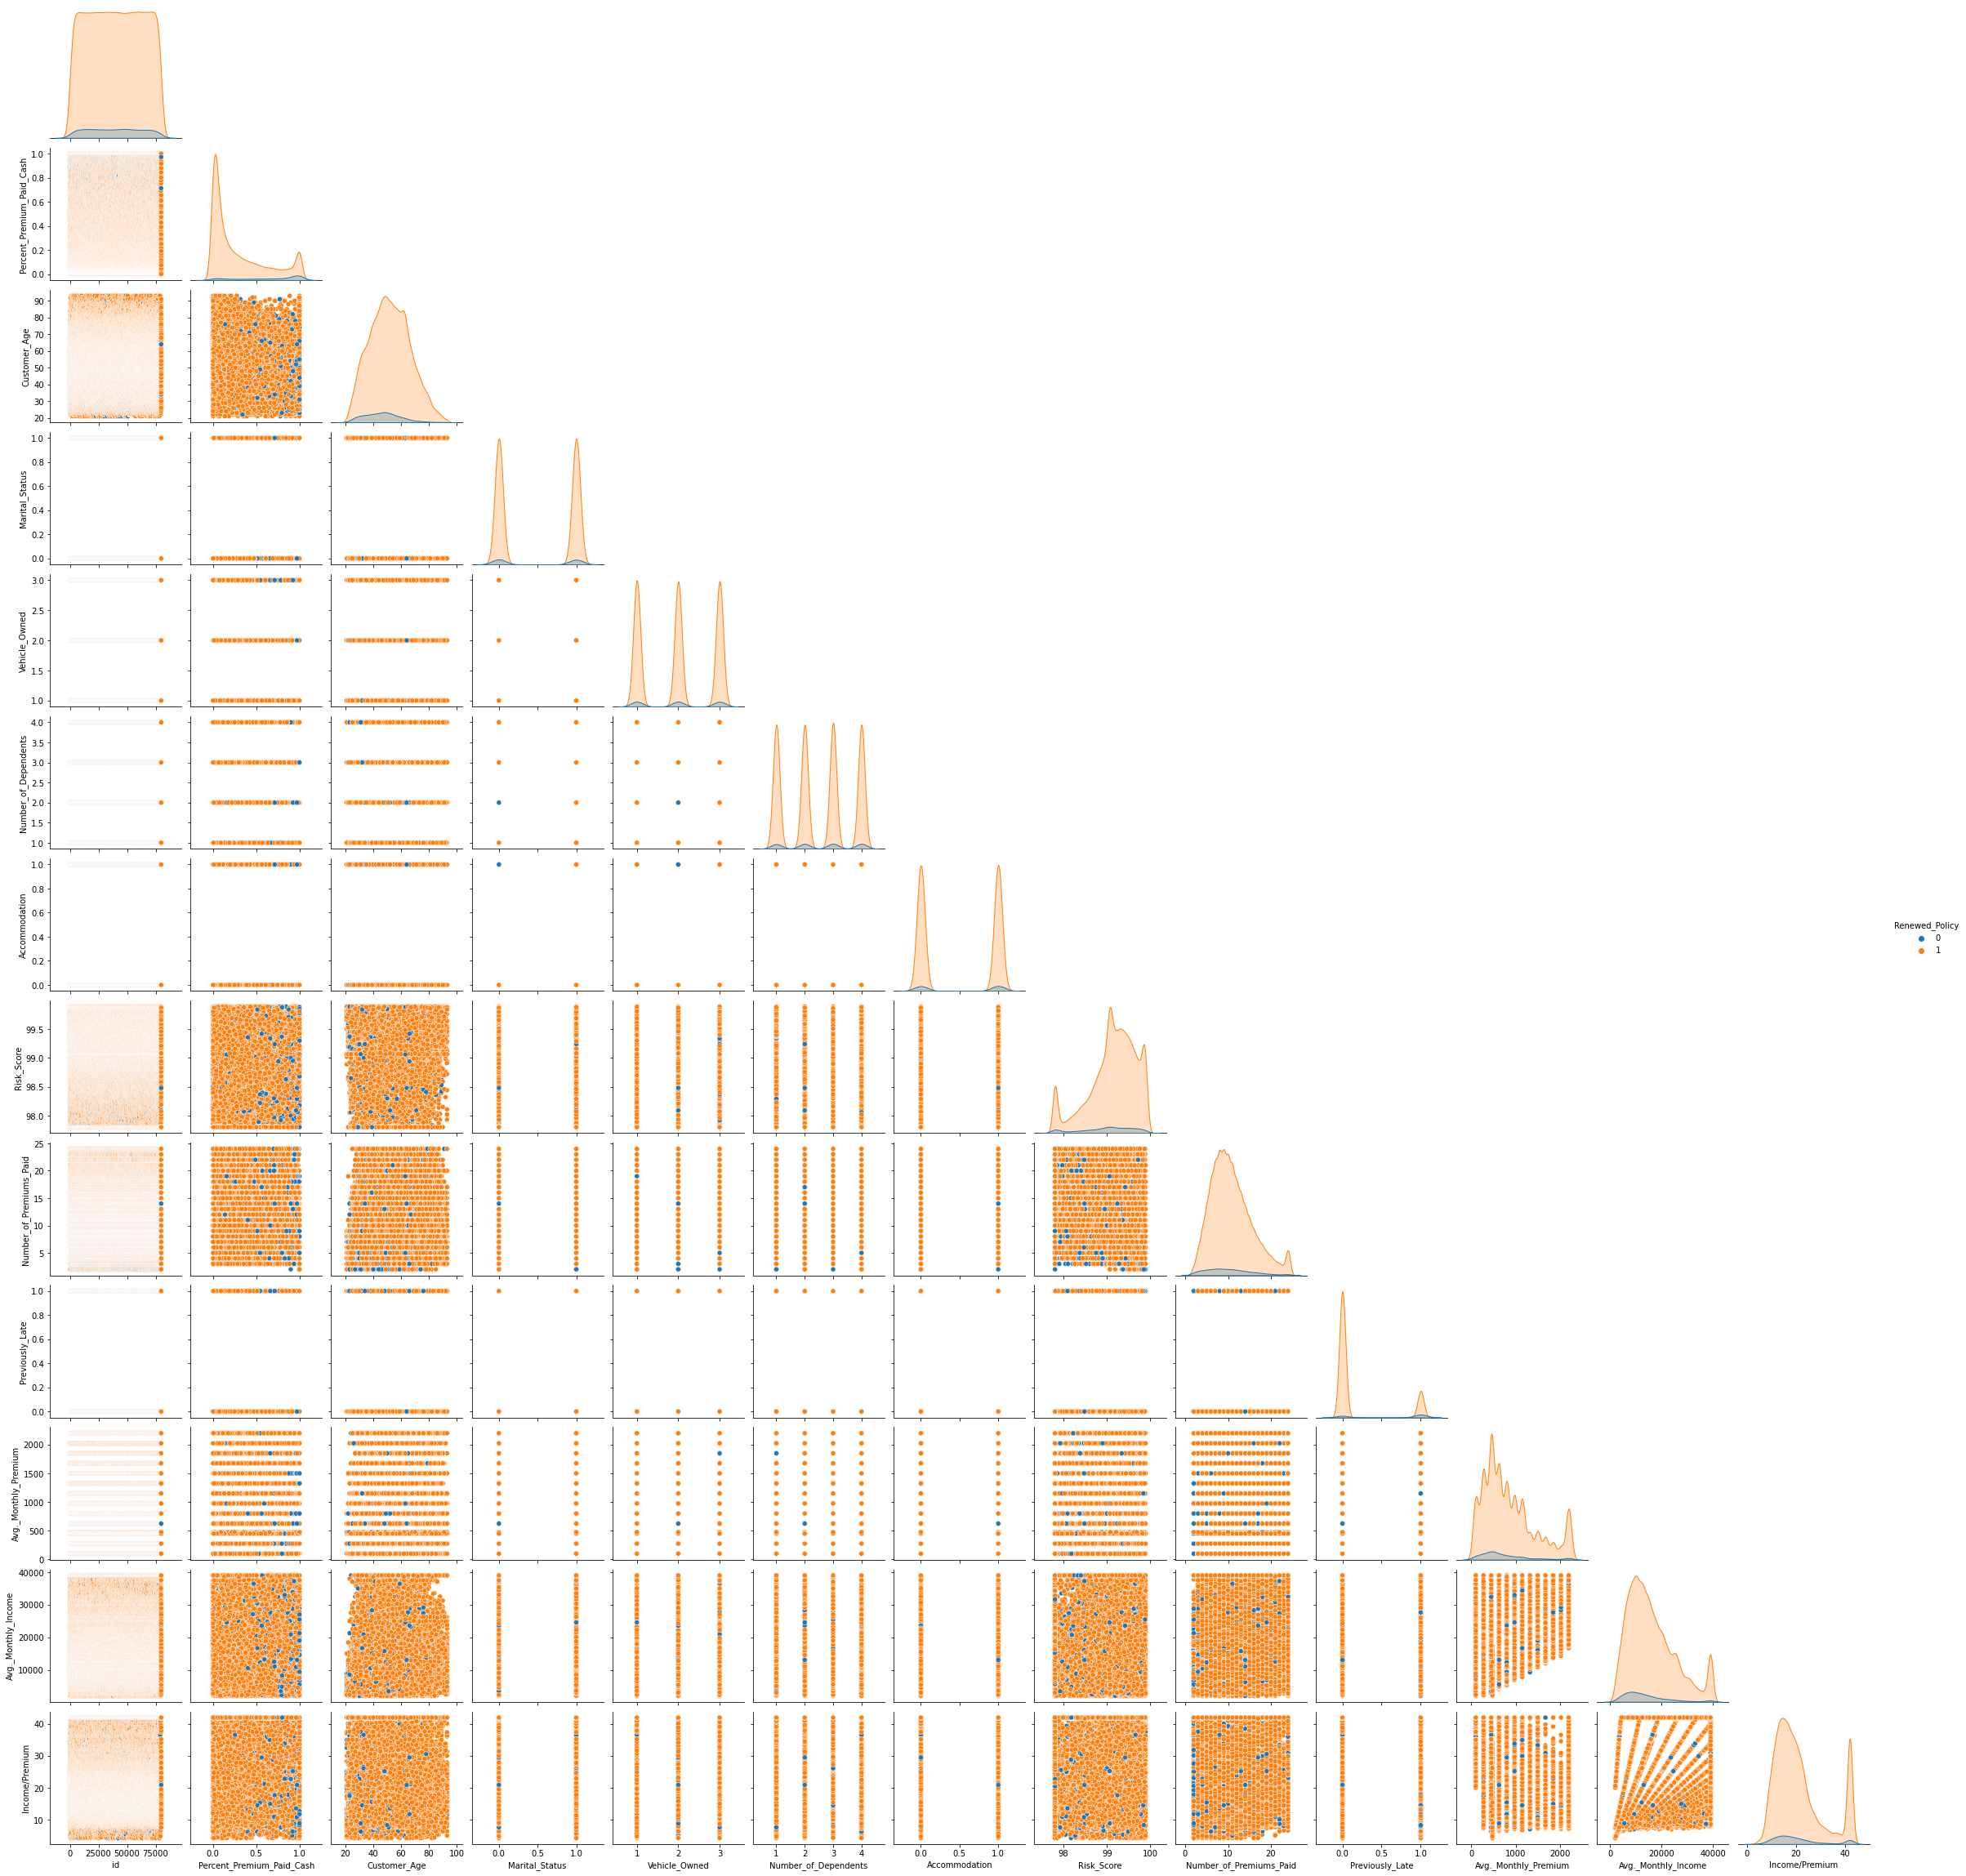

In [60]:
# Create pairplot detailing the relationship of each variable to it's respective counterpart - vs. target as Hue

plt.figure(figsize = (30,20)) # Setting a larger plot size due to the amount of variables included
sns.pairplot(data = df, hue = 'Renewed_Policy', corner = True); # Corner removes half of the plot (duplicates)

#### Observations
**Target Feature:**
- Due to the substantial **imbalance in the classes within the Renewed Policy (Target) column (6% Non-Renewal to 94% Renewal)**, it is hard to identify strong trends or correlative patterns withing the PairPlot
    - Additional insight will likely be gleamed through various predictive modeling attempts, particularly after **UpSampling the minority class equal to the Majority (after Train/Val/Test splits)**

**Risk Score:**
- Indicative of likelihood of filing a claim, from a correlation standpoint
    - The entire sample distribution lies within a **small range (92%-99.9%) and is disproportionately assigning risk to all variables within the small sample**

**Number of Premiums Paid:**
- Slightly bimodal, normal distribution (Mean similar to Median)
- Excluding Risk Score, no notable correlations to other variables sampled

**Percent Premiums Paid Cash:**
- **Bimodal distribution**, with a large portion of customers having paid less than half their policies in cash, however there is also a **notable segment of customers having paid upwards of 75% or more of their premiums in cash**
- Slightly increased likelihood of late count (blended 3-12+ months) on premiums closer to 75%+ paid in cash

**Avg. Monthly Premium:**
- **Bimodal distribution and is right skewed (Mean larger than Median)**
- **Mixed distribution in relation to Income/Premium ratio**, indicating that not all higher income customers have proportionately high premiums allocated to their account
    - These higher income customers may have other policies with other providers to split the risk allocation, etc.

**Avg. Monthly Income:**
- **Bimodal distribution and is right skewed (Mean larger than Median)**

**Income/Premium:**
- **Bimodal distribution and is right skewed (Mean larger than Median)**
- Somewhat negatively correlated to all Months Late counts (late counts increase as income decreases)
- **Largely unaffected by Marital Status, Vehicles Owned, Dependent Count, or Accommodation Type (excluding outliers)**

### Interaction Analysis (Multivariate with Target)

Let's further examine the relationship of select numerical features to the target variable, incorporating additional variable splits through the Hue legend.

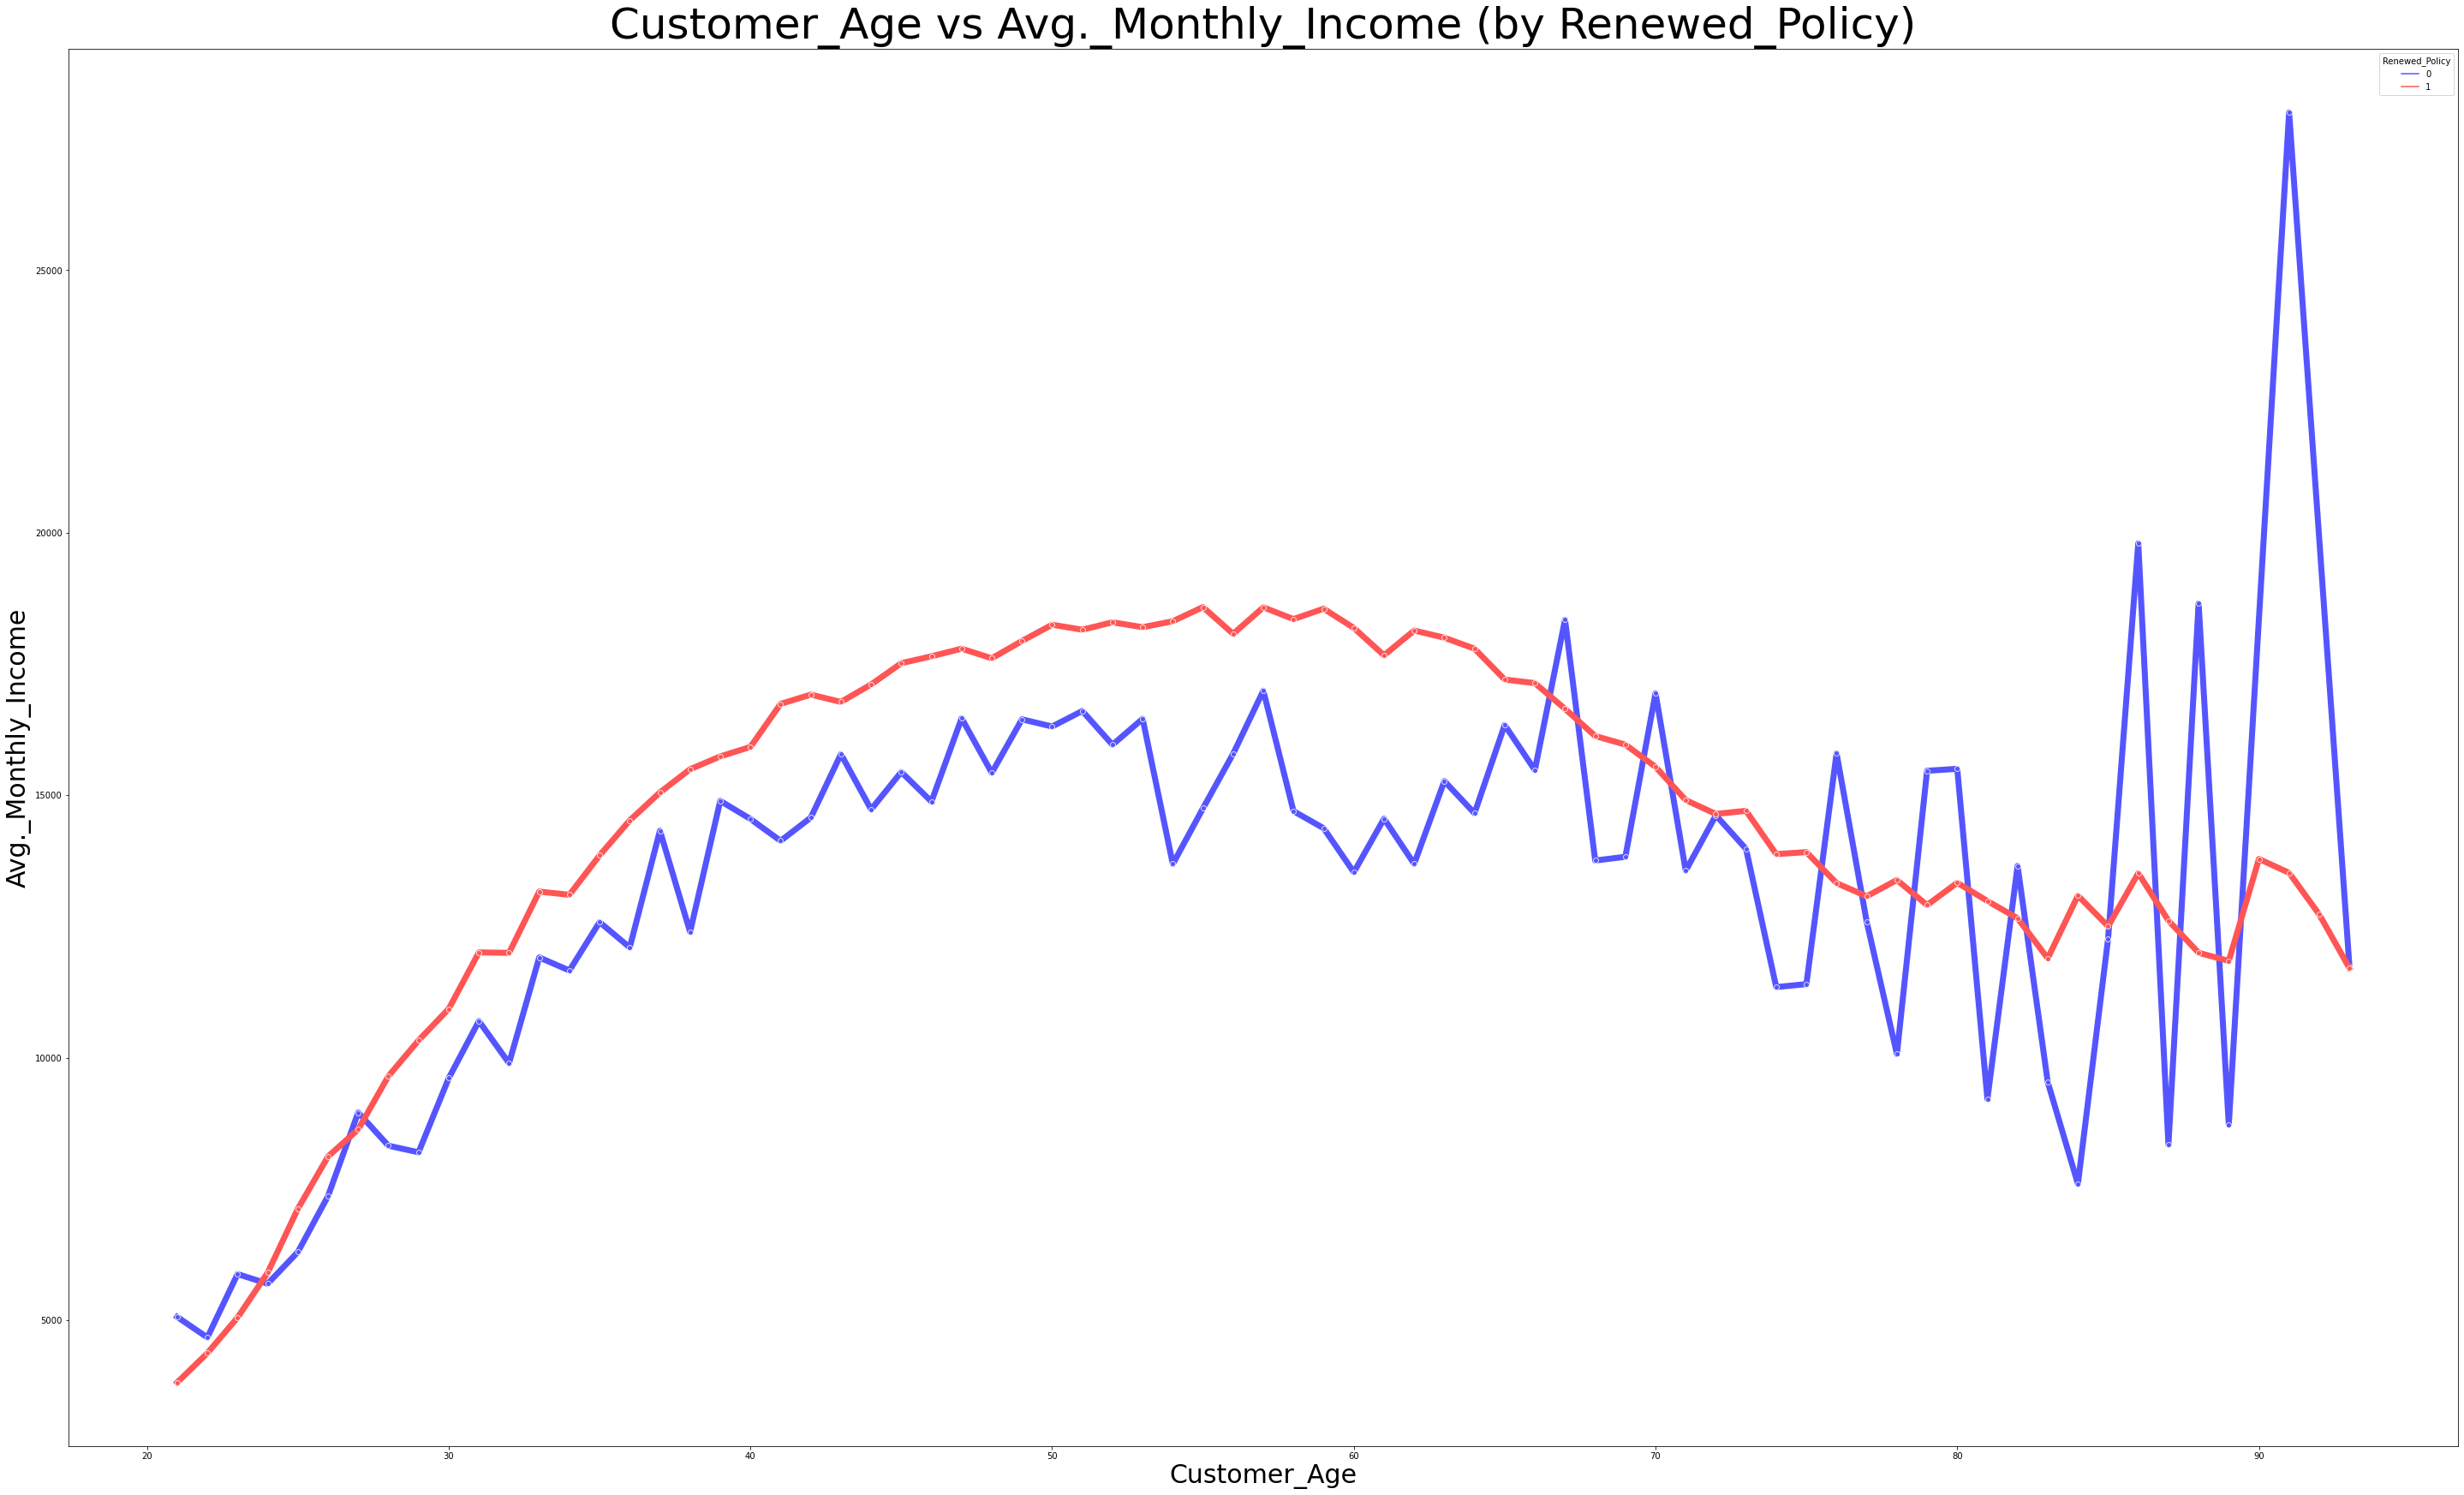

In [61]:
# List features to apply to barplot request below - including DataFrame, y-Axis, and Target (Renewed Policy)

data = df
x_feature = 'Customer_Age'
y_feature = 'Avg._Monthly_Income'
hue = 'Renewed_Policy'

# Plot the chart,setting custom size and using above listed variables for Title and Axes
plt.figure(figsize = (50,30)) 
sns.lineplot(x = data[x_feature], y = data[y_feature], data = data, hue = data[hue],
             ci = None, marker='o', linewidth = 7, palette = 'seismic');

# Apply customer Title, Label names, and Axis limits
plt.title(x_feature + ' vs ' + y_feature + ' (by {})'.format(hue), fontdict = {'fontsize': 50})
plt.ylabel(y_feature, fontdict = {'fontsize' : 30})
plt.xlabel(x_feature, fontdict = {'fontsize' : 30});

- **Average monthly income increases with age, up to a point from around 50 to 60 (where some customers opt to retire or work less)**, before dropping as is somewhat expected when individuals transition out of full-time employment income sources into retirement funding
- There is a large spike in average monthly income, as well as Non-Renewals, for some customers in their mid-80s through mid-90s
    - This could be **indicative of customers cashing out various (final) retirement products and making the decision to opt out of future policy payments** that are deemed unnecessary for covering remaining life expectancy 

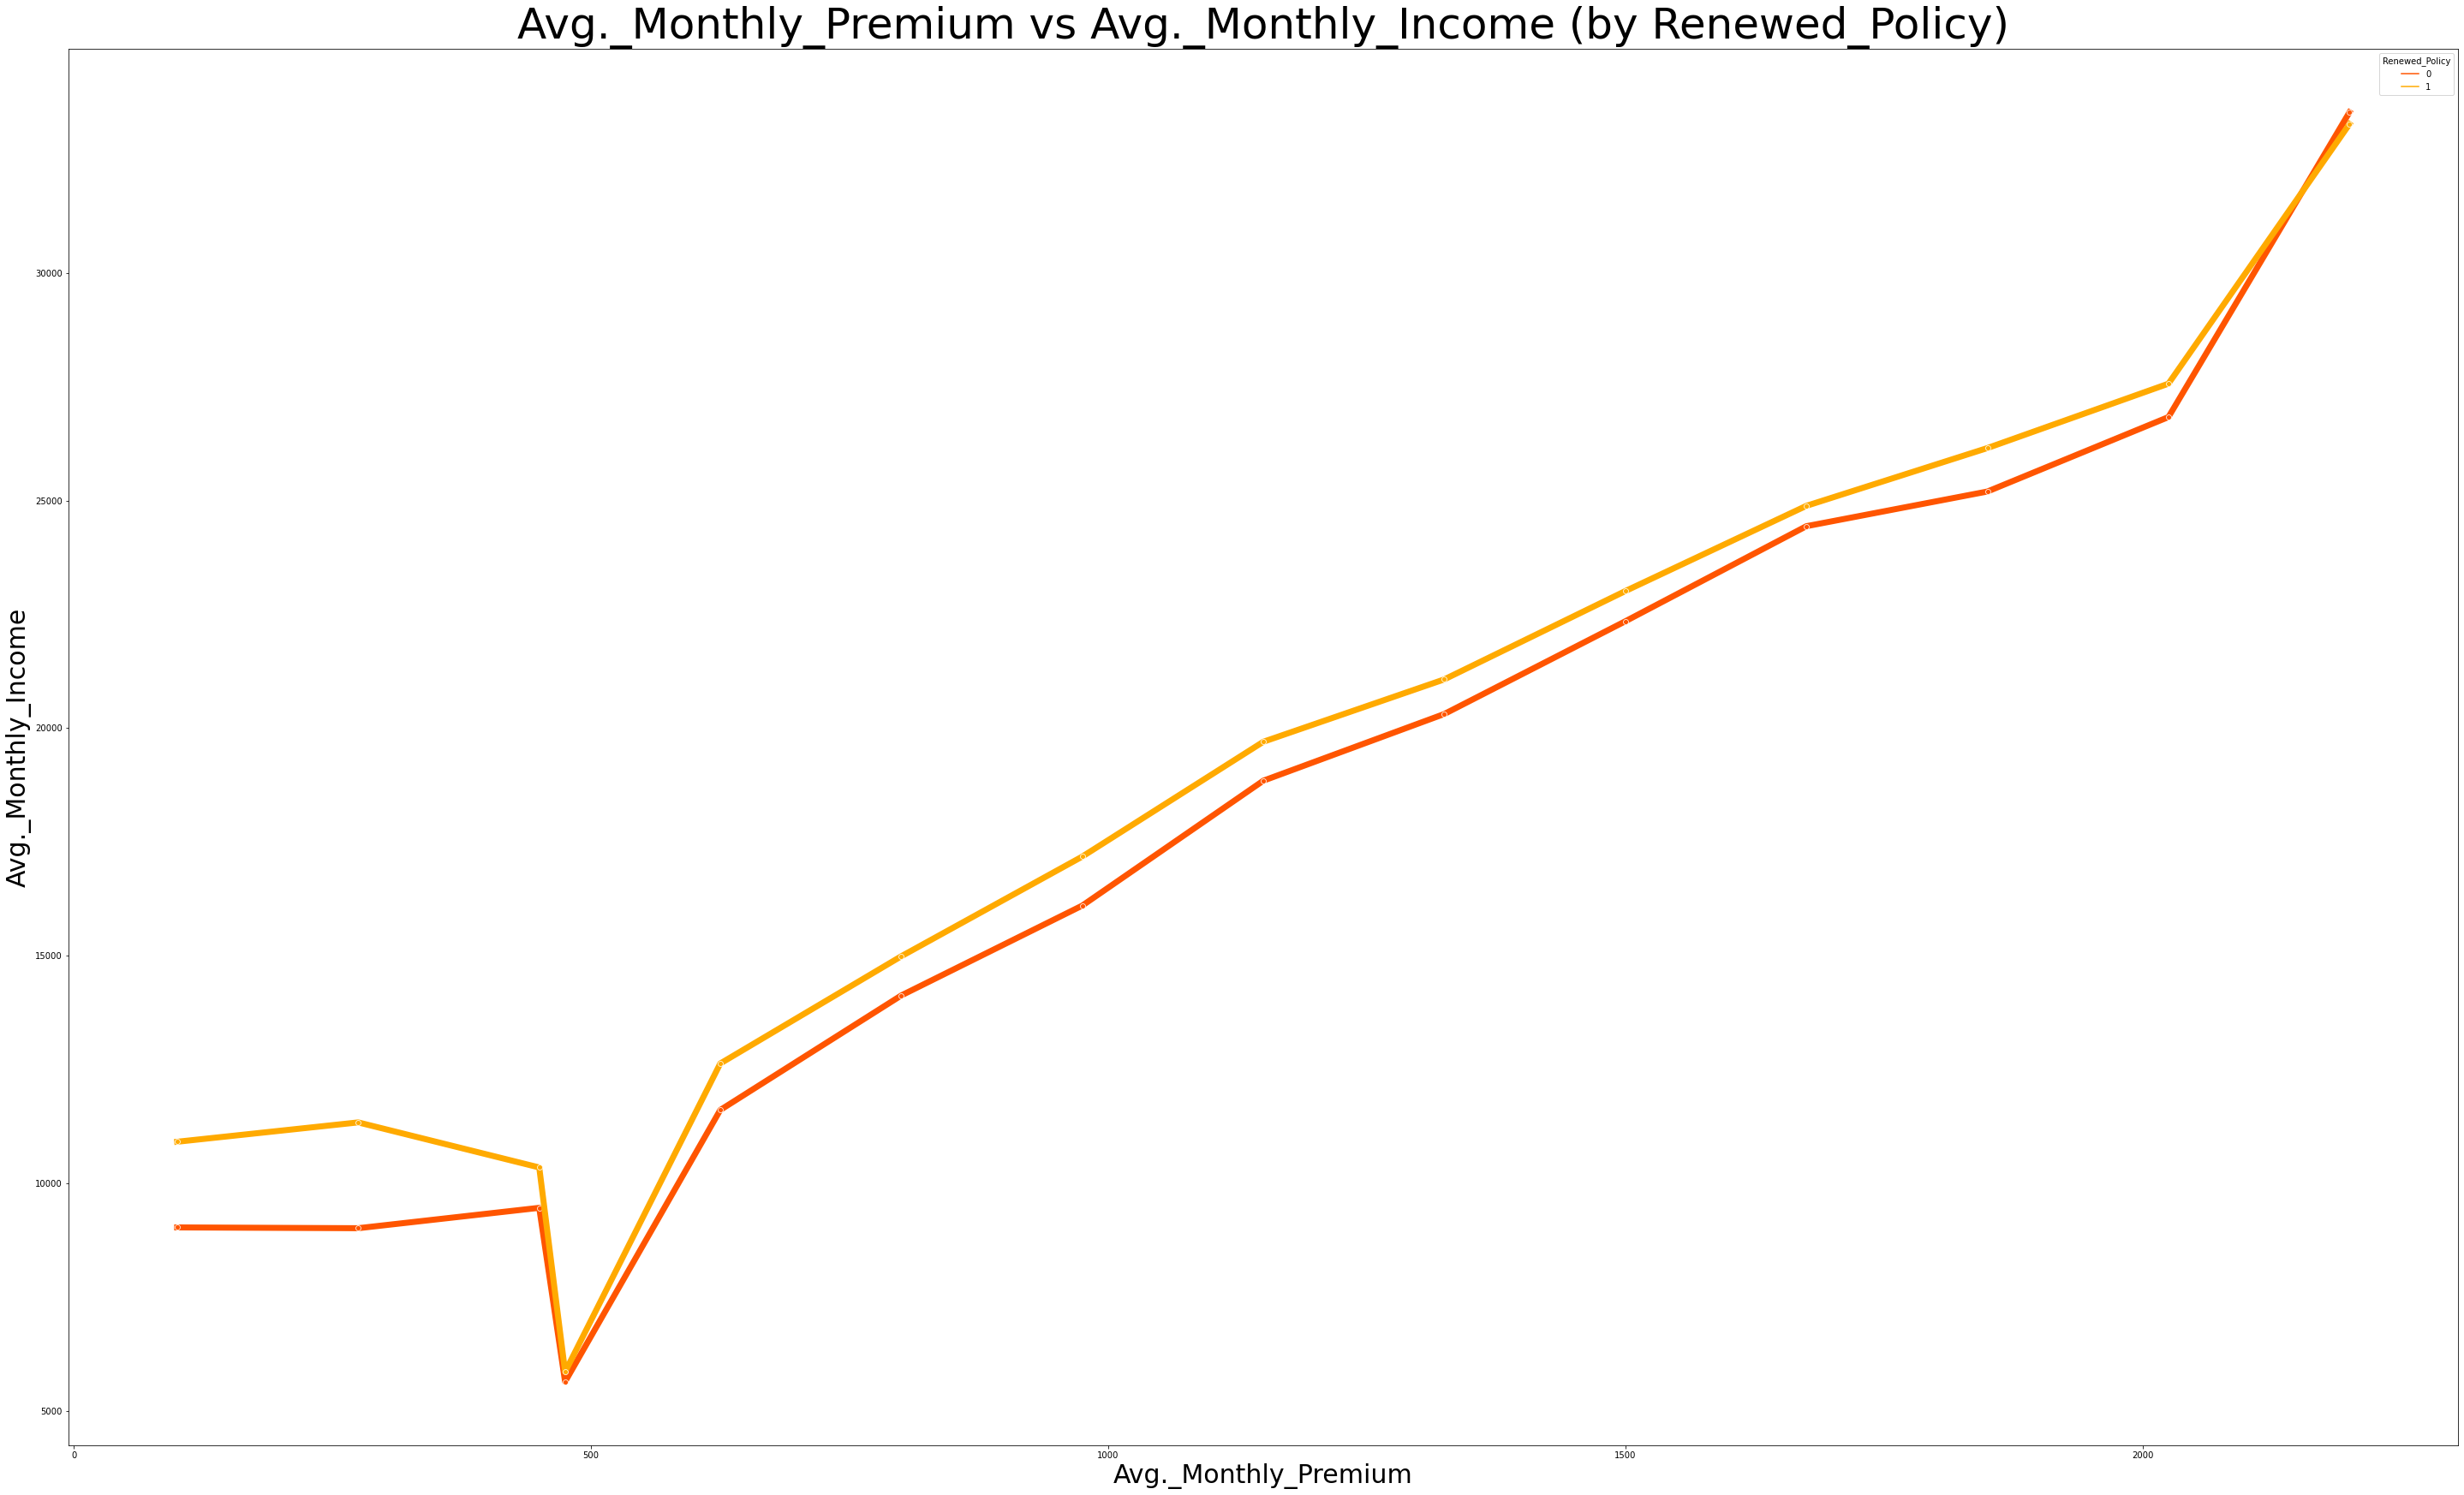

In [62]:
# List features to apply to barplot request below - including DataFrame, y-Axis, and Target (Renewed Policy)

data = df
x_feature = 'Avg._Monthly_Premium'
y_feature = 'Avg._Monthly_Income'
hue = 'Renewed_Policy'

# Plot the chart,setting custom size and using above listed variables for Title and Axes
plt.figure(figsize = (50,30)) 
sns.lineplot(x = data[x_feature], y = data[y_feature], data = data, hue = data[hue],
             ci = None, marker='o', linewidth = 7, palette = 'autumn');

# Apply customer Title, Label names, and Axis limits
plt.title(x_feature + ' vs ' + y_feature + ' (by {})'.format(hue), fontdict = {'fontsize': 50})
plt.ylabel(y_feature, fontdict = {'fontsize' : 30})
plt.xlabel(x_feature, fontdict = {'fontsize' : 30});

- As was expected, the **average monthly premiums paid correlate strongly with respective average monthly incomes, increasing proportionately**
- The gap between renewals/non-renewals appears larger (less proportionate) for customers earning under \\$10k a month and paying under \\$500 a month for their policies

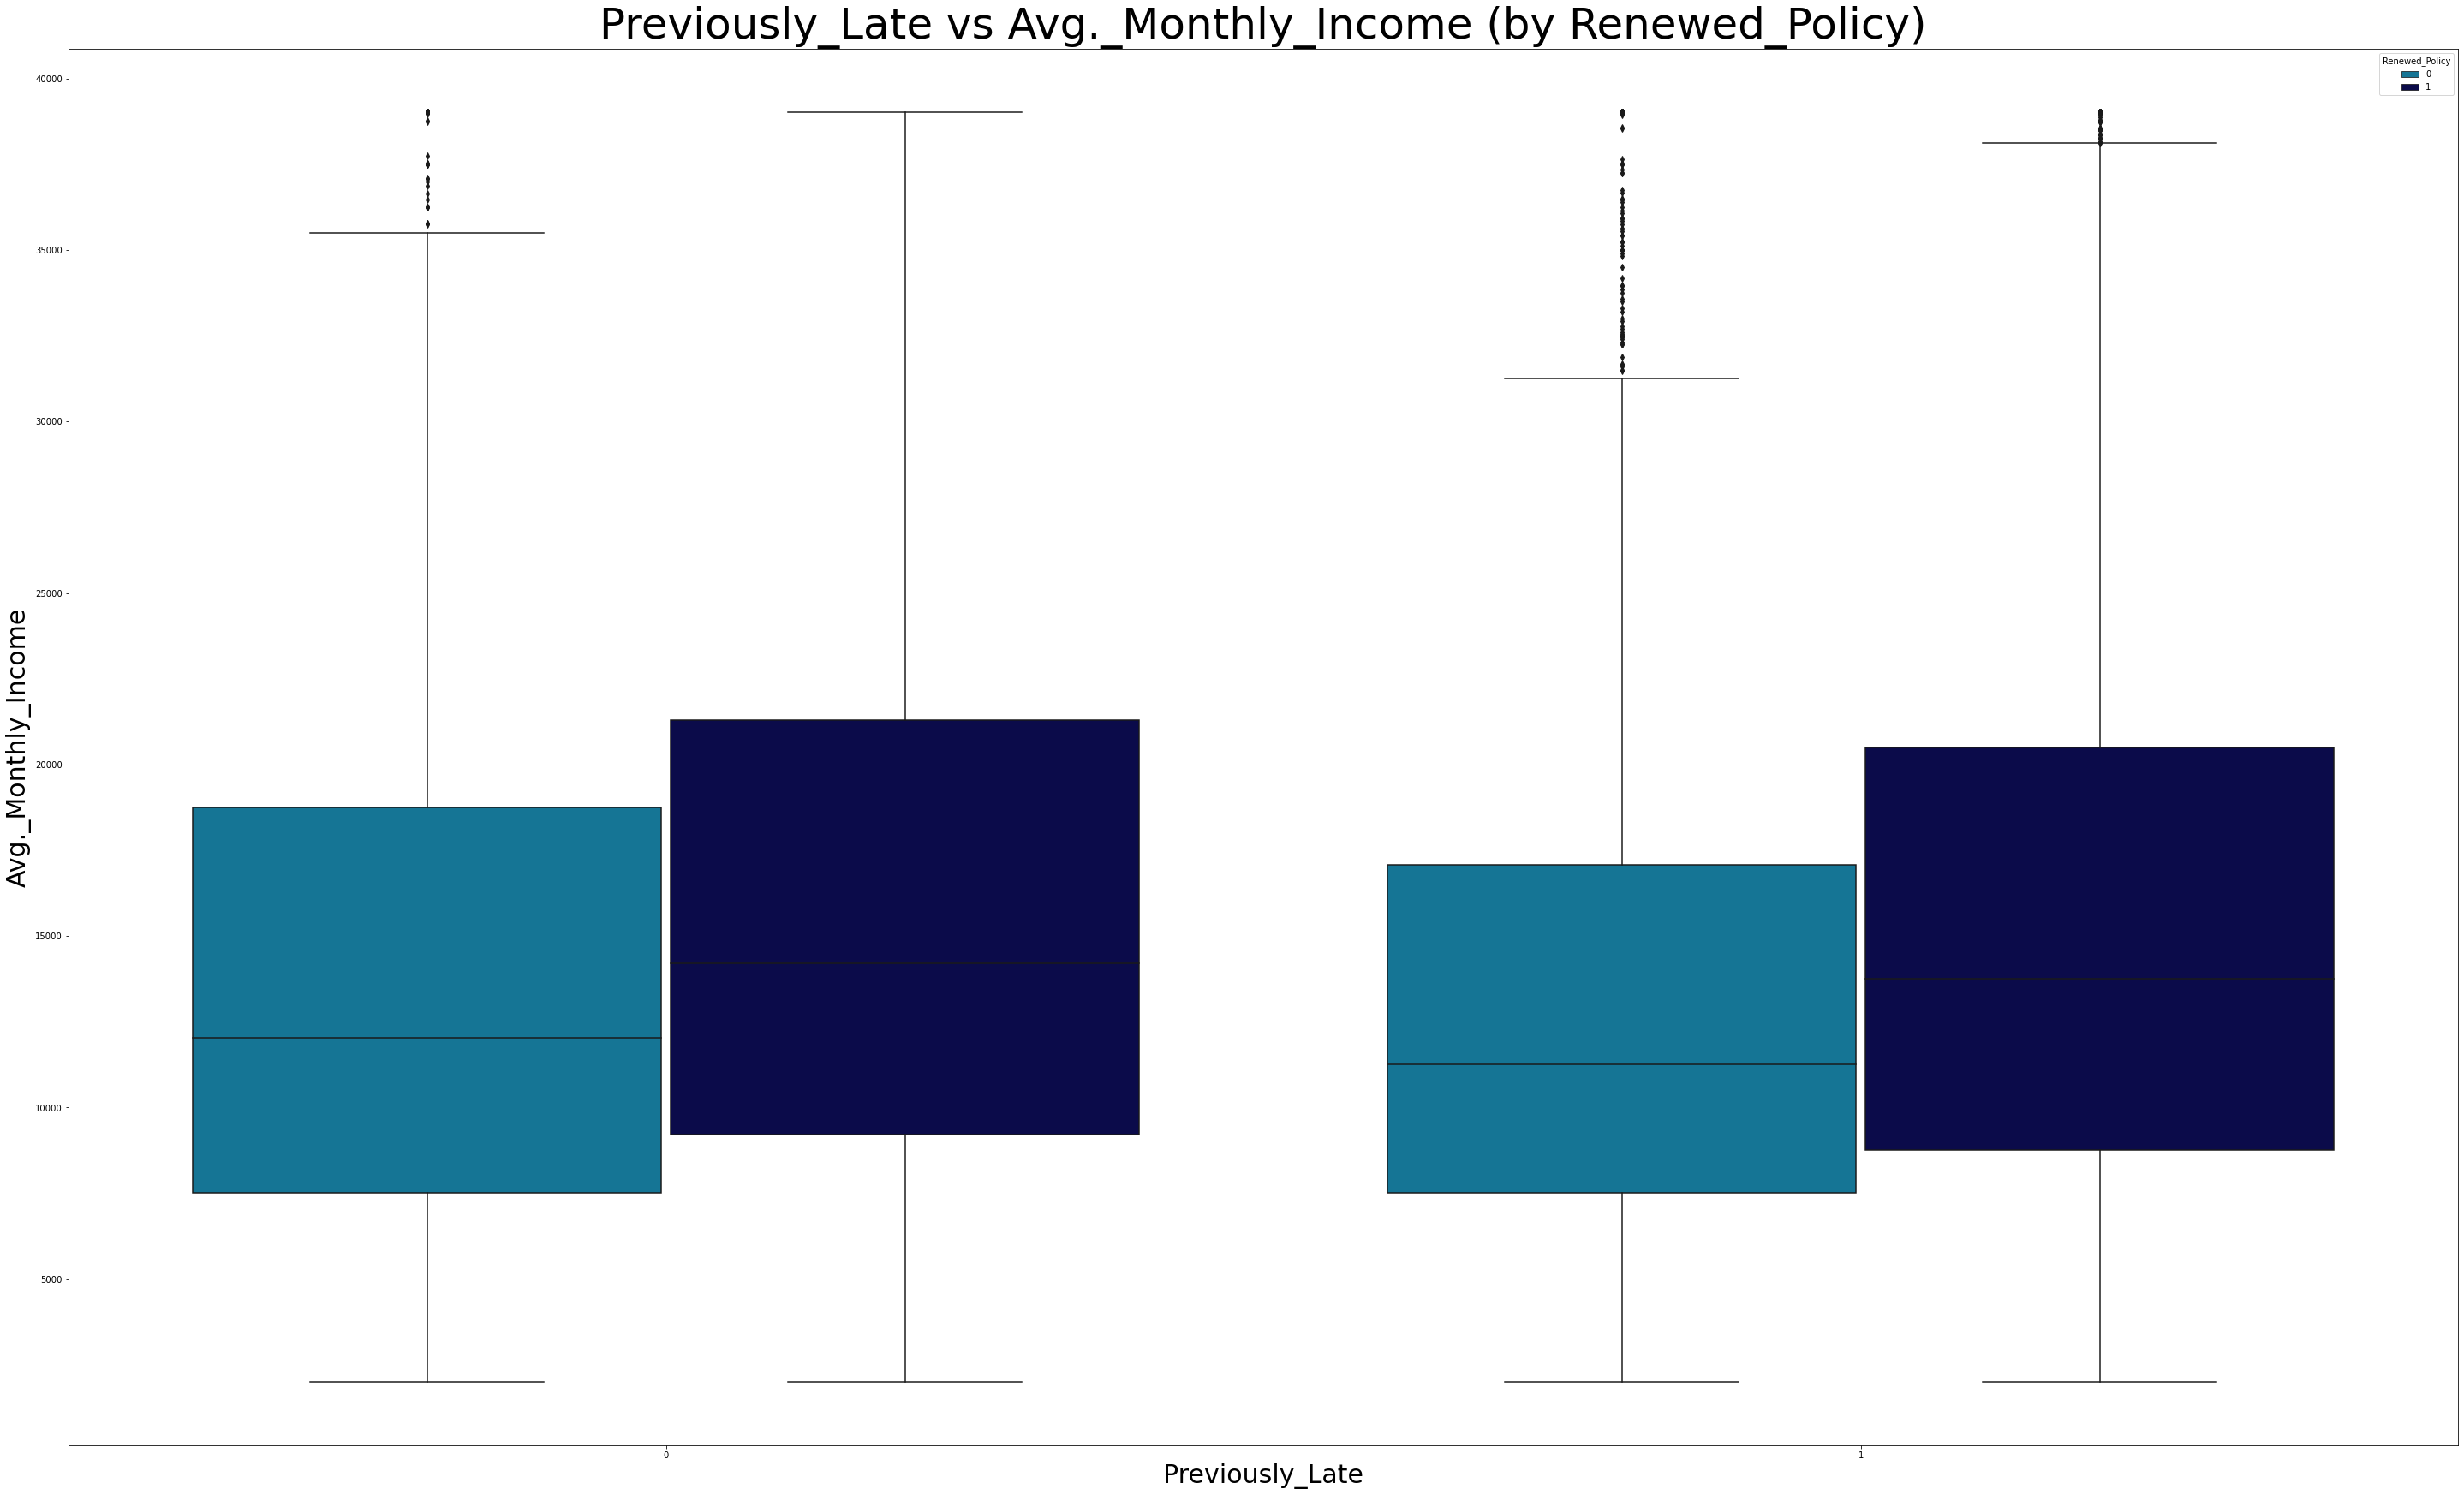

In [63]:
# List features to apply to barplot request below - including DataFrame, y-Axis, and Target (Renewed Policy)

data = df
x_feature = 'Previously_Late'
y_feature = 'Avg._Monthly_Income'
hue = 'Renewed_Policy'

# Plot the chart,setting custom size and using above listed variables for Title and Axes
plt.figure(figsize = (50,30)) 
sns.boxplot(x = data[x_feature], y = data[y_feature], data = data, hue = data[hue],
             palette = 'ocean_r');

# Apply customer Title, Label names, and Axis limits
plt.title(x_feature + ' vs ' + y_feature + ' (by {})'.format(hue), fontdict = {'fontsize': 50})
plt.ylabel(y_feature, fontdict = {'fontsize' : 30})
plt.xlabel(x_feature, fontdict = {'fontsize' : 30});

In [64]:
# Calculate % of Renewals/non_renewals related to customers who were not previously late on their accounts
round(df['Renewed_Policy'][df['Previously_Late'] == 0].value_counts()/df['Renewed_Policy'][df['Previously_Late'] == 0].count(),2)

1    0.97
0    0.03
Name: Renewed_Policy, dtype: float64

In [65]:
# Calculate % of Renewals/non_renewals related to customers who were previously late on their accounts
round(df['Renewed_Policy'][df['Previously_Late'] == 1].value_counts()/df['Renewed_Policy'][df['Previously_Late'] == 1].count(),2)

1    0.81
0    0.19
Name: Renewed_Policy, dtype: float64

- Customers previously late on their accounts show a nearly 20% chance of non-renewal, **whereas those customers never previously late only show a 3% chance of non-renewal**

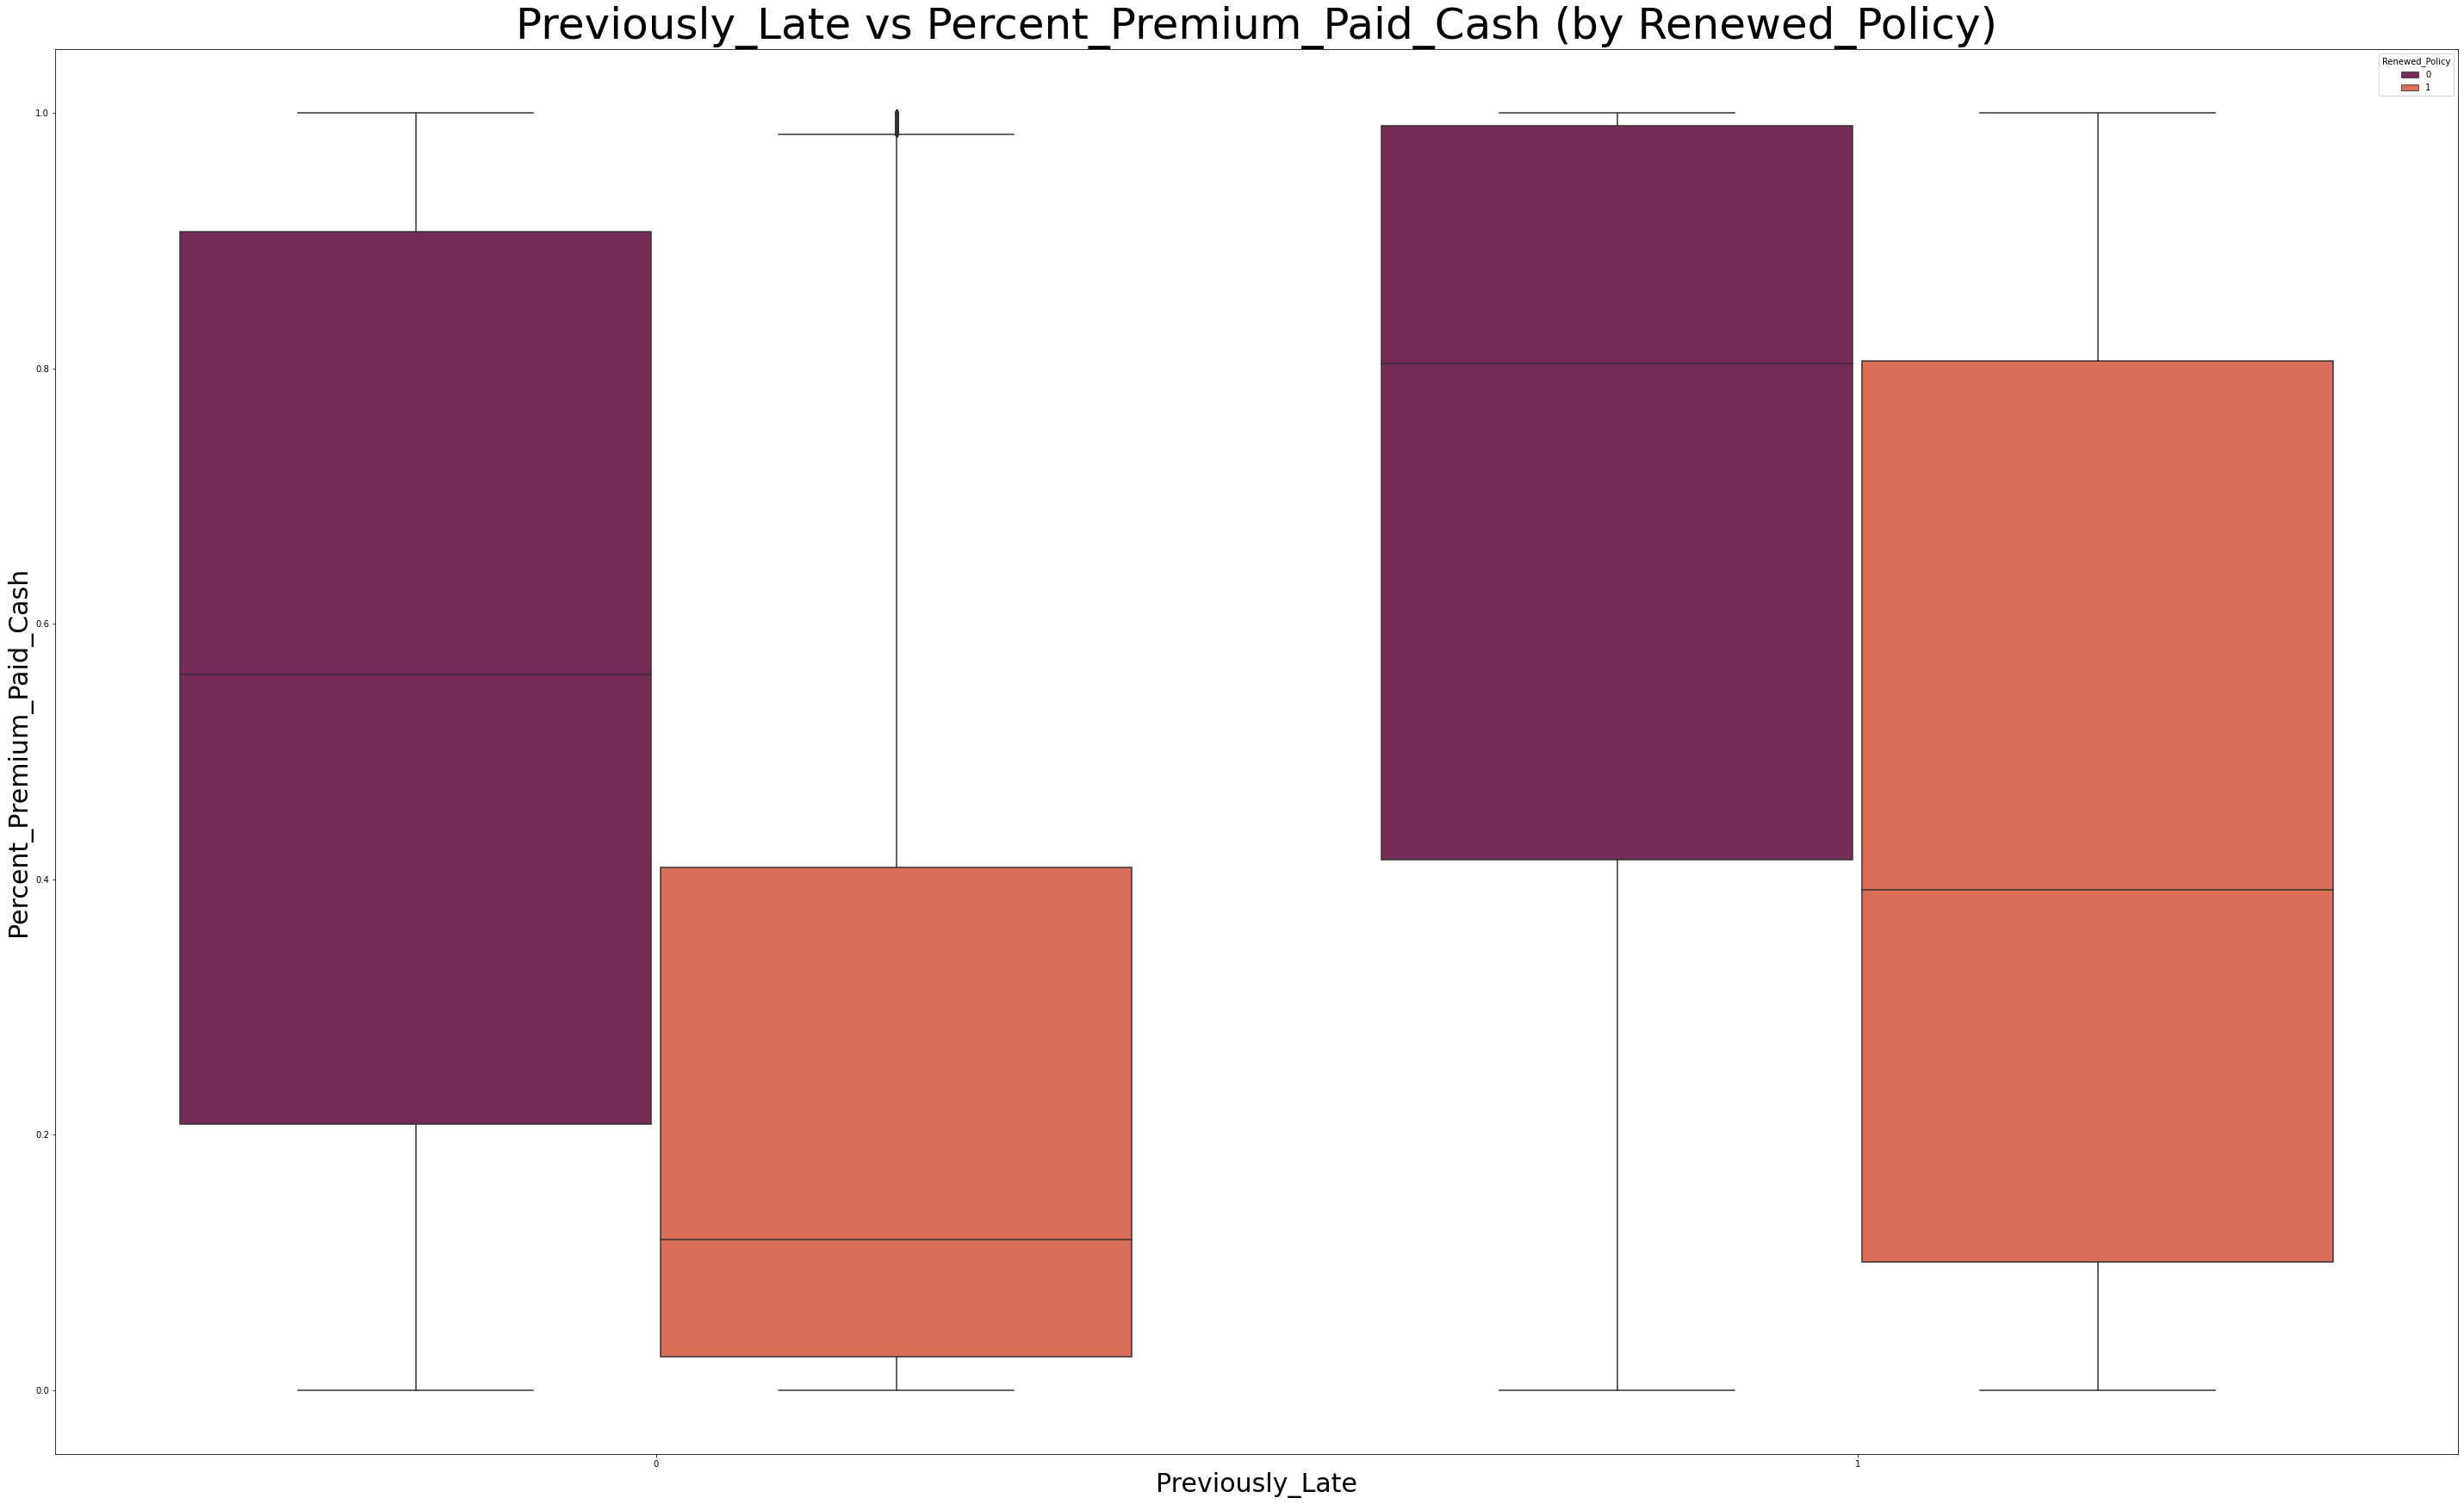

In [66]:
# List features to apply to barplot request below - including DataFrame, y-Axis, and Target (Renewed Policy)

data = df
x_feature = 'Previously_Late'
y_feature = 'Percent_Premium_Paid_Cash'
hue = 'Renewed_Policy'

# Plot the chart,setting custom size and using above listed variables for Title and Axes
plt.figure(figsize = (50,30)) 
sns.boxplot(x = data[x_feature], y = data[y_feature], data = data, hue = data[hue],
             palette = 'rocket');

# Apply customer Title, Label names, and Axis limits
plt.title(x_feature + ' vs ' + y_feature + ' (by {})'.format(hue), fontdict = {'fontsize': 50})
plt.ylabel(y_feature, fontdict = {'fontsize' : 30})
plt.xlabel(x_feature, fontdict = {'fontsize' : 30});

- In general, customers that have **paid higher portions of their policy with cash as opposed to credit, are far more likely** to have been, or will be, late on their accounts, as well as potentially defaulting (non-renewing) their policies
    - Similarly, customers who have never previously been late on their account, and have paid less of their current policy with cash, are the most secure and least likely to default or non-renew in the future

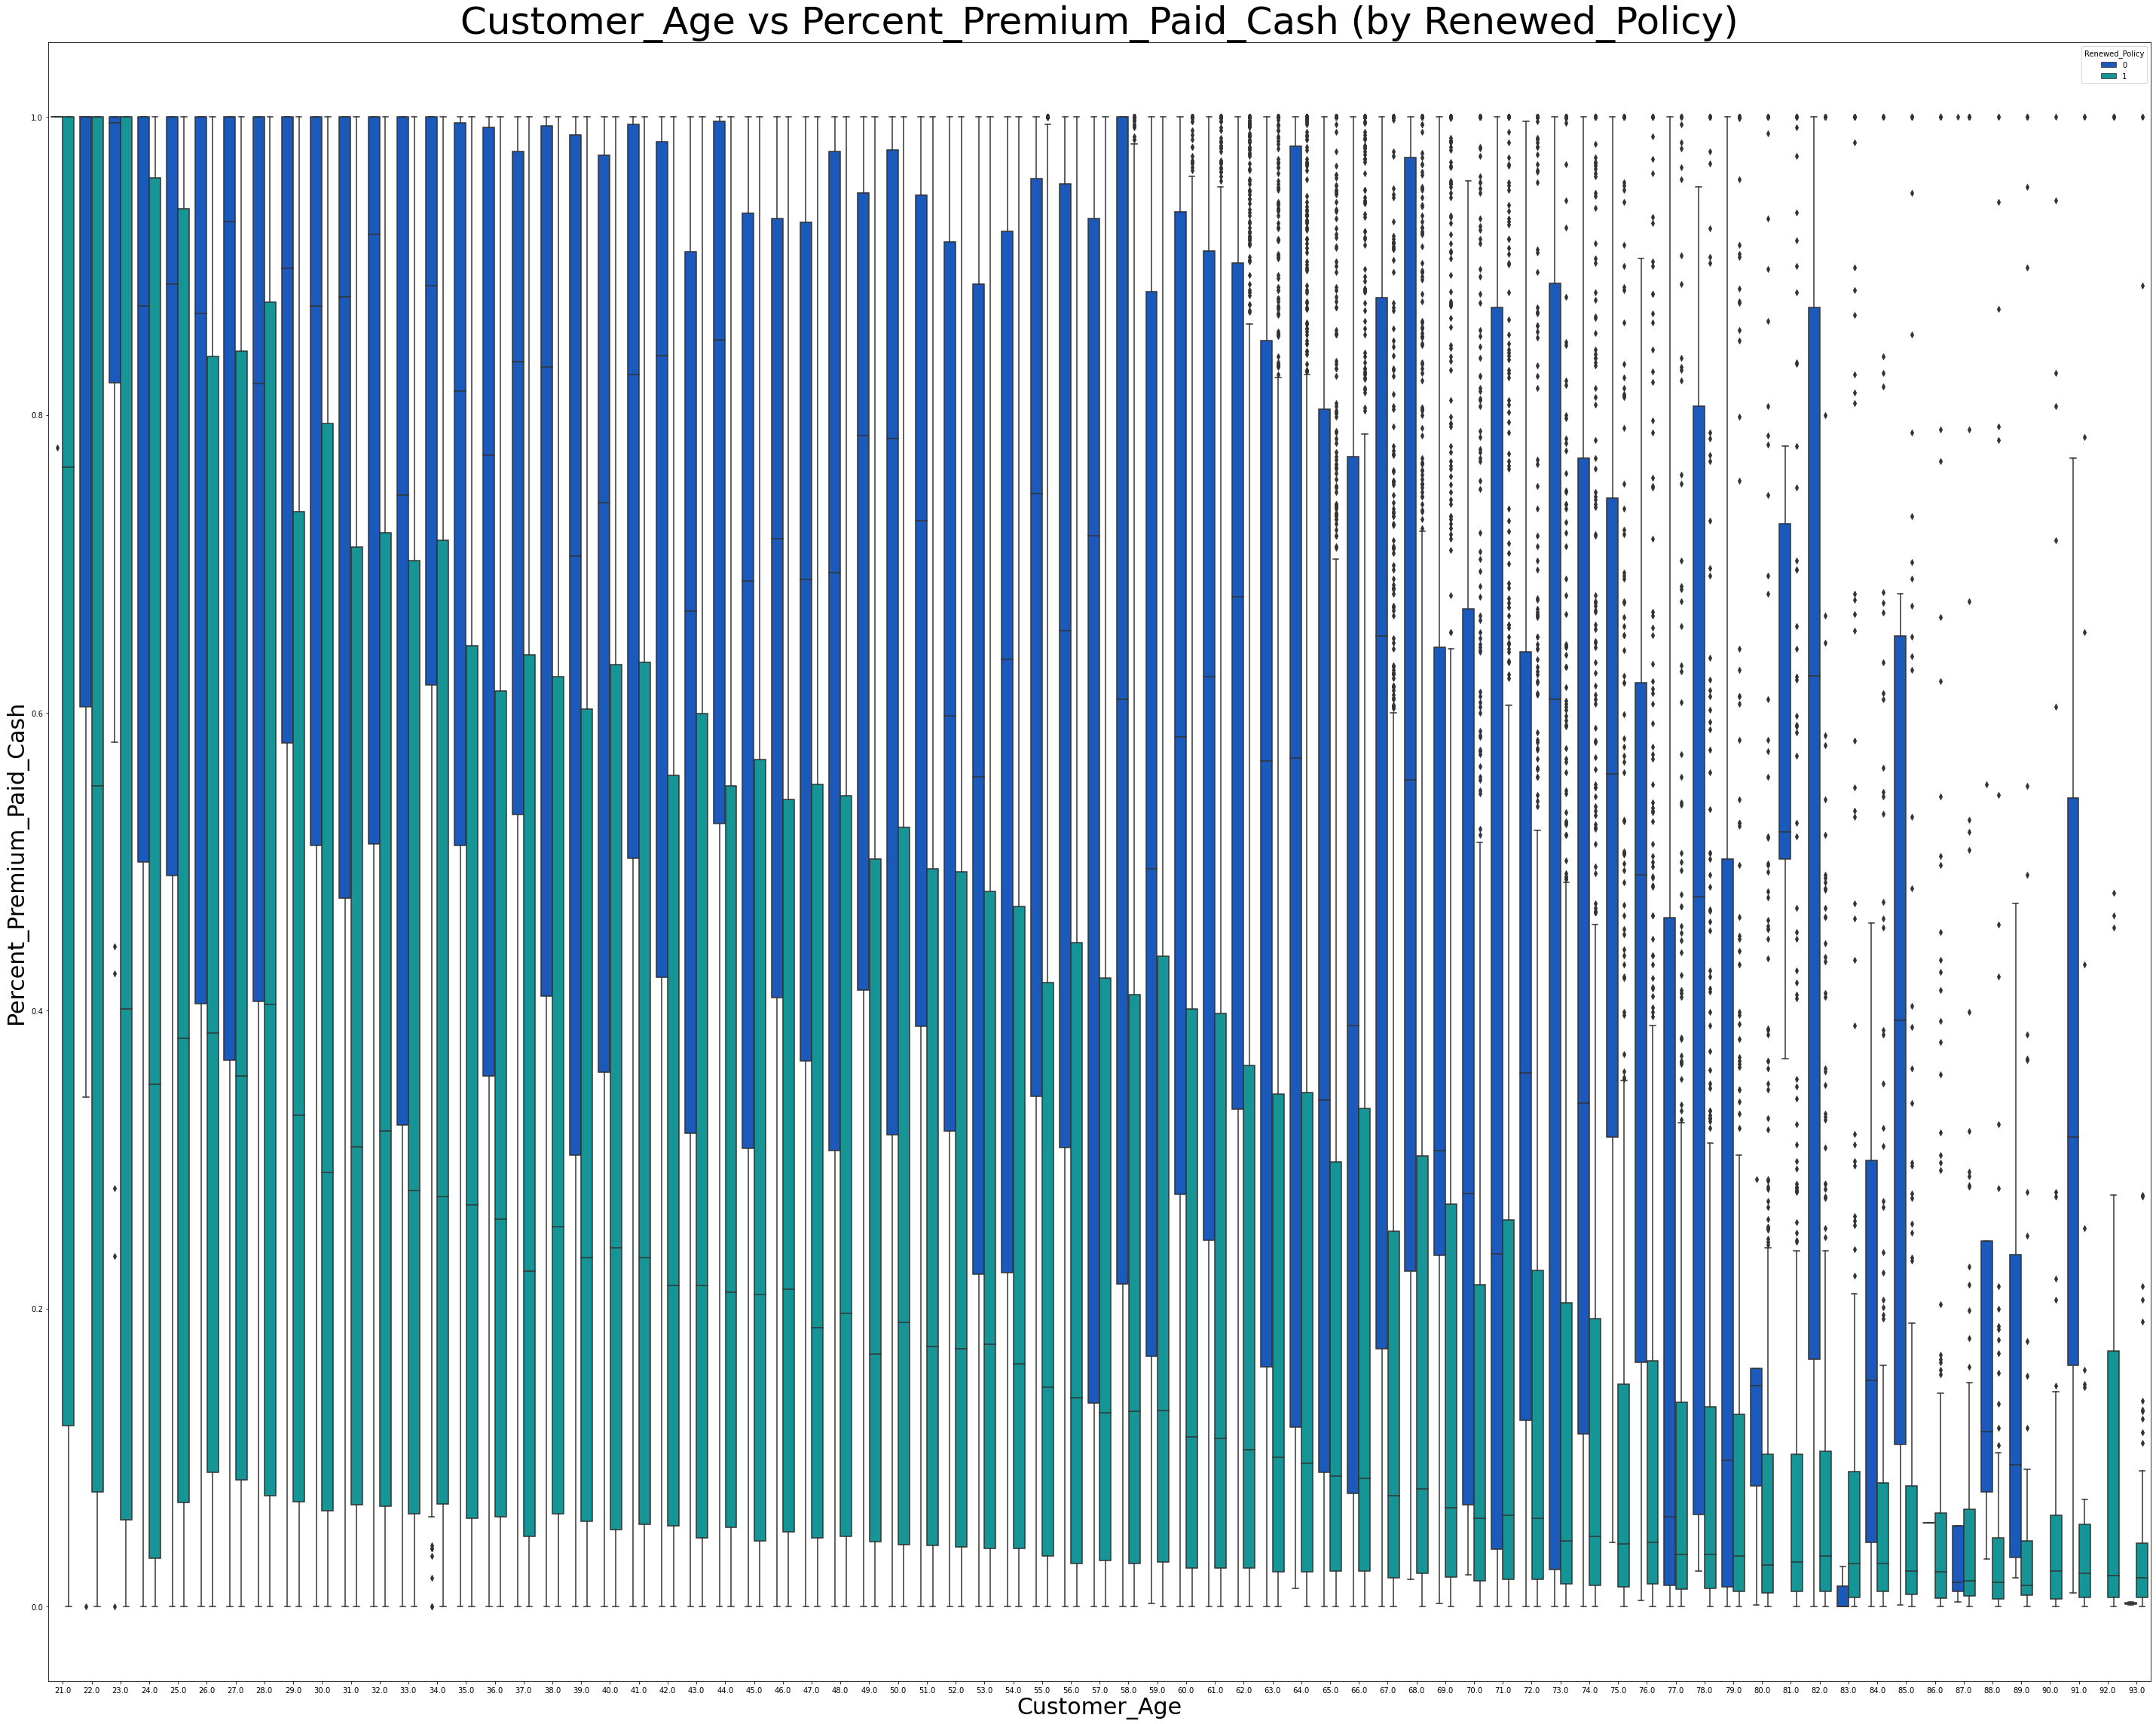

In [67]:
# List features to apply to barplot request below - including DataFrame, y-Axis, and Target (Renewed Policy)

data = df
x_feature = 'Customer_Age'
y_feature = 'Percent_Premium_Paid_Cash'
hue = 'Renewed_Policy'

# Plot the chart,setting custom size and using above listed variables for Title and Axes
plt.figure(figsize = (50,40)) 
sns.boxplot(x = data[x_feature], y = data[y_feature], data = data, hue = data[hue],
             palette = 'winter');

# Apply customer Title, Label names, and Axis limits
plt.title(x_feature + ' vs ' + y_feature + ' (by {})'.format(hue), fontdict = {'fontsize': 50})
plt.ylabel(y_feature, fontdict = {'fontsize' : 30})
plt.xlabel(x_feature, fontdict = {'fontsize' : 30});

- The ratio of Non-Renewal to Renewal risk is, on average, substantially lower for younger customers, regardless of the amount of premium paid for by cash vs. credit
    - Conversely, **as customers age, the ratio shifts toward substantially higher likelihood of non-renewal proportionately** which could be due to death of much older customers and/or cashing out on personal investments to fund remaining years in lieu of continued premium payments

## Building Classification Model/s

### Train/Validation/Test Splits

**The Customer ID column will not be dropped**, as it offers a unique identify for each customer sampled.
Instead, we have **set it to the index of the X dataframe (not counted as a column)** and will be easy converted back to a column (reset) when needed for identifying specific customers in the predicted results dataset.

In [68]:
# Split the data between X (independent variables) and Y (Target/dependent variable)

# Create X dataset by dropping Y from DataFrame (df)

X = df.drop(columns = ['Renewed_Policy'], axis = 1) # Additionally drop Renewd Policy (categorical) column not needed
y = df['Renewed_Policy']

# Print Summary of X and Y to confirm splits as intended
print('DataFrame:',df.shape)
print('X Shape:',X.shape)
print('y Shape:',y.shape)

# Set id column to index (remove from DF column count)

X = X.set_index('id')
print('')
print('X Shape: ID Temporarily Removed',X.shape)

DataFrame: (79853, 16)
X Shape: (79853, 15)
y Shape: (79853,)

X Shape: ID Temporarily Removed (79853, 14)


In [69]:
# To keep Test set separate and avoid Data Leakage until final testing, use 2 sets and y_Val for initial testing

# First split the data into Temp and Test, using test size of .20, random state kept at 1, and stratify to copy y proportions
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size = .20, random_state = 1, stratify = y) 

# Second split the data into  Train and Validation (Val) using test size of .25 and stratify to copy y_temp proportions
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size = .25, random_state = 1, stratify = y_temp)

# Print overall summary of rows/columns for X datasets
print(X_train.shape, X_val.shape, X_test.shape)

print('') # Print a line break

# Print row summary for DataFrame and all data splits
print('Number of rows in DataFrame:', df.shape[0])
print('')
print('Number of rows in X:', X.shape[0])
print('Number of rows in X_train:', X_train.shape[0])
print('Number of rows in X_temp:', X_temp.shape[0])
print('Number of rows in X_val:', X_val.shape[0])
print('Number of rows in X_test:', X_test.shape[0])
print('')
print('Number of rows in Target - DataFrame:', df['Renewed_Policy'].shape[0])
print('')
print('Number of rows in y:', y.shape[0])
print('Number of rows in y_train:', y_train.shape[0])
print('Number of rows in y_temp:', y_temp.shape[0])
print('Number of rows in y_val:', y_val.shape[0])
print('Number of rows in y_test:', y_test.shape[0])

(47911, 14) (15971, 14) (15971, 14)

Number of rows in DataFrame: 79853

Number of rows in X: 79853
Number of rows in X_train: 47911
Number of rows in X_temp: 63882
Number of rows in X_val: 15971
Number of rows in X_test: 15971

Number of rows in Target - DataFrame: 79853

Number of rows in y: 79853
Number of rows in y_train: 47911
Number of rows in y_temp: 63882
Number of rows in y_val: 15971
Number of rows in y_test: 15971


The above splits work out as follows:
- X_train = **75% of X_temp** (which is taken as 80% of X)
- X_val = **25% of X_temp** (which is taken as 80% of X)
- X_test = **20% of X** (the remaining rows fall under X_temp)

- y_train = **75% of y_temp** (which is taken as 80% of y)
- y_val = **25% of y_temp** (which is taken as 80% of y)
- y_test = **20% of y** (the remaining rows fall under y_temp)

In [70]:
# Final check for no null/missing values - no need for imputer for values, etc.

print('X_train Nulls:\n')
print(X_train.isnull().sum())

print('.'*80) # Print line spacer for easier sections
print('') # Print a line break

print('X_val Nulls:\n')
print(X_val.isnull().sum())

print('.'*80) # Print line spacer for easier sections
print('') # Print a line break

print('X_test Nulls:\n')
print(X_test.isnull().sum())

X_train Nulls:

Percent_Premium_Paid_Cash    0
Customer_Age                 0
Marital_Status               0
Vehicle_Owned                0
Number_of_Dependents         0
Accommodation                0
Risk_Score                   0
Number_of_Premiums_Paid      0
Sourcing_Channel             0
Residence_Area_Type          0
Previously_Late              0
Avg._Monthly_Premium         0
Avg._Monthly_Income          0
Income/Premium               0
dtype: int64
................................................................................

X_val Nulls:

Percent_Premium_Paid_Cash    0
Customer_Age                 0
Marital_Status               0
Vehicle_Owned                0
Number_of_Dependents         0
Accommodation                0
Risk_Score                   0
Number_of_Premiums_Paid      0
Sourcing_Channel             0
Residence_Area_Type          0
Previously_Late              0
Avg._Monthly_Premium         0
Avg._Monthly_Income          0
Income/Premium               0
dtype: 

In [71]:
# Final check for NAs/NaNs - no need for imputer for values, etc.

print('X_train NAs:\n')
print(X_train.isna().sum())

print('.'*80) # Print line spacer for easier sections
print('') # Print a line break

print('X_val NAs:\n')
print(X_val.isna().sum())

print('.'*80) # Print line spacer for easier sections
print('') # Print a line break

print('X_test NAs:\n')
print(X_test.isna().sum())

X_train NAs:

Percent_Premium_Paid_Cash    0
Customer_Age                 0
Marital_Status               0
Vehicle_Owned                0
Number_of_Dependents         0
Accommodation                0
Risk_Score                   0
Number_of_Premiums_Paid      0
Sourcing_Channel             0
Residence_Area_Type          0
Previously_Late              0
Avg._Monthly_Premium         0
Avg._Monthly_Income          0
Income/Premium               0
dtype: int64
................................................................................

X_val NAs:

Percent_Premium_Paid_Cash    0
Customer_Age                 0
Marital_Status               0
Vehicle_Owned                0
Number_of_Dependents         0
Accommodation                0
Risk_Score                   0
Number_of_Premiums_Paid      0
Sourcing_Channel             0
Residence_Area_Type          0
Previously_Late              0
Avg._Monthly_Premium         0
Avg._Monthly_Income          0
Income/Premium               0
dtype: int6

**No Nulls or NAs/NaNs found in any of the data splits** - Classification model building may proceed

### Converting Remaining Categories to Numerical

We can manually **rename the ordinal Sourcing Channel attributes as numeric** and then use the **Pandas 'Get Dummies'** feature to **convert categorical attributes of the Residence Area Type variable to numeric/binary as 1 for true value and 0** for no value.  

Additionally, we can drop the first column which is essentially redundant when converting to 1/0 for True or False.

#### Label Encoding Sourcing Channel

In [72]:
Sourcing_Channel = {'A':0,
                  'B':1,
                  'C':2,
                  'D':3,
                  'E':4
                   }

# Reassign/Map above dictionary to respective DataFrame field - Sourcing Channel
X_train['Sourcing_Channel'] = X_train['Sourcing_Channel'].map(Sourcing_Channel)
X_val['Sourcing_Channel'] = X_val['Sourcing_Channel'].map(Sourcing_Channel)
X_test['Sourcing_Channel'] = X_test['Sourcing_Channel'].map(Sourcing_Channel)

# Convert datatype from Categorical to Numeric 
X_train['Sourcing_Channel'] = pd.to_numeric(X_train['Sourcing_Channel'])
X_val['Sourcing_Channel'] = pd.to_numeric(X_val['Sourcing_Channel'])
X_test['Sourcing_Channel'] = pd.to_numeric(X_test['Sourcing_Channel'])

#### One-Hot Encoding Residence Area Type

In [73]:
# One-Hot Encode all 3 X_data sets for variable: Residence_Area_Type

X_train = pd.get_dummies(X_train, columns = ['Residence_Area_Type'], drop_first = True) # Drop first column to avoid doublecount
X_val = pd.get_dummies(X_val, columns = ['Residence_Area_Type'], drop_first = True) # Drop first column to avoid doublecount
X_test = pd.get_dummies(X_test, columns = ['Residence_Area_Type'], drop_first = True) # Drop first column to avoid doublecount

# Print overall summary of rows/columns for X datasets
print(X_train.shape, X_val.shape, X_test.shape)

print('') # Print a line break

# Print row summary for DataFrame and all data splits
print('Number of rows in DataFrame:', df.shape[0])
print('Number of rows in X_train:', X_train.shape[0])
print('Number of rows in X_val:', X_val.shape[0])
print('Number of rows in X_test:', X_test.shape[0])

(47911, 14) (15971, 14) (15971, 14)

Number of rows in DataFrame: 79853
Number of rows in X_train: 47911
Number of rows in X_val: 15971
Number of rows in X_test: 15971


**Overall, no change to data (column) shape** due to dropping the first column of One-Hot Encoded Residence_Area_Type column (+ 2 columns for each new value - Drop First option = 1 column/no change to data shape).

In [ ]:
X_train['Residence_Area_Type_Urban']

##  Building the model: Evaluating Model Results

In addition to the overall model accuracy score (% correct vs. incorrect), it is also important to consider the following score metrics for the Classification model:

Without reversing the target classes (majority = Renew/1), the model will predict based on likelihood of renewal vs. non-renewal, using the following metrics:

- **Precision:** How many of the customers predicted to renew their policies actually did?
    - True Positives / (True Positive + False Positives)
    
- **Recall (Sensitivity):** Of all the customers that renew their policies, how many did the model predict would?
    - True Positive / (True Positives + False Negatives) 
    
- **F1-Score (Harmonic Mean of Precision & Recall/Sensitivity):** What is the Harmonic Mean split between the Precision and Recall results? 
    - 2 * (Recall * Precision) / (Recall + Precision)
    
- **Specificity:** Of all the customers that did not renew their premiums, how many did the model predict wouldn't?
    - True Negative / True Negatives + False Positives 


### Reducing Loss and Accounting for Imbalanced Data: Specificity
- Due to the fact that the company isn't as much focused on predicting for positive cases (Renewals) but rather accounting for all possible negative cases (Non-Renewals), **Specificity will be the score to optimize for from a predictive modelling standpoint**
    - However, Recall and Precision are also important for further inspection and analysis (particularly during Confusion Matrix summarization)
        - **Recall is also important in identifying and limiting customers predicted not to renew that actually end up renewing**, as this can cost the company wasted time, resources, and opportunity costs, in addressing non-risk clients over those truly at risk of default
        - It is good to ensure that the model is still performing high on Precision and correctly predicting the maximum amount of customers expected to renew their policies, likely to be well above 90% due to data imbalance (94% of data included renewals) 

## Building the Pipeline - (Upsampling/Scaling/Classification)

### Need for Over/UnderSampling Data (Random Over/Under Sampler & SMOTE)
Due to the extreme imbalance between the classes of data (0: 6%, 1: 94%), it is necessary to add sampling techniques to upsample the minority class to equal the majority class within all datasets (Train/Validation/Test).
- Random Over Sampler tends to overfit the dataset for Training data, and if found to be substantially overfit should be replaced by Synthetic Minority Oversamping Technique (SMOTE), which uses the KNN algorithm to create synthetic training examples that increase variety within the dataset
- Due to the imbalanced dataset, the minority class will not be equally balanced to 50/50, which is highly unrealistic, but rather increased to a 20/80 split
    - This ratio can be adjusted after further threshold (ROC AUC Curve) testing

### Need for Scaling
Although the majority of outliers were addressed and capped back to their respective Lower/Upper bounds plus 1.5x the IQR, **it is not sufficient in dealing with variances between unit metrics within the dataset (e.g. Risk Score = %, Income/Premium = $**, etc.).  As a result, we need to further scale the data utilizing various methodologies including:
- **Standard Scaler:** Features scaled down to their respective Means and number of Standard Deviations from the Mean
- **MinMax Scaler:** Features are converted to a range of 0 to 1, based on the respective attribute's ratio of min/max as a percentage)

### Use a Pipeline for All Steps (Simultaneously)
By simultaneously running the OverSampling steps with the scaling process, then running various Cross Validation and scoring procedures, the variances between each CV fold's results will be less and the model more generalized and consistent.  Pipelines also make for cleaner and more reliable processing of multiple model steps, applied across various models.

### Build a Pipeline for Primary Classification Models

#### Upsample Training Data
A pipeline for sampling the Training dataset will be constructed, consisting of SMOTE upsampling the minority class to 50% of the majority class.

In [74]:
# 50% minority class upsampling

pipe_sampling = pipe1(steps = [
                        ('upsample_SMOTE', SMOTE(random_state = 1, sampling_strategy = 0.5, k_neighbors = 10, n_jobs = -1)), 
                        ])

X_train_samp, y_train_samp = pipe_sampling.fit_resample(X_train, y_train)

In [75]:
# Print summary splits for each target dataset
print('Target Split - y: \n{}'.format(round(y.value_counts()/y.count(),2)))
print('')
print('Target Split - y_train: \n{}'.format(round(y_train.value_counts()/y_train.count(),2)))
print('')
print('Target Split - y_temp: \n{}'.format(round(y_temp.value_counts()/y_temp.count(),2)))
print('')
print('Target Split - y_val: \n{}'.format(round(y_val.value_counts()/y_val.count(),2)))
print('')
print('Target Split - y_test: \n{}'.format(round(y_test.value_counts()/y_test.count(),2)))
print('')
print('Target Split - y_train_samp: \n{}'.format(round(y_train_samp.value_counts()/y_train_samp.count(),2)))

print('.' * 80)

# Print summary totals for each target dataset
print('Target Totals - y: \n{}'.format(y.value_counts()))
print('')
print('Target Split - y_train: \n{}'.format(y_train.value_counts()))
print('')
print('Target Split - y_train_samp: \n{}'.format(y_train_samp.value_counts()))

Target Split - y: 
1    0.94
0    0.06
Name: Renewed_Policy, dtype: float64

Target Split - y_train: 
1    0.94
0    0.06
Name: Renewed_Policy, dtype: float64

Target Split - y_temp: 
1    0.94
0    0.06
Name: Renewed_Policy, dtype: float64

Target Split - y_val: 
1    0.94
0    0.06
Name: Renewed_Policy, dtype: float64

Target Split - y_test: 
1    0.94
0    0.06
Name: Renewed_Policy, dtype: float64

Target Split - y_train_samp: 
1    0.67
0    0.33
Name: Renewed_Policy, dtype: float64
................................................................................
Target Totals - y: 
1    74855
0     4998
Name: Renewed_Policy, dtype: int64

Target Split - y_train: 
1    44913
0     2998
Name: Renewed_Policy, dtype: int64

Target Split - y_train_samp: 
1    44913
0    22456
Name: Renewed_Policy, dtype: int64


As expected, all splits for **the target variable kept the same 6% / 94% split based on stratify application**.  The oversampled training target minority class is now showing as 1/2 the majority class due to the **50% upsampling SMOTE strategy applied**.

#### Models Without Sampling Applied (only Scaling for Logistic Regression)

In [76]:
# Build Series of classification model pipelines, plus scaling for Logistic Regression
# Training Dataset already up/down sampled separately

# Logistic Regression
pipe_lr = pipe1(steps = [
   
                         
                        ('stdscaler', StandardScaler()),
    
                         ('lr_clf', LogisticRegression(random_state = 1, 
                                                      class_weight = 'balanced')) # Running full features/iterations
                        ]) # Balancing classes

# Decision Tree
pipe_dtree = pipe1(steps = [
    
      

                        # Limit tree to max depth 3 and 70% max features and 2 min samples per leaf
                         ('dtree_clf', DecisionTreeClassifier(max_depth = 3, random_state = 1,
                          class_weight = 'balanced', max_features = .70, min_samples_leaf = 2)) 
                        ]) # Balancing classes

# Bagging Classifier
pipe_bagclass = pipe1(steps = [
    
    

                        # Use above Decision Tree as base estimator
                         ('bagclass_clf', BaggingClassifier(base_estimator = (DecisionTreeClassifier(max_depth = 3, 
                        random_state = 1, class_weight = 'balanced', max_features = .70))))
                        ]) # Uses basic Decision tree as Base Estimator & balance classes

# Random Forest
pipe_randfor = pipe1(steps = [
    
   

                        # Limit tree to max depth 3 and 70% max features and 2 min samples per leaf
                         ('randfor_clf', RandomForestClassifier(random_state = 1, 
                         class_weight = 'balanced', max_depth = 3, min_samples_leaf = 2, max_features = .70)) 
                        ]) # Balancing classes

# AdaBoost Classifier
pipe_adboost = pipe1(steps = [
    

                        # Use above Decision Tree as base estimator    
                         ('adboost_clf', AdaBoostClassifier(base_estimator = (DecisionTreeClassifier(max_depth = 2, 
                        random_state = 1, class_weight = 'balanced', max_features = .50, min_samples_leaf = 2)), 
                                                           learning_rate = 0.1))
                        ])

# Gradboost Classifier
pipe_gboost = pipe1(steps = [
    
  

                        # Limit GBM to 70% learning rate and subsample
                         ('gboost_clf', GradientBoostingClassifier(max_depth = 2, random_state = 1, 
                            learning_rate = 0.1, subsample = .5, min_samples_leaf = 3))
                        ])

# XGBoost Classifier
pipe_xgb = pipe1(steps = [
    
  
    
                         ('xgb_clf', XGBClassifier(random_state = 1, eval_metric = 'logloss', 
                            scale_pos_weight = 0.2, # Estimation of Sq Rt of (Minority class count by Majority class count)
                        learning_rate = 0.05, gamma = 1)) # Applying a very low learning rate plus a gamma loss reduction limit
                        ]) # Specifically set Eval Metric to logloss to avoid error warnings




### ROC AUC Curve/Scores - Majority Class (Renewal = 1)

#### Plot ROC AUC Curves - Training Data

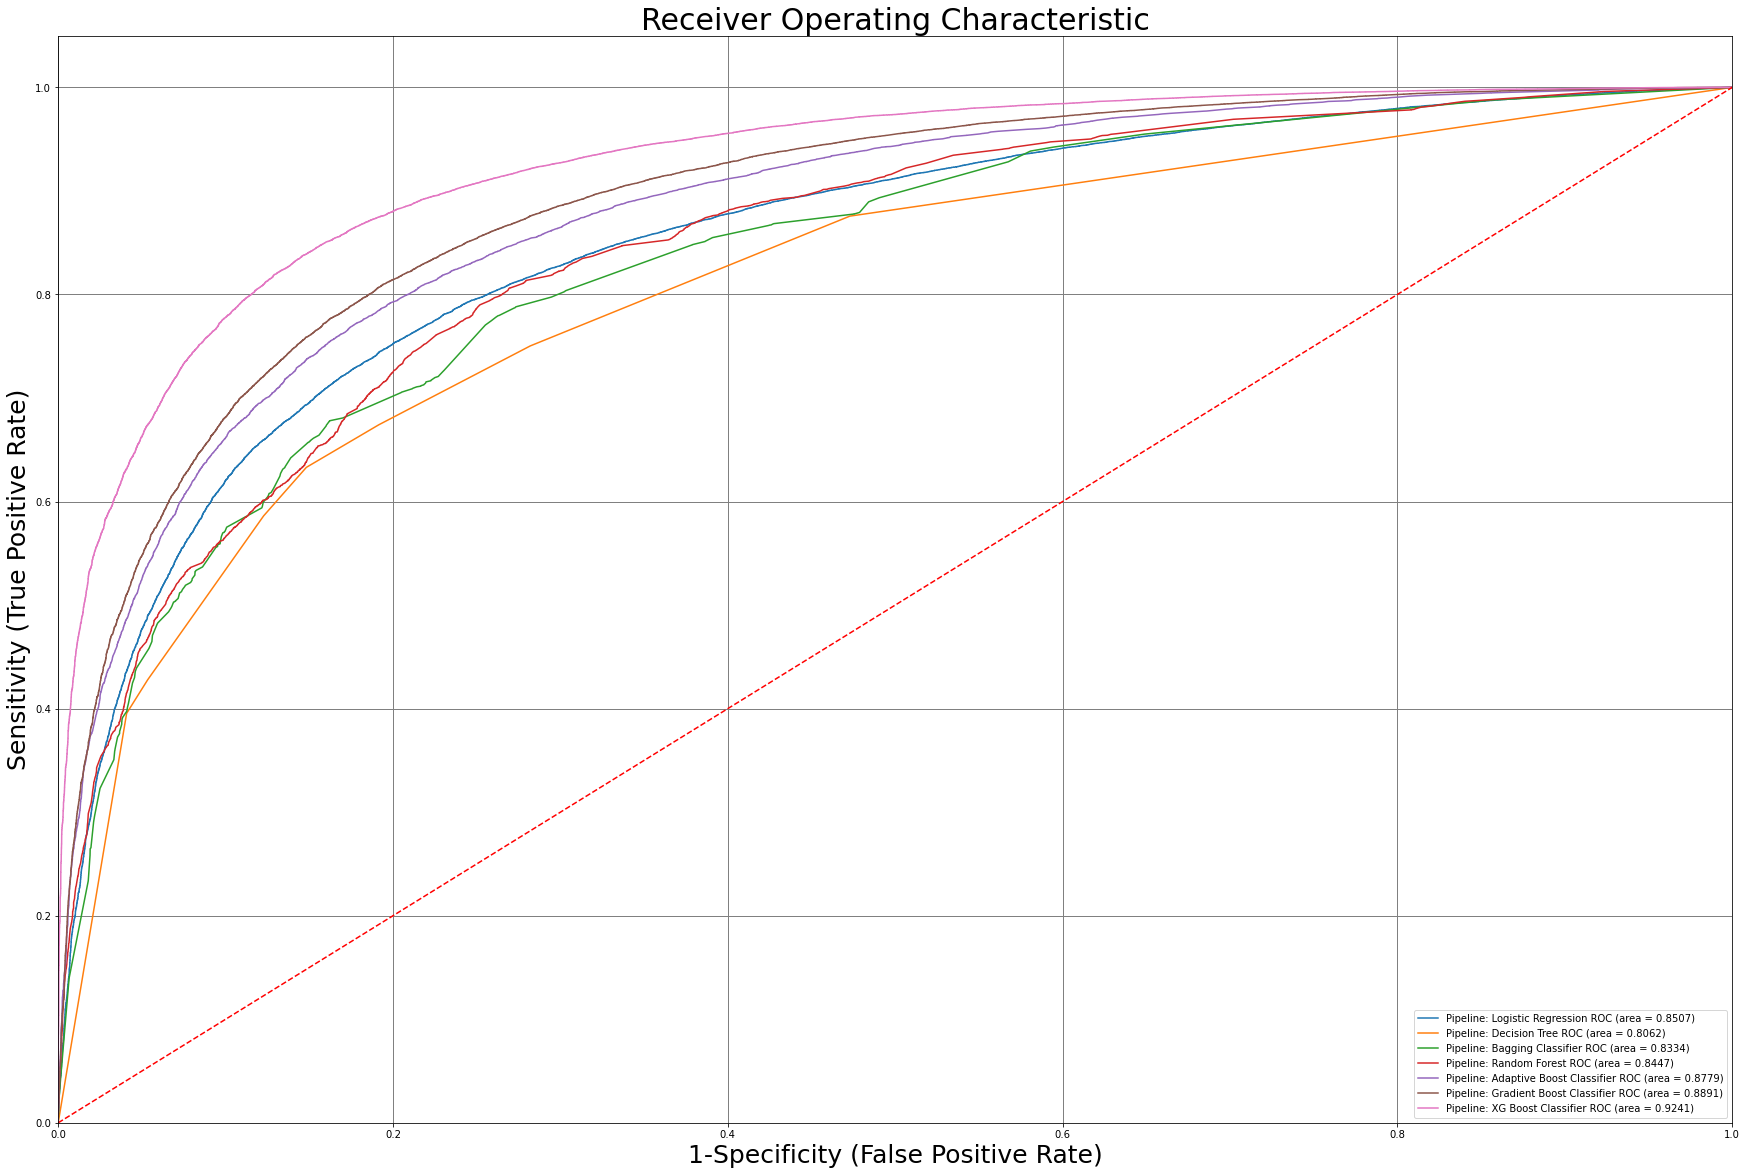

In [77]:
# Create dictionary of model names and classifier functions
classifiers = [
                {'model': 'Pipeline: Logistic Regression', 'classifier': pipe_lr},
                {'model': 'Pipeline: Decision Tree', 'classifier': pipe_dtree},
                {'model': 'Pipeline: Bagging Classifier', 'classifier': pipe_bagclass},
                {'model': 'Pipeline: Random Forest', 'classifier': pipe_randfor},
                {'model': 'Pipeline: Adaptive Boost Classifier', 'classifier': pipe_adboost},
                {'model': 'Pipeline: Gradient Boost Classifier', 'classifier': pipe_gboost},
                {'model': 'Pipeline: XG Boost Classifier', 'classifier': pipe_xgb},
              ]

plt.figure(figsize = (30,20)) # Set plot size

# Below for loop iterates through your models list
for i in classifiers:
    i['classifier'].fit(X_train_samp, y_train_samp)
    y_pred = i['classifier'].predict(X_train_samp) # predict the test data
# Compute False postive rate, True positive rate, and Thresholds
    fpr, tpr, thresholds = metrics.roc_curve(y_train_samp, i['classifier'].predict_proba(X_train_samp)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_train_samp, i['classifier'].predict_proba(X_train_samp)[:,1])
# Now, plot the computed values
    plt.plot(fpr, tpr, label = '%s ROC (area = %0.4f)' % (i['model'], auc))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--') # Plot the threshold
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)', fontdict = {'fontsize' : 25})
plt.ylabel('Sensitivity (True Positive Rate)', fontdict = {'fontsize' : 25})
plt.title('Receiver Operating Characteristic', fontdict = {'fontsize' : 30})
plt.grid(b = True, which = 'both', axis = 'both', color = 'gray', linestyle = '-', linewidth = 1)
plt.legend(loc = 'lower right')
plt.show()   # Display

#### Plot ROC AUC Curves - Validation Data

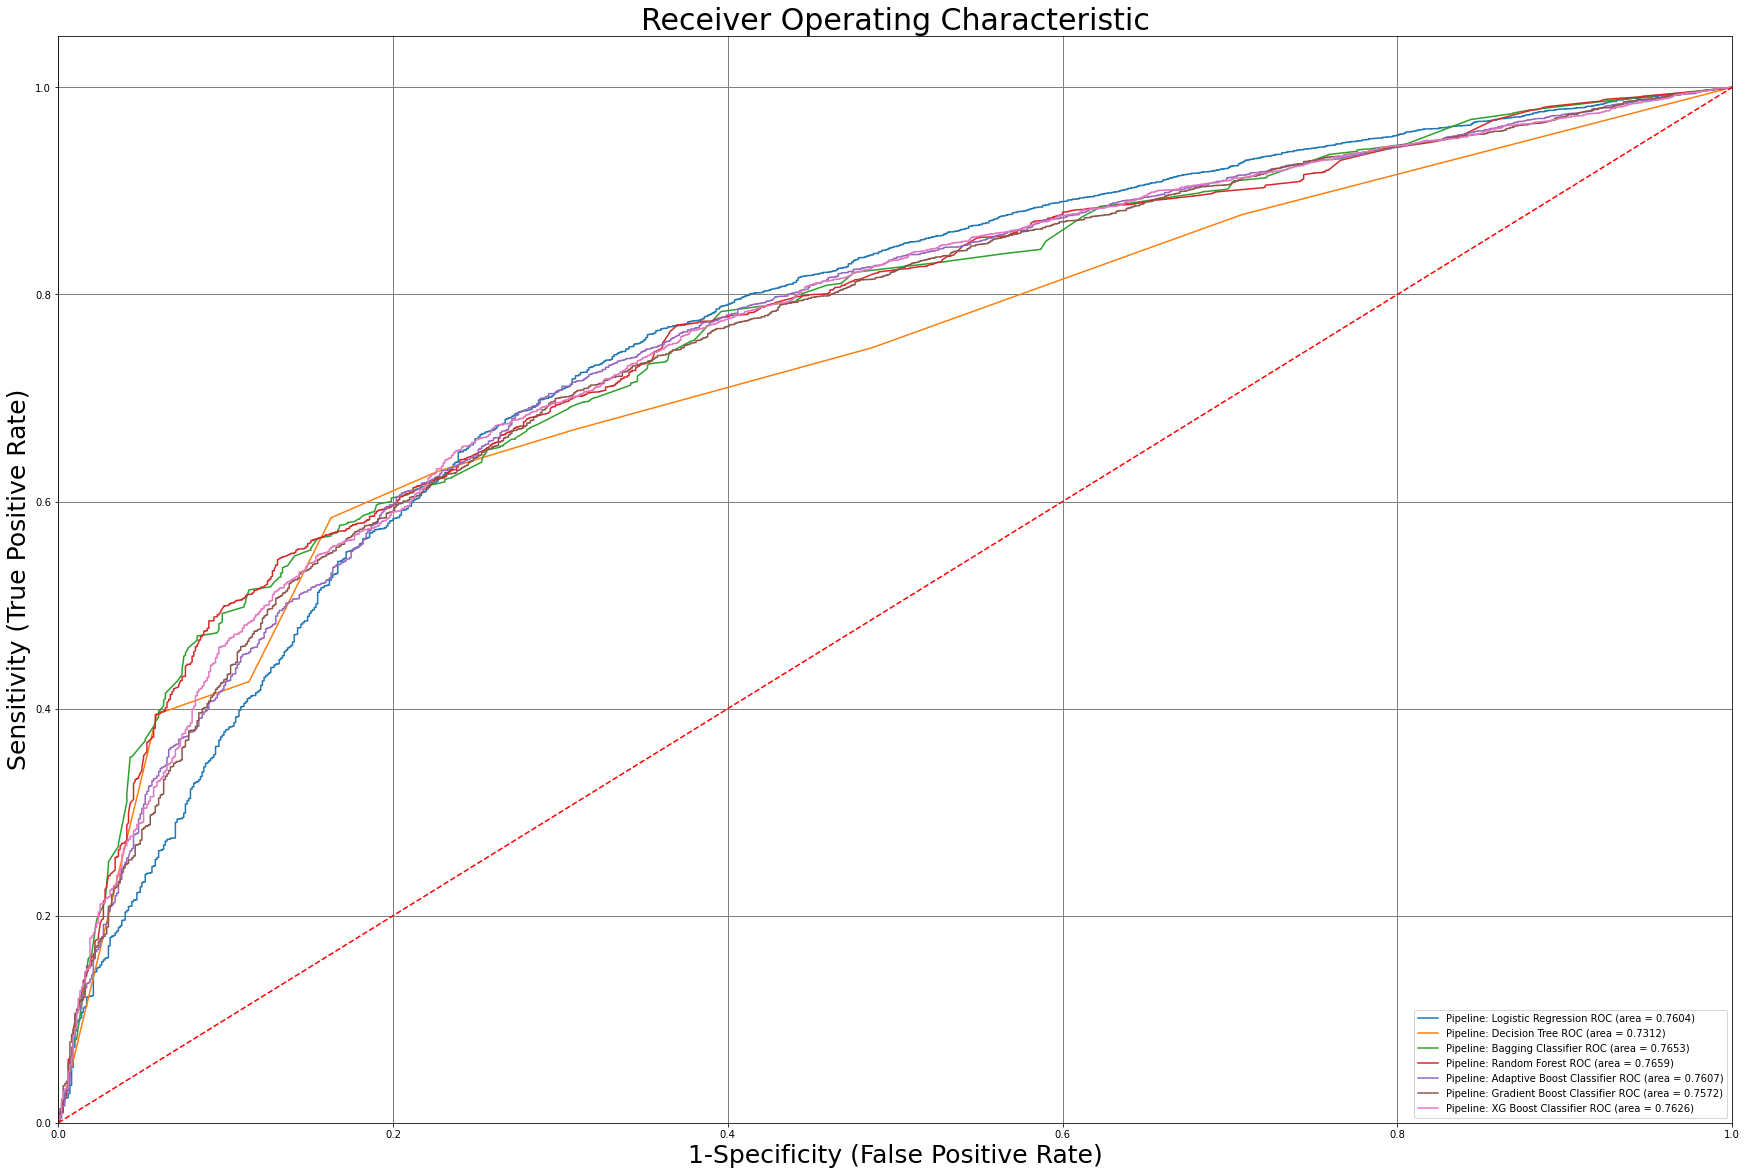

In [78]:
# Create dictionary of model names and classifier functions
classifiers = [
                {'model': 'Pipeline: Logistic Regression', 'classifier': pipe_lr},
                {'model': 'Pipeline: Decision Tree', 'classifier': pipe_dtree},
                {'model': 'Pipeline: Bagging Classifier', 'classifier': pipe_bagclass},
                {'model': 'Pipeline: Random Forest', 'classifier': pipe_randfor},
                {'model': 'Pipeline: Adaptive Boost Classifier', 'classifier': pipe_adboost},
                {'model': 'Pipeline: Gradient Boost Classifier', 'classifier': pipe_gboost},
                {'model': 'Pipeline: XG Boost Classifier', 'classifier': pipe_xgb},
              ]

plt.figure(figsize = (30,20)) # Set plot size

# Below for loop iterates through your models list
for i in classifiers:
    i['classifier'].fit(X_train_samp, y_train_samp)
    y_pred = i['classifier'].predict(X_val) # predict the test data
# Compute False postive rate, True positive rate, and Thresholds
    fpr, tpr, thresholds = metrics.roc_curve(y_val, i['classifier'].predict_proba(X_val)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_val, i['classifier'].predict_proba(X_val)[:,1])
# Now, plot the computed values
    plt.plot(fpr, tpr, label = '%s ROC (area = %0.4f)' % (i['model'], auc))
    
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--') # Plot the threshold
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)', fontdict = {'fontsize' : 25})
plt.ylabel('Sensitivity (True Positive Rate)', fontdict = {'fontsize' : 25})
plt.title('Receiver Operating Characteristic', fontdict = {'fontsize' : 30})
plt.grid(b = True, which = 'both', axis = 'both', color = 'gray', linestyle = '-', linewidth = 1)
plt.legend(loc = 'lower right')
plt.show()   # Display

#### Specificity & ROC AUC Scores - Training vs. Validation

In [79]:
choosen_classifiers = [
                {'model': 'Pipeline: Logistic Regression', 'classifier': pipe_lr},
                {'model': 'Pipeline: Decision Tree', 'classifier': pipe_dtree},
                {'model': 'Pipeline: Bagging Classifier', 'classifier': pipe_bagclass},
                {'model': 'Pipeline: Random Forest', 'classifier': pipe_randfor},
                {'model': 'Pipeline: Adaptive Boost Classifier', 'classifier': pipe_adboost},
                {'model': 'Pipeline: Gradient Boost Classifier', 'classifier': pipe_gboost},
                {'model': 'Pipeline: XG Boost Classifier', 'classifier': pipe_xgb},
              ]

print('\n Cross Validation - ROC_AUC Score (Train Data): \n')

# Accuracy score will be focal metric to lower False Negatives (Customers Non-Renewing when not predicted to)
for i in choosen_classifiers:
    
    scoring = 'roc_auc'
    
    i['classifier'].fit(X_train_samp, y_train_samp) # Fit the models to the resampled Training data
    
    # Use Stratified Fold to keep the class splits (vs. target), instead of random sampling
    K_Fold = StratifiedKFold(n_splits = 5, shuffle = True, 
                             random_state = 1) # Folds set to 5 as default, Random State will be kept at 1 throughout
    
    cv_score = cross_val_score(estimator = i['classifier'], X = X_train_samp, y = y_train_samp,
                               scoring = scoring, cv = K_Fold) # Use 5 folds to test

    print('{} : {} '.format(i['model'], round(cv_score.mean(),4))) # Use Model means for good average results view
    

    
print('\n Cross Validation - ROC_AUC Score (Validation Data): \n')

# Accuracy score will be focal metric to lower False Negatives (Customers Non-Renewing when not predicted to)
for i in choosen_classifiers:
    
    scoring = 'roc_auc'
    
    i['classifier'].fit(X_train_samp, y_train_samp) # Fit the models to the resampled Training data
    
    # Use Stratified Fold to keep the class splits (vs. target), instead of random sampling
    K_Fold = StratifiedKFold(n_splits = 5, shuffle = True, 
                             random_state = 1) # Folds set to 5 as default, Random State will be kept at 1 throughout
    
    cv_score = cross_val_score(estimator = i['classifier'], X = X_val, y = y_val,
                               scoring = scoring, cv = K_Fold) # Use 5 folds to test

    print('{} : {} '.format(i['model'], round(cv_score.mean(),4))) # Use Model means for good average results view


 Cross Validation - ROC_AUC Score (Train Data): 

Pipeline: Logistic Regression : 0.8505 
Pipeline: Decision Tree : 0.8046 
Pipeline: Bagging Classifier : 0.8362 
Pipeline: Random Forest : 0.842 
Pipeline: Adaptive Boost Classifier : 0.8751 
Pipeline: Gradient Boost Classifier : 0.8871 
Pipeline: XG Boost Classifier : 0.9112 

 Cross Validation - ROC_AUC Score (Validation Data): 

Pipeline: Logistic Regression : 0.8242 
Pipeline: Decision Tree : 0.8027 
Pipeline: Bagging Classifier : 0.8219 
Pipeline: Random Forest : 0.8221 
Pipeline: Adaptive Boost Classifier : 0.8187 
Pipeline: Gradient Boost Classifier : 0.8252 
Pipeline: XG Boost Classifier : 0.8144 


**All models scored relatively well in general on Cross Validation for AUC scores (80% - 82%) on Validation Data**.  The specific Training and Validation scores, shown below, for the top 3 models (best Training scores with well generalized Validation results) will be selected.

The models with highest AUC scores on Training data while also being the **most generalized on Validation data** are:

**ROC AUC Scores - Training vs. Validation Date:**
- Pipeline: Logistic Regression (85% vs. 82.4%)
- Pipeline: Adaptive Boost Classifier (87.7% vs. 82.1%)
- Pipeline: Gradient Boost Classifier (88.7% vs. 82.5%)

The remaining models may have scored higher for Training data probability predictions, but due to the disconnect with Validation data results, can be removed from further analysis going forward.

### Plotting Confusion Matrix: Pre/Post Threshold Adjustments

In [80]:
# Create a Confusion Matrix summary for True vs. Predicted Labels: True and False Results

def make_confusion_matrix(model, predictors, target):
    
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    
    y_Pred = model.predict(predictors) # Predict for CM
    y_Pred_Prob = model.predict_proba(predictors) # Predict for ROC_AUC Curve
   
    cm = metrics.confusion_matrix(target, y_Pred, labels=[1, 0])

    df_cm = pd.DataFrame(cm, index = [i for i in ['Actual - Yes', 'Actual - No']],
              columns = [i for i in ['Predicted - Yes', 'Predicted - No']])
    group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}' for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    plt.figure(figsize = (15,10))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
    print('Accuracy: {}'.format(round(accuracy_score(target, y_Pred),4)))
    print('Precision: {}'.format(round(precision_score(target, y_Pred),4)))
    print('Recall: {}'.format(round(recall_score(target, y_Pred),4)))
    print('F1 Score: {}'.format(round(f1_score(target, y_Pred),4))) # Target metric
    print('Specificity: {}'.format(round(cm[1,1] / (cm[1,1] + cm[1,0]),4))) 
    print('.' * 35)
    print('Roc_Auc_Score: {}'.format(round(roc_auc_score(target, y_Pred_Prob[:,1]),4)))
    print('')
    print('TP: {}, FN: {}, TN: {}, FP: {}'.format(cm[0,0], cm[0,1], cm[1,1], cm[1,0]))

#### Pipeline: Logistic Regression

In [81]:
# Fit the model to the upsampled Training data
pipe_lr.fit(X_train_samp, y_train_samp)

Pipeline(steps=[('stdscaler', StandardScaler()),
                ('lr_clf',
                 LogisticRegression(class_weight='balanced', random_state=1))])

Accuracy: 0.7613
Precision: 0.9687
Recall: 0.7703
F1 Score: 0.8582
Specificity: 0.627
...................................
Roc_Auc_Score: 0.7604

TP: 11532, FN: 3439, TN: 627, FP: 373


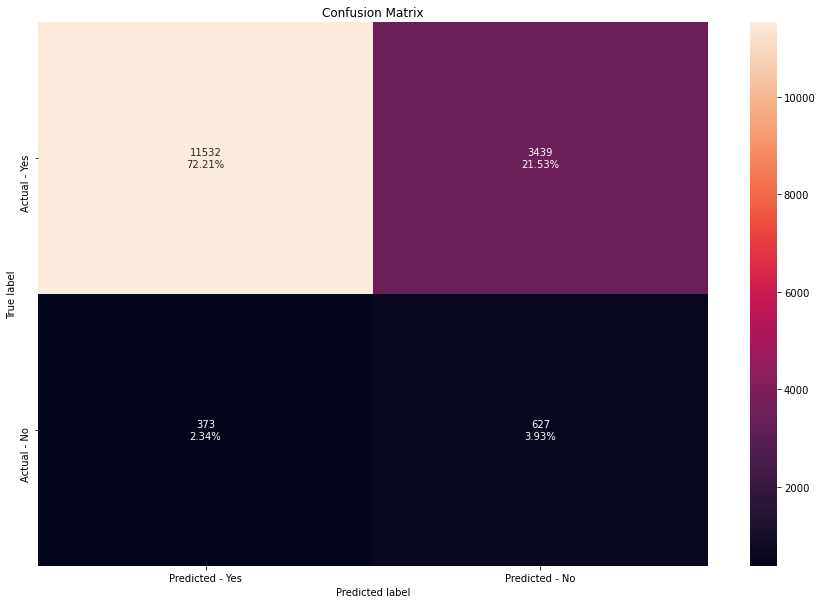

In [82]:
# Run the Confusion Matrix summary
make_confusion_matrix(pipe_lr, X_val, y_val)

- The model scored very high for **Precision (True Positives / (True Positives + False Positives)** and relatively well for the target Metric, **Specificity (True Negatives / (True Negatives + False Positives)**
- Being that the primary objective for the business is to minimize False Positives (predicted to Renew but actually Defaulting/Non-Renewing), **a False Positive score of 2.3% is strong**
    - Although the model scored lower in Recall/Sensitivity (True Positives / (True Positives + False Negatives)), in this business scenario that simply equates to customers predicted to Not Renew but actually Renewing
        - **The overall False Negative count (21.5%) can be improved upon through Adjusted Probability Thresholds**
        - As long as this miss doesn't result in large amounts of resources wasted unnecessarily on targeting customers not truly at risk, it can be seen as a slight benefit to the business, with the key focus being targeting true at risk customers (likely only 6% of the population based on sample splits)

#### Applying Probability Threshold for Optimal Confusion Matrix Results
Adjusting the Probability Threshold, a set point for when a customer is assumed to Renew, **can substantially lower the False Negatives count whilst improving all other counts**.

Accuracy: 0.9334
Precision: 1.0
Recall: 0.918
F1 Score: 0.9573
Specificity: 1.0
...................................
Roc_Auc_Score: 1.0

TP: 11905, FN: 1063, TN: 3003, FP: 0


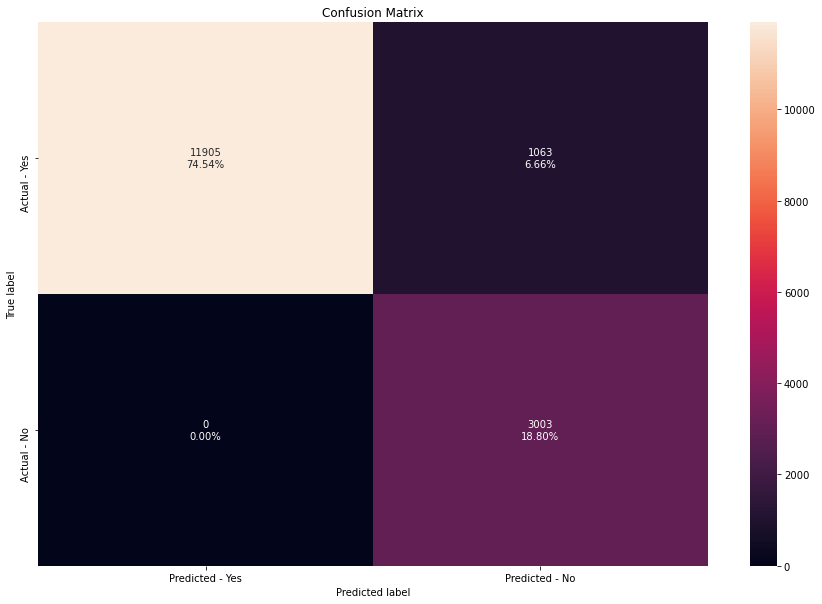

In [83]:
# Plug in best threshold from above
threshold = 0.40
y_pred = (pipe_lr.predict_proba(X_val)[:, 1] > threshold).astype('float')
# confusion_matrix(y_test, y_pred)
make_confusion_matrix(pipe_lr, X_val, y_pred)

- **Lowering the threshold to 0.4** (vs. default of 0.5), after which point a customer is predicted to Renew, **lowers the False Negative Count from 21.5% to 6.7% and lowers the False Positive Count to 0%**
    - This results in perfect scores for Precision and Specificity, and substantially improves Recall (91.8%)

#### Pipeline: Adaptive Boost Classifier

In [84]:
# Fit the model to the upsampled Training data
pipe_adboost.fit(X_train_samp, y_train_samp)

Pipeline(steps=[('adboost_clf',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                          max_depth=2,
                                                                          max_features=0.5,
                                                                          min_samples_leaf=2,
                                                                          random_state=1),
                                    learning_rate=0.1))])

Accuracy: 0.7482
Precision: 0.9687
Recall: 0.7557
F1 Score: 0.8491
Specificity: 0.635
...................................
Roc_Auc_Score: 0.7617

TP: 11314, FN: 3657, TN: 635, FP: 365


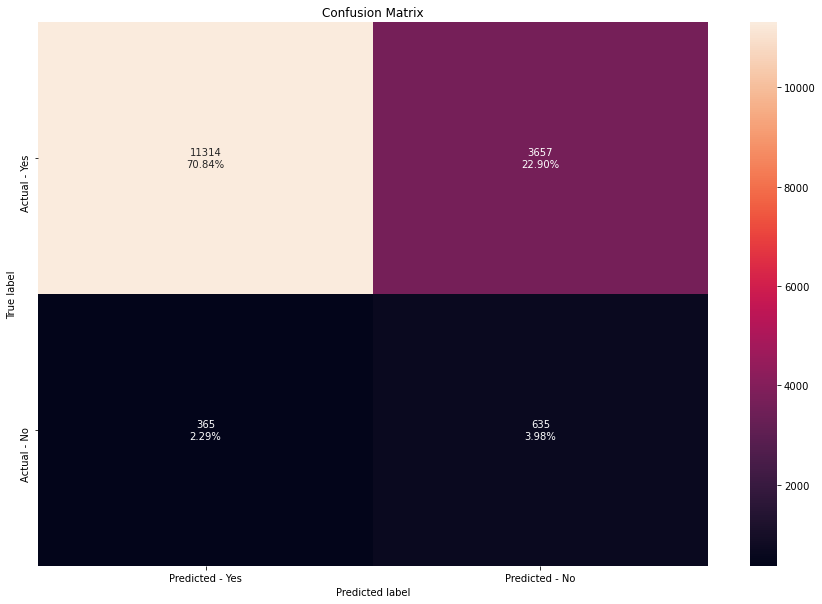

In [85]:
# Run the Confusion Matrix summary
make_confusion_matrix(pipe_adboost, X_val, y_val)

- The model scored very high for **Precision (True Positives / (True Positives + False Positives)** and relatively well for the target Metric, **Specificity (True Negatives / (True Negatives + False Positives)**
- Being that the primary objective for the business is to minimize False Positives (predicted to Renew but actually Defaulting/Non-Renewing), **a False Positive score of 2.2% is strong**
    - Although the model scored lower in Recall/Sensitivity (True Positives / (True Positives + False Negatives)), in this business scenario that simply equates to customers predicted to Not Renew but actually Renewing
        - **The overall False Negative count (23.5%) can be improved upon through Adjusted Probability Thresholds**
        - As long as this miss doesn't result in large amounts of resources wasted unnecessarily on targeting customers not truly at risk, it can be seen as a slight benefit to the business, with the key focus being targeting true at risk customers (likely only 6% of the population based on sample splits)

#### Applying Probability Threshold for Optimal Confusion Matrix Results
Adjusting the Probability Threshold, a set point for when a customer is assumed to Renew, **can substantially lower the False Negatives count whilst improving all other counts**

Accuracy: 0.9134
Precision: 1.0
Recall: 0.8941
F1 Score: 0.9441
Specificity: 1.0
...................................
Roc_Auc_Score: 1.0

TP: 11679, FN: 1383, TN: 2909, FP: 0


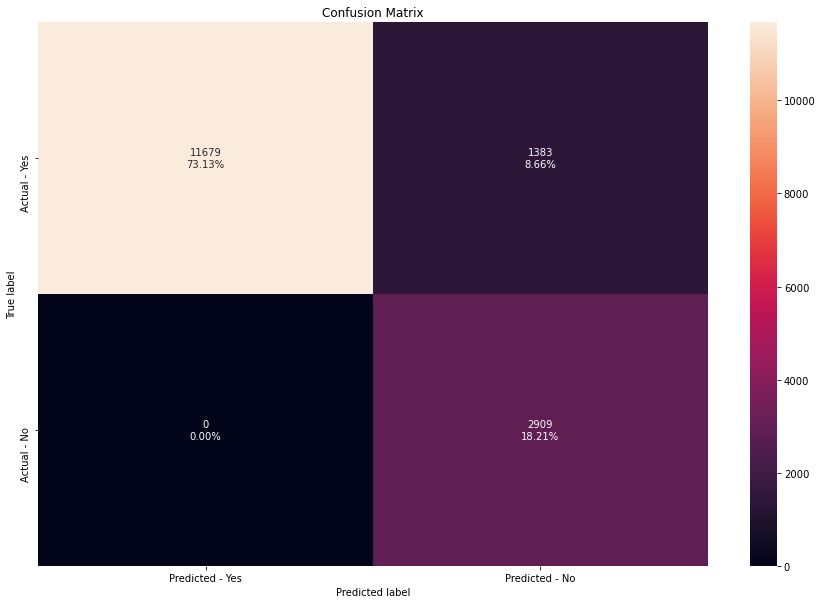

In [86]:
# Plug in best threshold from above
threshold = .48
y_pred = (pipe_adboost.predict_proba(X_val)[:, 1] > threshold).astype('float')
# confusion_matrix(y_test, y_pred)
make_confusion_matrix(pipe_adboost, X_val, y_pred)

- **Lowering the threshold slightly down to 0.48** (vs. default of 0.5), after which point a customer is predicted to Renew, **lowers the False Negative Count from 23.5% to 8.9% and lowers the False Positive Count to 0%**
    - This results in perfect scores for Precision and Specificity, and substantially improves Recall (89%)

#### Pipeline: Gradient Boost Classifier

In [87]:
# Fit the model to the upsampled Training data
pipe_gboost.fit(X_train_samp, y_train_samp)

Pipeline(steps=[('gboost_clf',
                 GradientBoostingClassifier(max_depth=2, min_samples_leaf=3,
                                            random_state=1, subsample=0.5))])

Accuracy: 0.8594
Precision: 0.9529
Recall: 0.8942
F1 Score: 0.9226
Specificity: 0.339
...................................
Roc_Auc_Score: 0.7572

TP: 13387, FN: 1584, TN: 339, FP: 661


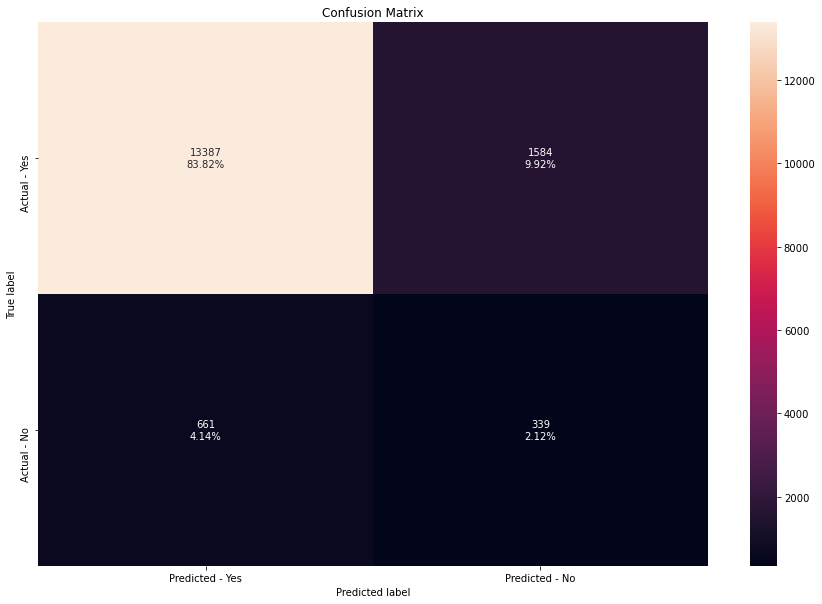

In [88]:
# Run the Confusion Matrix summary
make_confusion_matrix(pipe_gboost, X_val, y_val)

- The model scored very high for **Precision (True Positives / (True Positives + False Positives)** and poorly for the target Metric, **Specificity (True Negatives / (True Negatives + False Positives)**
- Being that the primary objective for the business is to minimize False Positives (predicted to Renew but actually Defaulting/Non-Renewing), **a False Positive score of 4.1% is decent**
    - Although the model scored lower in Recall/Sensitivity (True Positives / (True Positives + False Negatives)), in this business scenario that simply equates to customers predicted to Not Renew but actually Renewing
        - **The overall False Negative count (9.9%) may still be improved upon through Adjusted Probability Thresholds**
        - As long as this miss doesn't result in large amounts of resources wasted unnecessarily on targeting customers not truly at risk, it can be seen as a slight benefit to the business, with the key focus being targeting true at risk customers (likely only 6% of the population based on sample splits)

#### Applying Probability Threshold for Optimal Confusion Matrix Results
Adjusting the Probability Threshold, a set point for when a customer is assumed to Renew, **can substantially lower the False Negatives count whilst improving all other counts**

Accuracy: 0.9291
Precision: 1.0
Recall: 0.9254
F1 Score: 0.9612
Specificity: 1.0
...................................
Roc_Auc_Score: 1.0

TP: 14048, FN: 1133, TN: 790, FP: 0


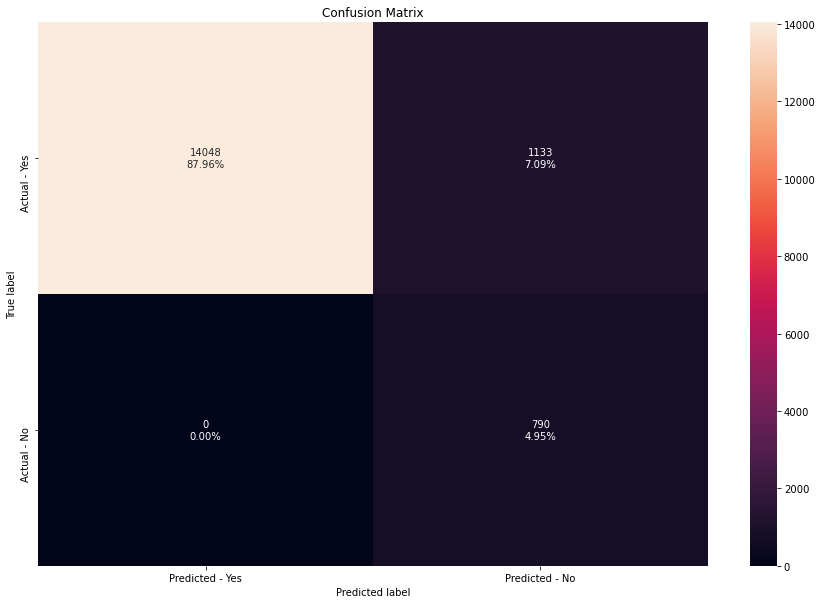

In [89]:
# Plug in best threshold from above
threshold = 0.35
y_pred = (pipe_gboost.predict_proba(X_val)[:, 1] > threshold).astype('float')
# confusion_matrix(y_test, y_pred)
make_confusion_matrix(pipe_gboost, X_val, y_pred)

- **Lowering the threshold down to 0.4** (vs. default of 0.5), after which point a customer is predicted to Renew, **lowers the False Negative Count from 9.9% to 7% and lowers the False Positive Count to 0%**
    - This results in perfect scores for Precision and Specificity, and substantially improves Recall (92.5%)

### HyperParameter Tuning Top 3 Models

#### Process Various Model Parameters & Select Best Combinations

In [90]:
# Bring in the original models (already pre-tuned) and determine best parameters for further tuning, using ROC Score as goal

# Logistic Regression
pipe_lr = pipe1(steps = [
   
                         
                        ('stdscaler', StandardScaler()),
    
                         ('lr_clf', LogisticRegression(random_state = 1, 
                                                      class_weight = 'balanced')) # Running full features/iterations
                        ]) # Balancing classes

# AdaBoost Classifier
pipe_adboost = pipe1(steps = [
    

                        # Use above Decision Tree as base estimator    
                         ('adboost_clf', AdaBoostClassifier(base_estimator = (DecisionTreeClassifier(max_depth = 2, 
                        random_state = 1, class_weight = 'balanced', max_features = .50, min_samples_leaf = 3)), 
                                                           learning_rate = 0.1))
                        ])

# Gradboost Classifier
pipe_gboost = pipe1(steps = [
    
  

                        # Limit GBM to 70% learning rate and subsample
                         ('gboost_clf', GradientBoostingClassifier(max_depth = 2, random_state = 1, 
                            learning_rate = 0.1, subsample = .5, min_samples_leaf = 3))
                        ])


# Hyperparameter Tuning for each pipeline

pipe_lr_pars = {
#                'lr_clf__penalty': ['l1','l2'], # Both penalties - Lasso & Ridge
                'lr_clf__max_iter': [20, 50, 100, 200, 500, 1000], # Number of model iterations to run 
                'lr_clf__C': [0.1, 0.3, 0.5, 0.7, 0.9, 1], # Inverse of Regularization strength (smaller = more) - 0.1 to 1.0        
                'lr_clf__solver': ['liblinear','newton-cg', 'sag', 'lbfgs'] # List possible solvers to try
                } 


pipe_adboost_pars = {
                'adboost_clf__n_estimators': np.arange(10, 210, 10), # Number of trees ranging from 10 to 200 in increments of 10
                'adboost_clf__learning_rate': [0.1, 0.01, 0.2, 0.05, 1], # Slow the learning rate from .01x through to 1x
                'adboost_clf__learning_rate':[0.01, 0.1, 0.2, 0.5, 0.7, 1], # Learning rates ranging from 0.01 to 0.5 out of 1
                'adboost_clf__base_estimator': [
                                DecisionTreeClassifier(max_depth = 1, random_state = 1),
                                DecisionTreeClassifier(max_depth = 2, random_state = 1),
                                DecisionTreeClassifier(max_depth = 3, random_state = 1),
                                ] # Based Estimators are Decision Trees ranging from 1-3 levels deep
                }


pipe_gboost_pars = {
                'gboost_clf__n_estimators': np.arange(10, 210, 10), # Number of trees ranging from 10 to 200 in increments of 10
                'gboost_clf__subsample':[0.6, 0.7, 0.8, 0.9, 1], # Fraction of samples to use, ranging from 60% to 100%
                'gboost_clf__max_features':[0.7, 0.8, 0.9, 1], # Percentage of features to use, ranging from 70% to 100%
                'gboost_clf__max_depth':[2, 3, 5, 7, 10], # Max depth of trees, ranging from 3 to 10
                'gboost_clf__learning_rate':[0.01, 0.1, 0.2, 0.5, 0.7, 1] # Learning rates ranging from 0.01 to 0.5 out of 1
                }




# RandomizedSearch CV (Stratified) for each pipeline (Faster to run for multiple models than GridSearchCV due to random selection)

# Use Stratified Fold to keep the class splits (vs. target), instead of random sampling
K_Fold = StratifiedKFold(n_splits = 5, shuffle = True, 
                         random_state = 1) # Folds set to 5 as default, Random State will be kept at 1 throughout

n_iter_search = 5 # Set RandomizedSearch iterations to 5 vs. default of 10

print('Best Parameters:')
print('')

# Pipeline - Logistic Regression
print('Pipeline: Logistic Regression')

rs_lr = RandomizedSearchCV(pipe_lr, # Default 10 iterations
                    param_distributions = pipe_lr_pars,
                    scoring = 'roc_auc',
                    verbose = 1,
                    n_iter = n_iter_search,
                    random_state = 1,
                    cv = K_Fold)

rs_lr.fit(X_train_samp, y_train_samp)
print(rs_lr.best_params_)
# print('')
# print(rs_lr.score)
print('.' * 70)


# Pipeline - Gradient Boost Classifier
print('Pipeline: Adaptive Boost Classifier')

rs_adboost = RandomizedSearchCV(pipe_adboost, # Default 10 iterations
                    param_distributions = pipe_adboost_pars,
                    scoring = 'roc_auc',
                    verbose = 1,
                    n_iter = n_iter_search,
                    random_state = 1,
                    cv = K_Fold)

rs_adboost.fit(X_train_samp, y_train_samp)

print(rs_adboost.best_params_)
# print('')
# print(rs_adoost.score)
print('.' * 70)



# Pipeline - Gradient Boost Classifier
print('Pipeline: Gradient Boost Classifier')

rs_gboost = RandomizedSearchCV(pipe_gboost, # Default 10 iterations
                    param_distributions = pipe_gboost_pars,
                    scoring = 'roc_auc',
                    verbose = 1,
                    n_iter = n_iter_search,
                    random_state = 1,
                    cv = K_Fold)

rs_gboost.fit(X_train_samp, y_train_samp)

print(rs_gboost.best_params_)
# print('')
# print(rs_gboost.score)
print('.' * 100)


Best Parameters:

Pipeline: Logistic Regression
Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'lr_clf__solver': 'liblinear', 'lr_clf__max_iter': 20, 'lr_clf__C': 0.5}
......................................................................
Pipeline: Adaptive Boost Classifier
Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'adboost_clf__n_estimators': 160, 'adboost_clf__learning_rate': 0.2, 'adboost_clf__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)}
......................................................................
Pipeline: Gradient Boost Classifier
Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'gboost_clf__subsample': 0.9, 'gboost_clf__n_estimators': 30, 'gboost_clf__max_features': 0.9, 'gboost_clf__max_depth': 10, 'gboost_clf__learning_rate': 0.5}
....................................................................................................


#### Add Best Combination of Parameters to Previous (Pre-Tuned) Models

In [91]:
# Build Series of classification model pipelines, using imblearn version for upsampling/RandomOverSampler
# + Scaling and Class Weights for select models - combinations & parameters vary by model

# Logistic Regression
pipe_lr = pipe1(steps = [
    
                       ('stdscaler', StandardScaler()),
                         
                        ('lr_clf', LogisticRegression(
                        C = 0.5,
#                        penalty = 'l1', # Lasso and Ridge feature penalties available
                        solver = 'liblinear',
                        max_iter = 20, # Number of model iterations to run
                        class_weight = 'balanced',
                        random_state = 1)) # Running full features/iterations
                        ])

# Adaptive Boost Classifier
pipe_adboost = pipe1(steps = [

                         ('adboost_clf', AdaBoostClassifier(base_estimator = (DecisionTreeClassifier(max_depth = 2, 
                        random_state = 1, class_weight = 'balanced', max_features = .50, min_samples_leaf = 3)), # Tree Settings
                        learning_rate = 0.2, # Learning rate for model from 0 to 1
                        n_estimators = 30)) # Number of trees to run
                        ])


# Gradient Boost Classifier
pipe_gboost = pipe1(steps = [
    
                        
                        ('gboost_clf',GradientBoostingClassifier(
                        n_estimators = 30, # Number of trees to run
                        subsample = 0.9, # Fraction of samples to use
                        max_features = 0.9, # Percentage of features to use
                        max_depth = 2, # Max depth of trees, ranging from 3 to 10
                        min_samples_leaf = 3,
                        min_samples_split = 3,
                        learning_rate = 0.2, # Learning rate for model from 0 to 1 
                        random_state = 1))
                        ])

#### Plot Updated ROC AUC Curves - Training Data

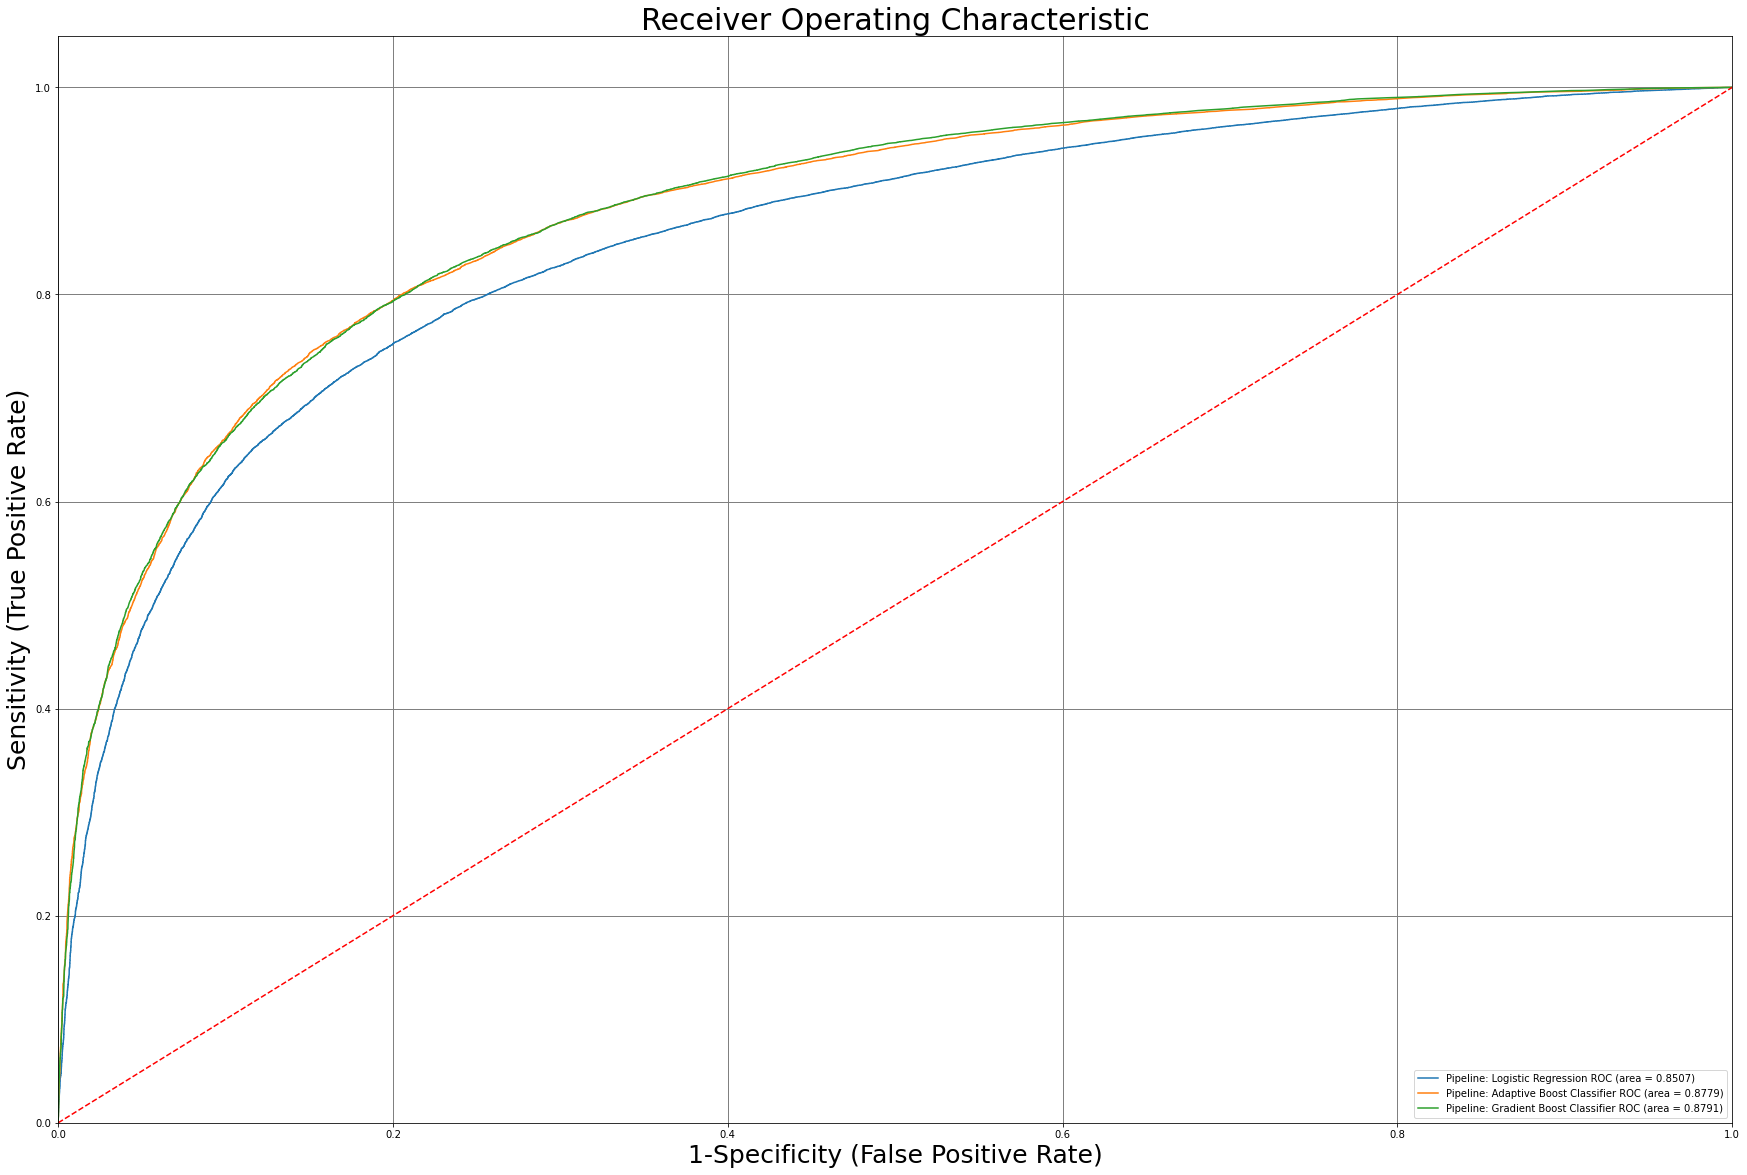

In [92]:
# Create dictionary of model names and classifier functions
final_classifiers = [
                {'model': 'Pipeline: Logistic Regression', 'classifier': pipe_lr},
                {'model': 'Pipeline: Adaptive Boost Classifier', 'classifier': pipe_adboost},
                {'model': 'Pipeline: Gradient Boost Classifier', 'classifier': pipe_gboost},
              ]

plt.figure(figsize = (30,20)) # Set plot size

# Below for loop iterates through your models list
for i in final_classifiers:
    i['classifier'].fit(X_train_samp, y_train_samp)
    y_pred = i['classifier'].predict(X_train_samp) # predict the test data
# Compute False postive rate, True positive rate, and Thresholds
    fpr, tpr, thresholds = metrics.roc_curve(y_train_samp, i['classifier'].predict_proba(X_train_samp)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_train_samp, i['classifier'].predict_proba(X_train_samp)[:,1])
# Now, plot the computed values
    plt.plot(fpr, tpr, label = '%s ROC (area = %0.4f)' % (i['model'], auc))
    
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--') # Plot the threshold
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)', fontdict = {'fontsize' : 25})
plt.ylabel('Sensitivity (True Positive Rate)', fontdict = {'fontsize' : 25})
plt.title('Receiver Operating Characteristic', fontdict = {'fontsize' : 30})
plt.grid(b = True, which = 'both', axis = 'both', color = 'gray', linestyle = '-', linewidth = 1)
plt.legend(loc = 'lower right')
plt.show()   # Display

#### Plot Updated ROC AUC Curves - Validation Data

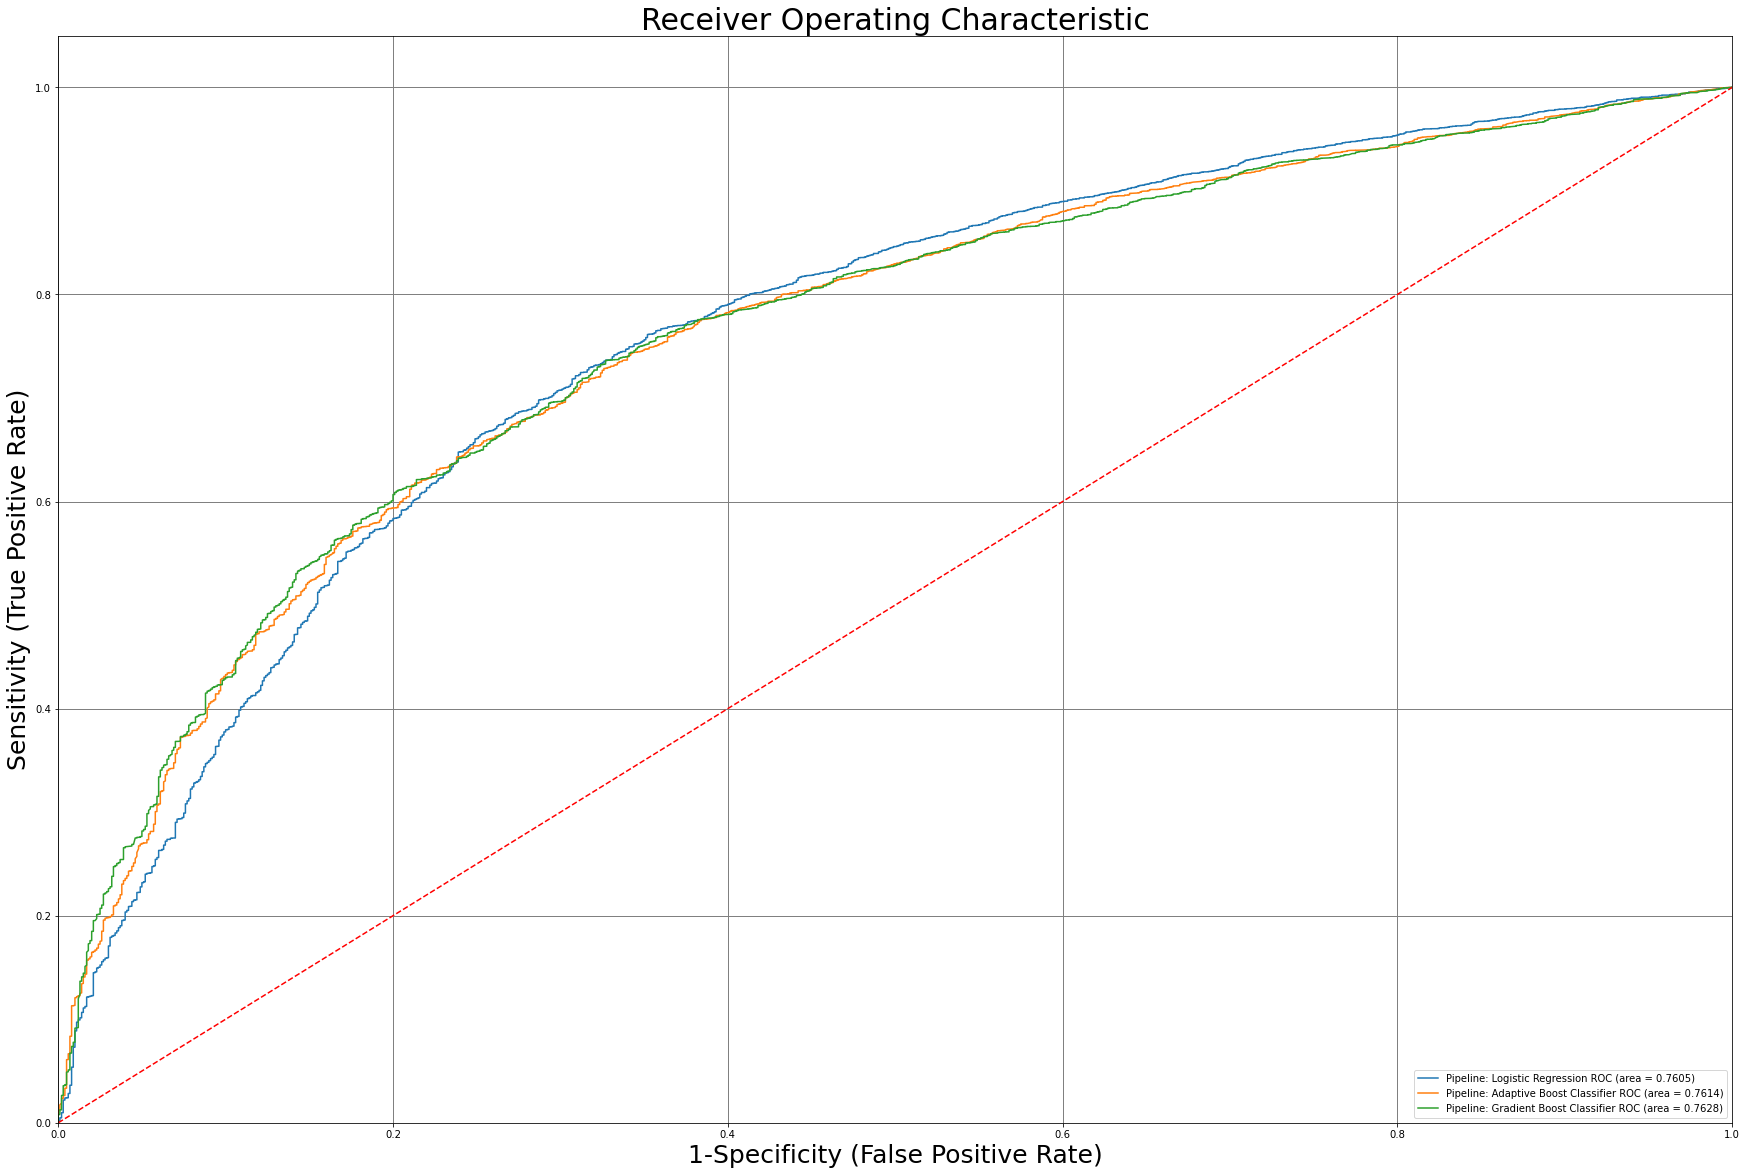

In [93]:
# Create dictionary of model names and classifier functions
classifiers = [
                {'model': 'Pipeline: Logistic Regression', 'classifier': pipe_lr},
                {'model': 'Pipeline: Adaptive Boost Classifier', 'classifier': pipe_adboost},
                {'model': 'Pipeline: Gradient Boost Classifier', 'classifier': pipe_gboost},
              ]

plt.figure(figsize = (30,20)) # Set plot size

# Below for loop iterates through your models list
for i in classifiers:
    i['classifier'].fit(X_train_samp, y_train_samp)
    y_pred = i['classifier'].predict(X_val) # predict the test data
# Compute False postive rate, True positive rate, and Thresholds
    fpr, tpr, thresholds = metrics.roc_curve(y_val, i['classifier'].predict_proba(X_val)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_val, i['classifier'].predict_proba(X_val)[:,1])
# Now, plot the computed values
    plt.plot(fpr, tpr, label = '%s ROC (area = %0.4f)' % (i['model'], auc))
    
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--') # Plot the threshold
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)', fontdict = {'fontsize' : 25})
plt.ylabel('Sensitivity (True Positive Rate)', fontdict = {'fontsize' : 25})
plt.title('Receiver Operating Characteristic', fontdict = {'fontsize' : 30})
plt.grid(b = True, which = 'both', axis = 'both', color = 'gray', linestyle = '-', linewidth = 1)
plt.legend(loc = 'lower right')
plt.show()   # Display

In [94]:
# Create dictionary of model names and classifier functions
classifiers = [
                {'model': 'Pipeline: Logistic Regression', 'classifier': pipe_lr},
                {'model': 'Pipeline: Adaptive Boost Classifier', 'classifier': pipe_adboost},
                {'model': 'Pipeline: Gradient Boost Classifier', 'classifier': pipe_gboost},
              ]

print('\n Cross Validation - ROC_AUC Score (Train Data): \n')

# Accuracy score will be focal metric to lower False Negatives (Customers Non-Renewing when not predicted to)
for i in classifiers:
    
    scoring = 'roc_auc'
    
    i['classifier'].fit(X_train_samp, y_train_samp) # Fit the models to the resampled Training data
    
    # Use Stratified Fold to keep the class splits (vs. target), instead of random sampling
    K_Fold = StratifiedKFold(n_splits = 5, shuffle = True, 
                             random_state = 1) # Folds set to 5 as default, Random State will be kept at 1 throughout
    
    cv_score = cross_val_score(estimator = i['classifier'], X = X_train_samp, y = y_train_samp,
                               scoring = scoring, cv = K_Fold) # Use 5 folds to test

    print('{} : {} '.format(i['model'], round(cv_score.mean(),4))) # Use Model means for good average results view
    

    
print('\n Cross Validation - ROC_AUC Score (Validation Data): \n')

# Accuracy score will be focal metric to lower False Negatives (Customers Non-Renewing when not predicted to)
for i in classifiers:
    
    scoring = 'roc_auc'
    
    i['classifier'].fit(X_train_samp, y_train_samp) # Fit the models to the resampled Training data
    
    # Use Stratified Fold to keep the class splits (vs. target), instead of random sampling
    K_Fold = StratifiedKFold(n_splits = 5, shuffle = True, 
                             random_state = 1) # Folds set to 5 as default, Random State will be kept at 1 throughout
    
    cv_score = cross_val_score(estimator = i['classifier'], X = X_val, y = y_val,
                               scoring = scoring, cv = K_Fold) # Use 5 folds to test

    print('{} : {} '.format(i['model'], round(cv_score.mean(),4))) # Use Model means for good average results view


 Cross Validation - ROC_AUC Score (Train Data): 

Pipeline: Logistic Regression : 0.8505 
Pipeline: Adaptive Boost Classifier : 0.879 
Pipeline: Gradient Boost Classifier : 0.8763 

 Cross Validation - ROC_AUC Score (Validation Data): 

Pipeline: Logistic Regression : 0.8242 
Pipeline: Adaptive Boost Classifier : 0.8186 
Pipeline: Gradient Boost Classifier : 0.8242 


After tuning the top 3 models with the Best Parameters from the Grid Search CV review, the ROC AUC scores are:

**ROC AUC Scores - Training vs. Validation Date:**
- Pipeline: Logistic Regression (85% vs. 82.4%)
- Pipeline: Adaptive Boost Classifier (87.9% vs. 82.1%)
- Pipeline: Gradient Boost Classifier (87.6% vs. 82.4%)

Although the scores are similarly generalized as was the case before hyperparameter tuning, the primary goal is to improve Specificity scores which further Confusion Matrix reporting should confirm.

## Confusion Matrix - Top 3 Models (Tuned)

### Validation Data

#### Pipeline: Logistic Regression

In [95]:
# Fit the model to the upsampled Training data
pipe_lr.fit(X_train_samp, y_train_samp)

Pipeline(steps=[('stdscaler', StandardScaler()),
                ('lr_clf',
                 LogisticRegression(C=0.5, class_weight='balanced', max_iter=20,
                                    random_state=1, solver='liblinear'))])

Accuracy: 0.7612
Precision: 0.9687
Recall: 0.7702
F1 Score: 0.8581
Specificity: 0.627
...................................
Roc_Auc_Score: 0.7605

TP: 11530, FN: 3441, TN: 627, FP: 373


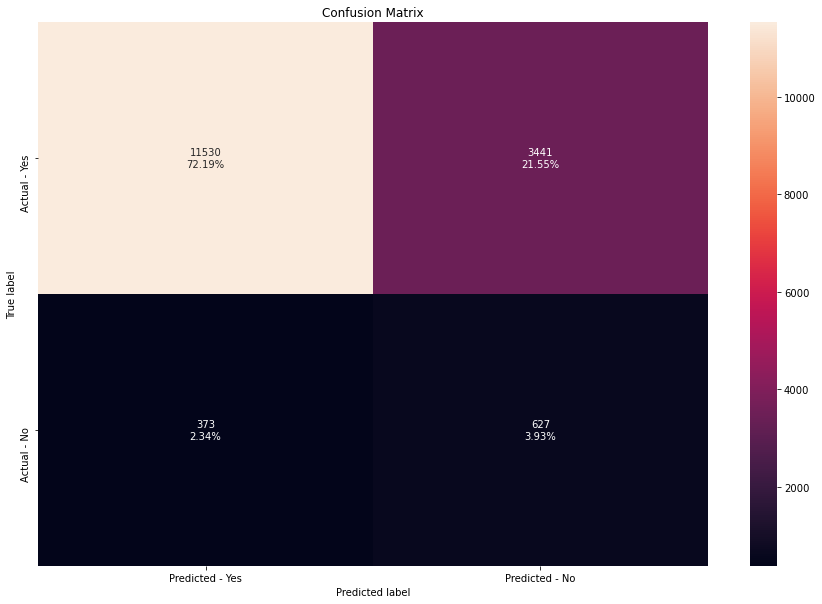

In [96]:
# Run the Confusion Matrix summary
make_confusion_matrix(pipe_lr, X_val, y_val)

- The model scored very high for **Precision (True Positives / (True Positives + False Positives)** and relatively well for the target Metric, **Specificity (True Negatives / (True Negatives + False Positives)**
- Being that the primary objective for the business is to minimize False Positives (predicted to Renew but actually Defaulting/Non-Renewing), **a False Positive score of 2.3% is strong**
    - Although the model scored lower in Recall/Sensitivity (True Positives / (True Positives + False Negatives)), in this business scenario that simply equates to customers predicted to Not Renew but actually Renewing
        - **The overall False Negative count (21.6%) can be improved upon through Adjusted Probability Thresholds**
        - As long as this miss doesn't result in large amounts of resources wasted unnecessarily on targeting customers not truly at risk, it can be seen as a slight benefit to the business, with the key focus being targeting true at risk customers (likely only 6% of the population based on sample splits)

#### Applying Probability Threshold for Optimal Confusion Matrix Results
Adjusting the Probability Threshold, a set point for when a customer is assumed to Renew, **can substantially lower the False Negatives count whilst improving all other counts**

Accuracy: 0.9333
Precision: 1.0
Recall: 0.9179
F1 Score: 0.9572
Specificity: 1.0
...................................
Roc_Auc_Score: 1.0

TP: 11903, FN: 1065, TN: 3003, FP: 0


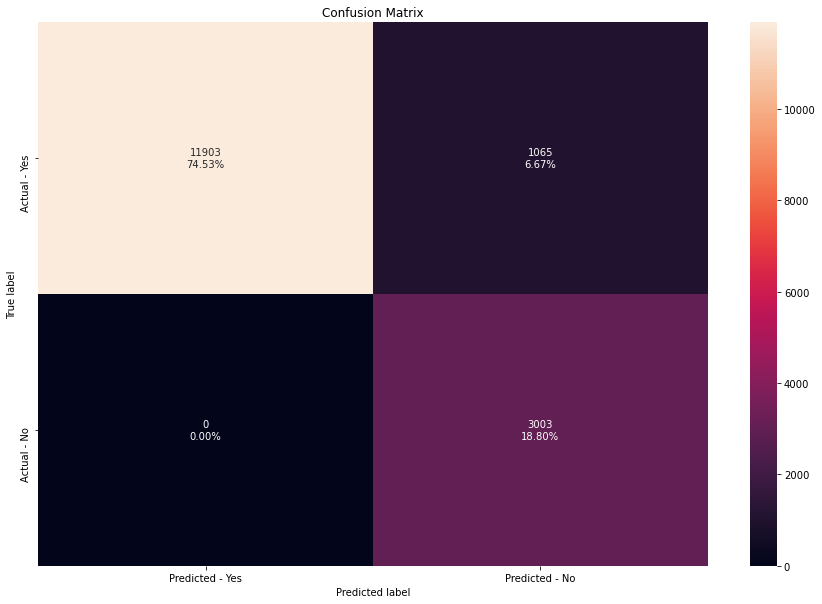

In [97]:
# Plug in best threshold from above
threshold = 0.4
y_pred = (pipe_lr.predict_proba(X_val)[:, 1] > threshold).astype('float')
# confusion_matrix(y_test, y_pred)
make_confusion_matrix(pipe_lr, X_val, y_pred)

- **Lowering the threshold to 0.4** (vs. default of 0.5), after which point a customer is predicted to Renew, **lowers the False Negative Count from 21.6% to 6.7% and lowers the False Positive Count to 0%**
    - This results in perfect scores for Precision and Specificity, and substantially improves Recall (91.8%)

#### Pipeline: Adaptive Boost Classifier

In [98]:
# Fit the model to the upsampled Training data
pipe_adboost.fit(X_train_samp, y_train_samp)

Pipeline(steps=[('adboost_clf',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                          max_depth=2,
                                                                          max_features=0.5,
                                                                          min_samples_leaf=3,
                                                                          random_state=1),
                                    learning_rate=0.2, n_estimators=30))])

Accuracy: 0.7477
Precision: 0.9699
Recall: 0.7543
F1 Score: 0.8486
Specificity: 0.649
...................................
Roc_Auc_Score: 0.7596

TP: 11293, FN: 3678, TN: 649, FP: 351


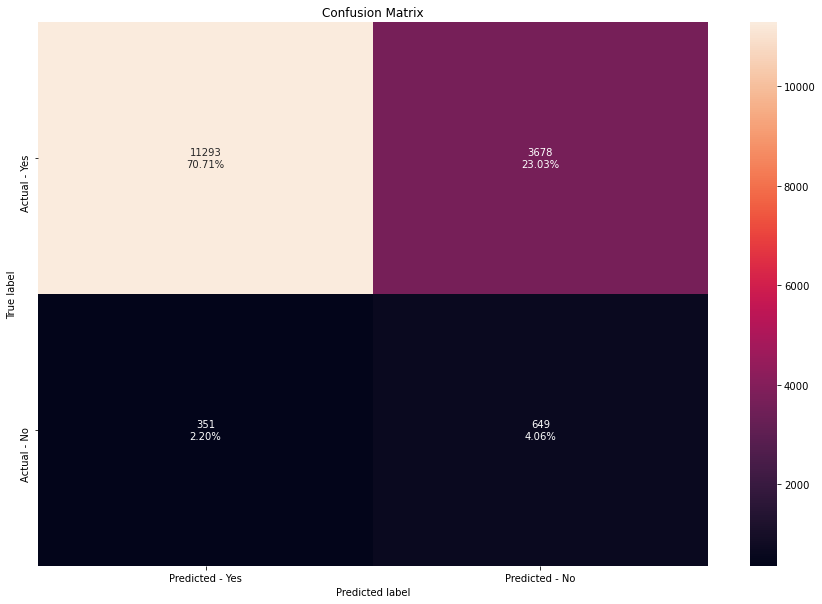

In [99]:
# Run the Confusion Matrix summary
make_confusion_matrix(pipe_adboost, X_val, y_val)

- The model scored very high for **Precision (True Positives / (True Positives + False Positives)** and relatively well for the target Metric, **Specificity (True Negatives / (True Negatives + False Positives)**
- Being that the primary objective for the business is to minimize False Positives (predicted to Renew but actually Defaulting/Non-Renewing), **a False Positive score of 2.5% is strong**
    - Although the model scored lower in Recall/Sensitivity (True Positives / (True Positives + False Negatives)), in this business scenario that simply equates to customers predicted to Not Renew but actually Renewing
        - **The overall False Negative count (22.5%) can be improved upon through Adjusted Probability Thresholds**
        - As long as this miss doesn't result in large amounts of resources wasted unnecessarily on targeting customers not truly at risk, it can be seen as a slight benefit to the business, with the key focus being targeting true at risk customers (likely only 6% of the population based on sample splits)

#### Applying Probability Threshold for Optimal Confusion Matrix Results
Adjusting the Probability Threshold, a set point for when a customer is assumed to Renew, **can substantially lower the False Negatives count whilst improving all other counts**

Accuracy: 0.9003
Precision: 1.0
Recall: 0.8797
F1 Score: 0.936
Specificity: 1.0
...................................
Roc_Auc_Score: 1.0

TP: 11644, FN: 1593, TN: 2734, FP: 0


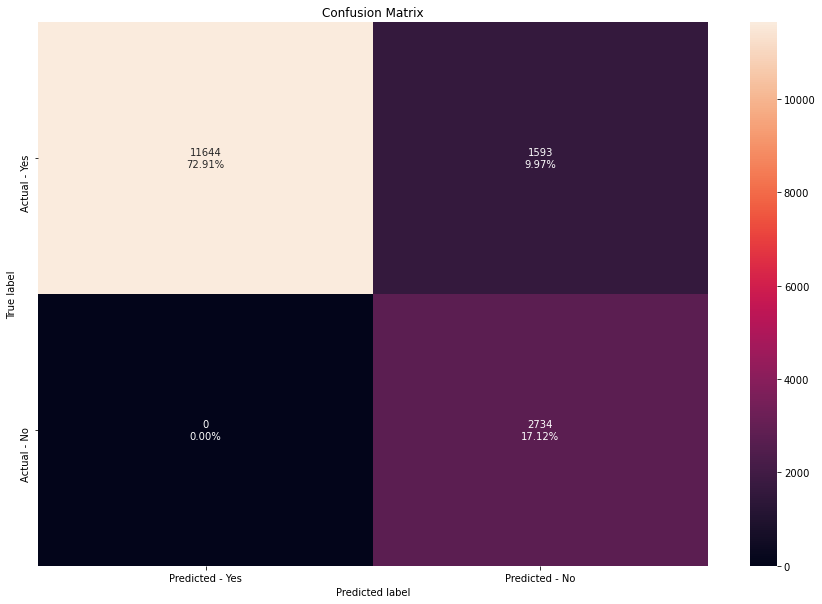

In [100]:
# Plug in best threshold from above
threshold = 0.48
y_pred = (pipe_adboost.predict_proba(X_val)[:, 1] > threshold).astype('float')
# confusion_matrix(y_test, y_pred)
make_confusion_matrix(pipe_adboost, X_val, y_pred)

- **Lowering the threshold to 0.48** (vs. default of 0.5), after which point a customer is predicted to Renew, **lowers the False Negative Count from 22.5% to 9.6% and lowers the False Positive Count to 0%**
    - This results in perfect scores for Precision and Specificity, and substantially improves Recall (88.5%)

#### Pipeline: Gradient Boost Classifier

In [101]:
# Fit the model to the upsampled Training data
pipe_gboost.fit(X_train_samp, y_train_samp)

Pipeline(steps=[('gboost_clf',
                 GradientBoostingClassifier(learning_rate=0.2, max_depth=2,
                                            max_features=0.9,
                                            min_samples_leaf=3,
                                            min_samples_split=3,
                                            n_estimators=30, random_state=1,
                                            subsample=0.9))])

Accuracy: 0.8586
Precision: 0.9537
Recall: 0.8925
F1 Score: 0.9221
Specificity: 0.351
...................................
Roc_Auc_Score: 0.7628

TP: 13362, FN: 1609, TN: 351, FP: 649


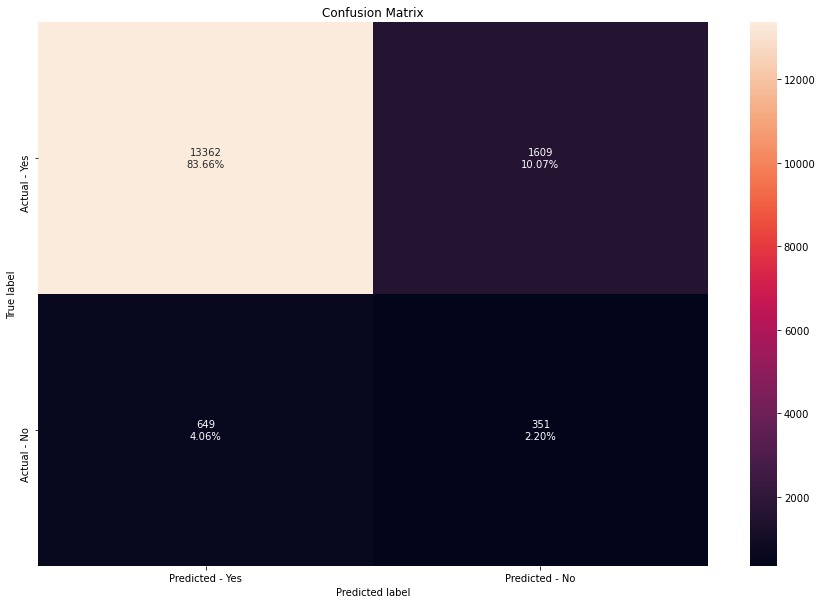

In [102]:
# Run the Confusion Matrix summary
make_confusion_matrix(pipe_gboost, X_val, y_val)

- The model scored very high for **Precision (True Positives / (True Positives + False Positives)** and relatively well for the target Metric, **Specificity (True Negatives / (True Negatives + False Positives)**
- Being that the primary objective for the business is to minimize False Positives (predicted to Renew but actually Defaulting/Non-Renewing), **a False Positive score of 4.1% is strong**
    - Although the model scored lower in Recall/Sensitivity (True Positives / (True Positives + False Negatives)), in this business scenario that simply equates to customers predicted to Not Renew but actually Renewing
        - **The overall False Negative count (10.1%) can possily be improved upon through Adjusted Probability Thresholds**
        - As long as this miss doesn't result in large amounts of resources wasted unnecessarily on targeting customers not truly at risk, it can be seen as a slight benefit to the business, with the key focus being targeting true at risk customers (likely only 6% of the population based on sample splits)

#### Applying Probability Threshold for Optimal Confusion Matrix Results
Adjusting the Probability Threshold, a set point for when a customer is assumed to Renew, **can substantially lower the False Negatives count whilst improving all other counts**

Accuracy: 0.919
Precision: 1.0
Recall: 0.9155
F1 Score: 0.9559
Specificity: 1.0
...................................
Roc_Auc_Score: 1.0

TP: 14011, FN: 1294, TN: 666, FP: 0


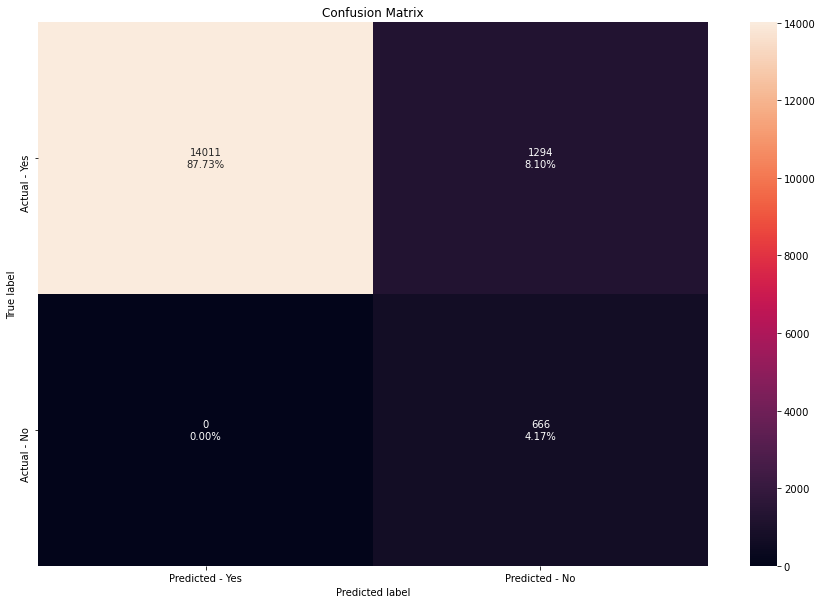

In [103]:
# Plug in best threshold from above
threshold = 0.35
y_pred = (pipe_gboost.predict_proba(X_val)[:, 1] > threshold).astype('float')
# confusion_matrix(y_test, y_pred)
make_confusion_matrix(pipe_gboost, X_val, y_pred)

- **Lowering the threshold to 0.35** (vs. default of 0.5), after which point a customer is predicted to Renew, **lowers the False Negative Count from 10.1% to 8.1% and lowers the False Positive Count to 0%**
    - This results in perfect scores for Precision and Specificity, and improves Recall (91.6%)

## Best Model

Depending on the final scenario chosen, there are 2 possible models worth considering as Final for which to apply Test data to:

### Scenario 1: Logistic Regression Pipeline
- Optimal Specificity score achieved (63%), with strong Precision and decent Recall scores
- Adjusted Probability Threshold of 40% (for Renewal) resulting in Perfect Precision/Specificity (0 False Positives) and Strong Recall (92%)

**Standard Threshold of 0.5**
- Accuracy: 0.76
- Precision: 0.97
- Recall: 0.77
- F1 Score: 0.86
- Specificity: 0.63

**Adjusted Threshold of 0.4**
- Accuracy: 0.93
- Precision: 1.0
- Recall: 0.92
- F1 Score: 0.96
- Specificity: 1.0


### Scenario 2: Gradient Boost Classifier Pipeline
- Lowest Initial Specificity score achieved (35%), but with very strong Recall and similar Precision scores
- Lower adjusted Probability Threshold of 35% (for Renewal) resulting in Perfect Precision/Specificity (0 False Positives) and Strong Recall (91.6%)

**Standard Threshold of 0.5**
- Accuracy: 0.86
- Precision: 0.95
- Recall: 0.89
- F1 Score: 0.92
- Specificity: 0.35

**Adjusted Threshold of 0.35**
- Accuracy: 0.92
- Precision: 1.0
- Recall: 0.92
- F1 Score: 0.96
- Specificity: 1.0

### Decision: Logistic Regression Pipeline

Although having an initially lower Recall score, and requiring a slightly higher Probability Threshold for achieving similar results to the Gradient Boost Classifier, the **Logistic Regression model is better suited to the overarching business goal of addressing at risk customers most likely to default/non-renew their policies**.

If costs of incorrect at-risk customer predictions (False Positives - Recall) also become a primary objective for the company, then **further Probability Threshold testing (0.4 or lower) can be adjusted to help reduce the False Positive counts**, which still accurately reducing False Negatives (incorrectly predicted Defaulters).

### Test Data - Logistic Regression Pipeline

In [104]:
# Fit the model to the upsampled Training data
pipe_lr.fit(X_train_samp, y_train_samp)

Pipeline(steps=[('stdscaler', StandardScaler()),
                ('lr_clf',
                 LogisticRegression(C=0.5, class_weight='balanced', max_iter=20,
                                    random_state=1, solver='liblinear'))])

#### Pipeline: Logistic Regression

Accuracy: 0.7574
Precision: 0.9672
Recall: 0.7672
F1 Score: 0.8557
Specificity: 0.611
...................................
Roc_Auc_Score: 0.7573

TP: 11486, FN: 3485, TN: 611, FP: 389


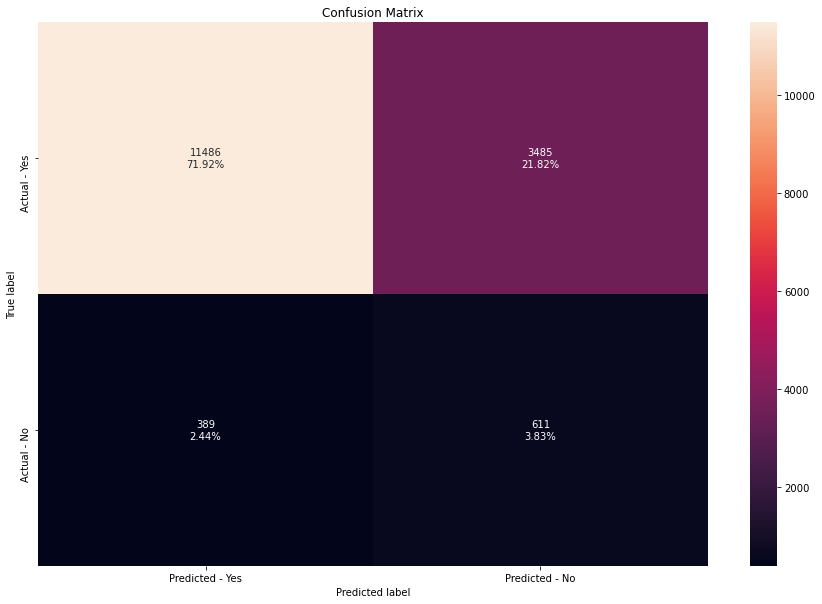

In [105]:
# Run the Confusion Matrix summary
make_confusion_matrix(pipe_lr, X_test, y_test)

- The model scored very high for **Precision (True Positives / (True Positives + False Positives)** and relatively well for the target Metric, **Specificity (True Negatives / (True Negatives + False Positives)**
- Being that the primary objective for the business is to minimize False Positives (predicted to Renew but actually Defaulting/Non-Renewing), **a False Positive score of 2.4% is strong**
    - Although the model scored lower in Recall/Sensitivity (True Positives / (True Positives + False Negatives)), in this business scenario that simply equates to customers predicted to Not Renew but actually Renewing
        - **The overall False Negative count (21.8%) can be improved upon through Adjusted Probability Thresholds**
        - As long as this miss doesn't result in large amounts of resources wasted unnecessarily on targeting customers not truly at risk, it can be seen as a slight benefit to the business, with the key focus being targeting true at risk customers (likely only 6% of the population based on sample splits)

#### Applying Probability Threshold for Optimal Confusion Matrix Results
Adjusting the Probability Threshold, a set point for when a customer is assumed to Renew, **can substantially lower the False Negatives count whilst improving all other counts**

Accuracy: 0.9338
Precision: 1.0
Recall: 0.9183
F1 Score: 0.9574
Specificity: 1.0
...................................
Roc_Auc_Score: 1.0

TP: 11875, FN: 1057, TN: 3039, FP: 0


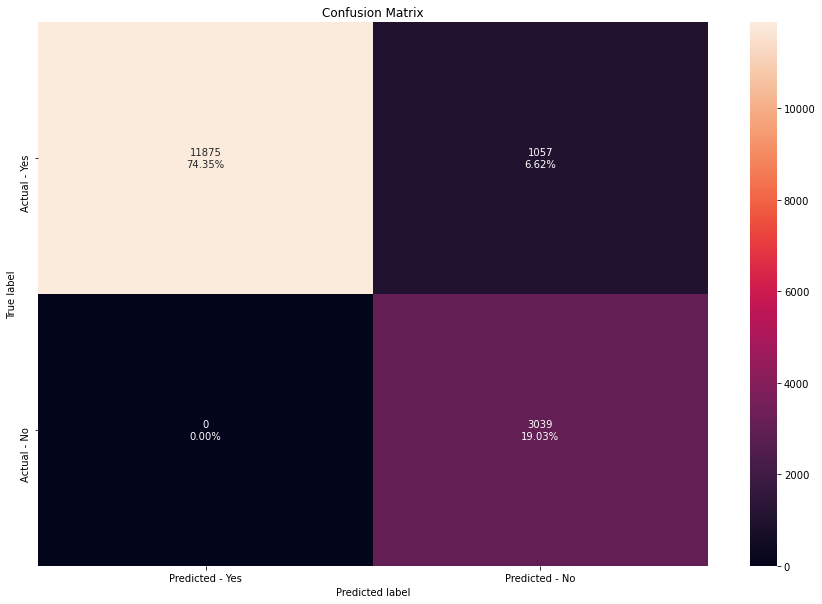

In [106]:
# Plug in best threshold from above
threshold = 0.4
y_pred = (pipe_lr.predict_proba(X_test)[:, 1] > threshold).astype('float')
# confusion_matrix(y_test, y_pred)
make_confusion_matrix(pipe_lr, X_test, y_pred)

- **Lowering the threshold to 0.4** (vs. default of 0.5), after which point a customer is predicted to Renew, **lowers the False Negative Count from 21.8% to 6.6% and lowers the False Positive Count to 0%**
    - This results in perfect scores for Precision and Specificity, and substantially improves Recall (91.8%)

### Feature Importance Summary - Pipeline: Logistic Regression

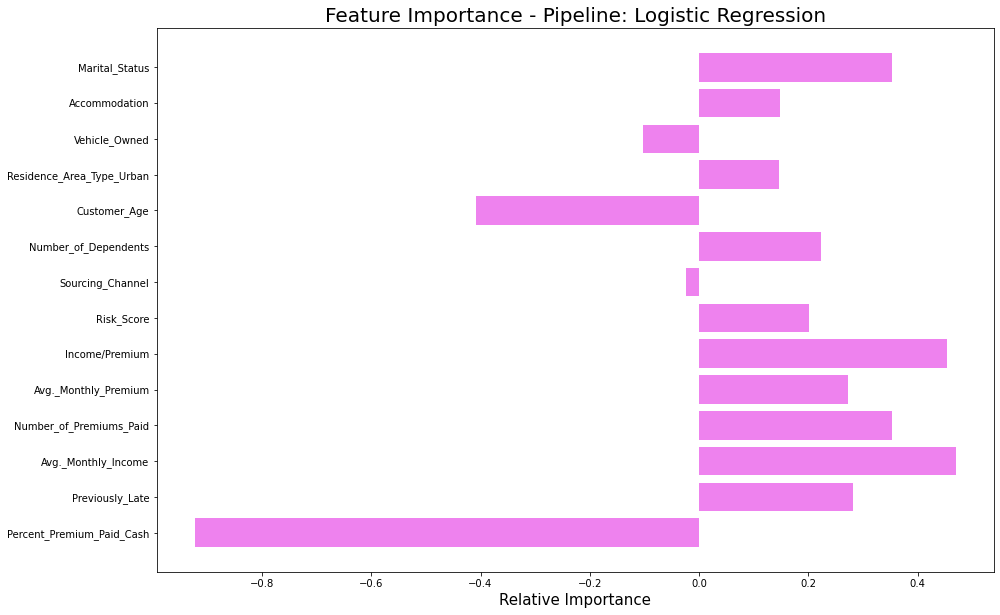


Intercept: [0.35923168]


In [107]:
importance = pipe_lr['lr_clf'].coef_[0]

indices = np.argsort(importance)    
    
features = X_train_samp.columns

plt.figure(figsize = (15,10))    
plt.barh([x for x in range(len(importance))], importance, color = 'violet', align = 'center')
plt.title('Feature Importance - Pipeline: Logistic Regression', fontdict = {'fontsize' : 20})
plt.xlabel('Relative Importance', fontdict = {'fontsize' : 15})
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.show()


print('')
print('Intercept: {}'.format(pipe_lr['lr_clf'].intercept_))

### Key Feature Summary

As it relates to a customers likelihood of Renewal (Majority Class-1), the top Features likely to decide the outcome are:
**Less likely to Renew - Increasing Likelihood of Non-Renewal**
- Percent Premium Paid Cash (-0.92)
- Customer Age (-0.41)

**More likely to Renew - Decreasing Likelihood of Non-Renewal**
- Avg. Monthly Premium (0.47)
- Income/Premium (0.45)
- Number of Premiums Paid (0.35)
- Marital Status (0.35)



### Business Insights

**Scoring for Specificity**

Although the models are performing well in regards to Precision, Recall, and Overall Accuracy, **special attention needs to be placed on better Specificity performance, particularly as it relates to identifying and lowering the counts of False Positives (predicted to renew but actually not renewing)**.  

Due to the imbalanced data issues, it is easy for a model to perform with 95% plus Precision simply due to the correctly predicting the majority class, however this is only half the battle – **the real value worth targeting their time/resources is in better False Positive targeting and customer identification**.

**Key Customers to Target (based on Feature Importance)**

In order to as efficiently and effectively target at-risk customers likely to default on their premiums, the company should pay specific attention to those customers who have paid a substantial amount of their premium with cash, possibly segmenting those customers into more targeted groupings (e.g. 50%, 75%, 90% or higher, etc.)

Particular focus should also be centered on customers of varying age groups for different targeted campaigns.
- Customers 40 years or younger will require more aggressive, incentivized marketing and communications as they show the greatest likelihood of Non-Renewal in general
    - This is largely due to the general assumption of a majority of members in this age group not needing to claim in the near future therefore questioning the need for continued premium payments
    - This age group is crucial for positive cash flows and every effort should be made to keep their accounts active
- Customers between 40 and 70 appear to the most consistent and likely to renew and maintain their policies in general
    - Periodic communications should be made in order to keep this base engaged and ensure their satisfaction 
    - This age group is more likely to have claims during their tenure, so this somewhat boosts their likelihood of continued insurance renewals to maintain protection
- Customers 70 and older are less consistent (some canceling policies and others renewing into their final years) and harder to predict and categorize
    - Further sampling and research needs to be focused around understanding the needs and lifestyles of this customer segment to better cater to and market for their needs, while ensuring adequate claims coverage and policy protections


### Filtering Customers Likely to Default (Test Data)

In [108]:
# Reset ID column back from Index - all Datasets for Pipeline update (keep equal dimensions for Standard Scaler, etc.)

X_train.reset_index('id', inplace = True)
X_val.reset_index('id', inplace = True)
X_test.reset_index('id', inplace = True)

# Rescale X_train_samp dataset on the X_train dataset (with id column) and refit the model

# 50% minority class upsampling

pipe_sampling = pipe1(steps = [
                        ('upsample_SMOTE', SMOTE(random_state = 1, sampling_strategy = 0.5, k_neighbors = 10, n_jobs = -1)), 
                        ])

X_train_samp, y_train_samp = pipe_sampling.fit_resample(X_train, y_train)

pipe_lr.fit(X_train_samp, y_train_samp)

# Create prection DataFrame for Test Data
y_test_pred = pipe_lr.predict(X_test)
y_test_pred = pd.DataFrame(y_test_pred)

In [109]:
# Create a DataFrame of predicted Test results for extraction/analysis - including customer id for unique identification
test_results_out = pd.merge(X_test.iloc[:,:1], y_test_pred, how = 'left', left_index = True, right_index = True)
test_results_out.reset_index(drop = True, inplace = True) # Reset/Drop the index column

# Rename the Target colum from numeric 0 to 'Renewal'
test_results_out.rename(columns = {0:'Renewal'}, inplace = True)

# Examine the results - top 30
test_results_out.head(30)

id  Renewal
0     793        1
1   36471        1
2   46183        1
3   69343        1
4    9771        1
5   19798        0
6     130        1
7   52180        1
8   55341        1
9   62868        0
10   5258        1
11  34284        1
12  78222        1
13  40806        1
14  44585        1
15   4930        1
16   8788        1
17  29230        1
18  13479        1
19  32519        0
20  73058        1
21  30216        1
22  48256        1
23  34306        1
24  65676        1
25  19538        1
26  16955        1
27  71739        1
28   9567        1
29  60770        1